# 1) Lựa chọn dataset và chuẩn bị

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, zscore, shapiro, kstest, anderson, chi2_contingency, fisher_exact, stats
from typing import List, Dict, Optional, Tuple, Any

## Tải dữ liệu

In [2]:
data = pd.read_csv('adult.data')  # Đọc dữ liệu từ file

In [3]:
data.info()  # Tóm tắt thông tin dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.shape

(32560, 15)

In [5]:
data

39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0         Exec-managerial         Husband   White     Male      0   0   13   
1       Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2       Handlers-cleaners         Husband   Black     Male      0   0   40   
3          Prof-specialty            Wife   Black   Female      0   0   40   
4         Exec-managerial            Wife   White   Female      0   0   40   
...                   ...             ...     ...      ...    ...  ..  ...   
32555        Tech-support            Wife   White   Female      0   0   38   
32556   Machine-op-inspct         Husband   White     Male      0   0   40   
32557        Adm-clerical       Unmarried   White   Female      0   0   40   
32558        Adm-clerical       Own-child   White     Male      0   0   20   
32559     Exec-managerial            Wife   White   Female  15024   0   40   

        United-States   <=50K  
0       United-States   <=50K  
1       United-States   <=50K  
2       United-States   <=50K  
3                Cuba   <=50K  
4       United-States   <=50K  
...               ...     ...  
32555   United-States   <=50K  
32556   United-States    >50K  
32557   United-States   <=50K  
32558   United-States   <=50K  
32559   United-States    >50K  

[32560 rows x 15 columns]

In [ ]:
data: pd.DataFrame = pd.read_csv('/content/adult.data', encoding='utf-8')

# 2) Khám phá dữ liệu (Exploratory Data Analysis - EDA)


## a) Tóm tắt thông tin dữ liệu

### Mô tả các thuộc tính

1. age
- **Mô tả**: Độ tuổi của cá nhân.

2. workclass
- **Mô tả**: Loại hình công việc của cá nhân. Các giá trị có thể bao gồm:
  - Private: Làm việc trong khu vực tư nhân.
  - Self-emp-not-inc: Doanh nhân nhưng không phải là doanh nhân tự lập.
  - Self-emp-inc: Doanh nhân tự lập.
  - Federal-gov: Làm việc cho chính phủ liên bang.
  - Local-gov: Làm việc cho chính quyền địa phương.
  - State-gov: Làm việc cho chính phủ tiểu bang.
  - Without-pay: Không có lương.
  - Never-worked: Chưa từng làm việc.

3. fnlwgt
- **Mô tả**: "Final weight" - Trọng số cuối cùng của cá nhân, phản ánh tầm quan trọng của mỗi cá nhân trong mẫu khảo sát.

4. education
- **Mô tả**: Trình độ học vấn của cá nhân. Các giá trị có thể bao gồm:
  - Bachelors: Cử nhân
  - Some-college: Một số trường đại học.
  - 11th: Học 11 năm.
  - HS-grad: Tốt nghiệp trung học phổ thông.
  - Prof-school: Trường về một lĩnh vực ngành cụ thể nào đó
  - Assoc-acdm: Học viện đại học
  - Assoc-voc: Học nghề
  - Preschool: Mầm non
  - 1st-4th: lớp 1-4
  - 5th-6th: lớp 5-6
  - 7th-8th: Lớp 7-8
  - 9th: Lớp 9.
  - 10th: lớp 10
  - 12th: Lớp 12.
  - Masters: Thạc sĩ.
  - Doctorate: Tiến sĩ

5. education-num
- **Mô tả**: Số năm học của cá nhân.

6. marital-status
- **Mô tả**: Tình trạng hôn nhân của cá nhân. Các giá trị có thể bao gồm:
  - Married-civ-spouse: Kết hôn với người bạn đời.
  - Divorced: Đã ly dị
  - Never-married: Chưa kết hôn
  - Separated: Đã ly thân
  - Widowed: Mất vợ/chồng
  - Married-spouse-absent: Kết hôn nhưng bạn đời vắng mặt
  - Married-AF-spouse: Kết hôn với một quân nhân Mỹ

7. occupation
- **Mô tả**: Nghề nghiệp của cá nhân. Các giá trị có thể bao gồm:
  - Tech-support: Hỗ trợ kỹ thuật.
  - Craft-repair: Nghề thủ công, sửa chữa.
  - Sales: Kinh doanh.
  - Exec-managerial: Quản lý điều hành.
  - Prof-specialty: Chuyên gia.
  - Other-service: Các dịch vụ khác.
  - Handlers-cleaners: Lao công.
  - Machine-op-inspct: Vận hành máy, kiểm tra.
  - Adm-clerical: Quản lý hành chính, thư ký.
  - Farming-fishing: Nông dân, ngư dân.
  - Transport-moving: Vận chuyển, di chuyển.
  - Priv-house-serv: Dịch vụ nhà riêng.
  - Protective-serv: Dịch vụ bảo vệ.
  - Armed-Forces: Lực lượng vũ trang.

8. relationship
- **Mô tả**: Mối quan hệ gia đình của cá nhân. Các giá trị có thể bao gồm:
  - Wife: Vợ.
  - Husband: Chồng.
  - Own-child: Con cái.
  - Not-in-family: Không trong gia đình.
  - Other-relative: Người thân khác.
  - Unmarried: Không kết hôn.

9. race
- **Mô tả**: Chủng tộc của cá nhân. Các giá trị có thể bao gồm:
  - White: Người da trắng.
  - Black: Người da đen.
  - Asian-Pac-Islander: Người châu Á - Thái Bình Dương.
  - Amer-Indian-Eskimo: Người Mỹ gốc Ấn Độ - Eskimo.
  - Other: Chủng tộc khác.

10. sex
- **Mô tả**: Giới tính của cá nhân. Các giá trị có thể bao gồm:
  - Female: Nữ.
  - Male: Nam.

11. capital-gain
- **Mô tả**: Lợi nhuận từ đầu tư vốn (chẳng hạn như cổ phiếu, bất động sản, v.v.).

12. capital-loss
- **Mô tả**: Lỗ từ đầu tư vốn.

13. hours-per-week
- **Mô tả**: Số giờ làm việc mỗi tuần của cá nhân.

14. native-country
- **Mô tả**: Quốc gia gốc của cá nhân. Các giá trị có thể bao gồm:
  - United-States: Hoa Kỳ.
  - Cambodia: Campuchia.
  - India: Ấn Độ.
  - Vietnam: Việt Nam.
  - Mexico: Mexico.
  - Và nhiều quốc gia khác nữa....

15. income
- **Mô tả**: Thu nhập của cá nhân. Các giá trị có thể bao gồm:
  - ">"50K: Thu nhập lớn hơn 50.000 USD/năm.
  - "<="50K: Thu nhập nhỏ hơn hoặc bằng 50.000 USD/năm.

### Kiểm tra số lượng bản ghi, số lượng biến số, kiểu dữ liệu

In [6]:
# Kiểm tra lại kích thước dữ liệu
print(data.shape)

(32560, 15)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [9]:
data.tail()

39      State-gov   77516    Bachelors   13        Never-married  \
32555  27        Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40        Private  154374      HS-grad    9   Married-civ-spouse   
32557  58        Private  151910      HS-grad    9              Widowed   
32558  22        Private  201490      HS-grad    9        Never-married   
32559  52   Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-clerical  Not-in-family   White     Male   2174   0   40  \
32555        Tech-support           Wife   White   Female      0   0   38   
32556   Machine-op-inspct        Husband   White     Male      0   0   40   
32557        Adm-clerical      Unmarried   White   Female      0   0   40   
32558        Adm-clerical      Own-child   White     Male      0   0   20   
32559     Exec-managerial           Wife   White   Female  15024   0   40   

        United-States   <=50K  
32555   United-States   <=50K  
32556   United-States    >50K  
32557   United-States   <=50K  
32558   United-States   <=50K  
32559   United-States    >50K

### Kiểm tra và xử lý dữ liệu thiếu

In [10]:
## Kiểm tra dữ liệu thiếu
data.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [11]:
#thêm tên cột
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [12]:
data

age          workclass  fnlwgt    education  education-num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [13]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [14]:
# Định nghĩa các cột theo kiểu dữ liệu
numeric_features: List[str] = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss","hours-per-week"]
categorical_features: List[str] = ["workclass", "education", "marital-status", "occupation",
                                   "relationship", "race", "sex", "native-country", "income"]

In [15]:
# Kiểm tra các giá trị duy nhất trong các cột numeric và in tên cột
print("### Cột Numeric ###")
for col in numeric_features:
    print(f"Giá trị duy nhất trong cột {col}:")
    print(data[col].unique())  # In các giá trị duy nhất trong cột
    print()  # Thêm dòng trống để dễ đọc

### Cột Numeric ###
Giá trị duy nhất trong cột age:
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Giá trị duy nhất trong cột fnlwgt:
[ 83311 215646 234721 ...  34066  84661 257302]

Giá trị duy nhất trong cột education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Giá trị duy nhất trong cột capital-gain:
[    0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386  7298
  1409  3674  1055  3464  2050  2176  2174   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346 

In [16]:
print("### Cột Categorical ###")
for col in categorical_features:
    print(f"Giá trị duy nhất trong cột {col}:")
    print(data[col].unique())  # In các giá trị duy nhất trong cột
    print()  # Thêm dòng trống để dễ đọc

### Cột Categorical ###
Giá trị duy nhất trong cột workclass:
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Giá trị duy nhất trong cột education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Giá trị duy nhất trong cột marital-status:
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

Giá trị duy nhất trong cột occupation:
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']

Giá trị duy nhất trong cột relationship:
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relati

In [20]:
# Thay thế dấu '?' bằng NaN trong các cột phân loại
for col in categorical_features:
    data[col] = data[col].replace("?",np.nan)

In [18]:
# Loại bỏ khoảng trắng thừa trước và sau các giá trị trong các cột phân loại
for col in categorical_features:
    data[col] = data[col].str.strip()  # Loại bỏ khoảng trắng

In [21]:
#Kiem tra lai
print("### Cột Categorical ###")
for col in categorical_features:
    print(f"Giá trị duy nhất trong cột {col}:")
    print(data[col].unique())  # In các giá trị duy nhất trong cột
    print()  # Thêm dòng trống để dễ đọc

### Cột Categorical ###
Giá trị duy nhất trong cột workclass:
['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Giá trị duy nhất trong cột education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Giá trị duy nhất trong cột marital-status:
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']

Giá trị duy nhất trong cột occupation:
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Giá trị duy nhất trong cột relationship:
['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Giá trị duy nhất trong cột race:
['White' 'Black'

In [22]:
# Kiểm tra số lượng giá trị thiếu (NaN)
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [26]:
# checking the percentage of missing values
missing_percentage: pd.Series = (data.isnull().sum() / len(data) * 100).round(2).sort_values(ascending=False)
print("Phần trăm dữ liệu thiếu:\n", missing_percentage)


Phần trăm dữ liệu thiếu:
 occupation        5.66
workclass         5.64
native-country    1.79
fnlwgt            0.00
education         0.00
education-num     0.00
age               0.00
marital-status    0.00
relationship      0.00
sex               0.00
race              0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
income            0.00
dtype: float64


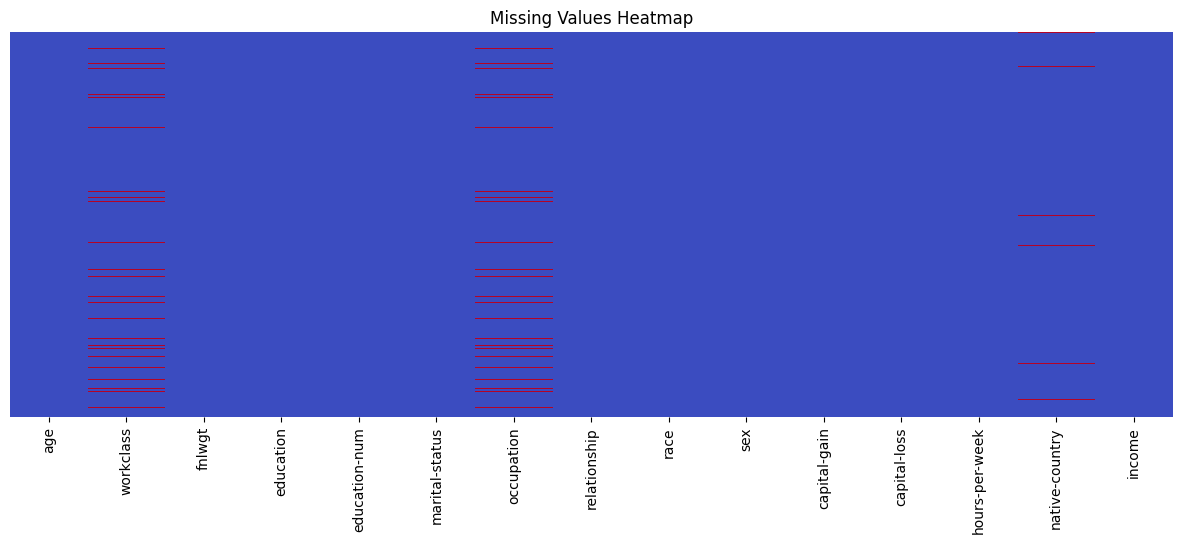

In [27]:
# heatmap of the missing values
plt.figure(figsize=(15 , 5))
sns.heatmap(data.isna(), cbar=False , yticklabels=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

#### Giải thích

Độ lệch (Skewness) là gì?

- Skewness (độ lệch) là một chỉ số thống kê dùng để đo mức độ bất đối xứng của phân phối dữ liệu so với phân phối chuẩn (phân phối đối xứng).

  - Nếu Skewness = 0: Dữ liệu phân phối chuẩn (đối xứng).

  - Nếu Skewness > 0: Dữ liệu lệch phải (đuôi dài về bên phải, ví dụ: thu nhập).

  - Nếu Skewness < 0: Dữ liệu lệch trái (đuôi dài về bên trái).

Do đó, Skewness giúp ta hiểu rõ hơn về hình dạng phân phối của dữ liệu và quyết định xem có cần biến đổi dữ liệu hay không (ví dụ: log-transform để xử lý lệch phải).

Tại sao không bỏ đi những mẫu có dữ liệu thiếu mà lại dùng mean hoặc median để điền giá trị khuyết cho biến liên tục?


- Lý do không nên xóa mẫu có dữ liệu thiếu:

  - Mất dữ liệu: Xóa những mẫu có giá trị thiếu có thể làm giảm kích thước bộ dữ liệu, đặc biệt nếu có nhiều mẫu bị thiếu ⇒ gây mất mát thông tin, giảm độ chính xác của mô hình.

  - Thiên lệch mẫu: Nếu dữ liệu thiếu không ngẫu nhiên, việc xóa có thể gây thiên lệch mẫu (sampling bias), làm sai lệch kết luận.

- Lý do dùng Mean/Median để điền (impute):

  - Biến liên tục (continuous) như chiều cao, cân nặng, điểm số thường có giá trị phân bố quanh trung bình (mean) hoặc trung vị (median).

  - Mean phù hợp khi dữ liệu phân phối chuẩn (đối xứng).

  - Median phù hợp khi dữ liệu bị lệch (skewed) vì nó không bị ảnh hưởng bởi các giá trị ngoại lai (outliers).

Đây là cách đơn giản, nhanh và hiệu quả để giữ lại toàn bộ dữ liệu mà vẫn có thể xử lý được các giá trị thiếu.

Tại sao lại dùng Mode để điền giá trị khuyết cho biến phân loại (categorical)?

- Biến phân loại (categorical) là những biến như giới tính (nam/nữ), tình trạng hôn nhân (độc thân/kết hôn), màu sắc,...

- Mode là giá trị xuất hiện nhiều nhất trong cột đó.

- Vì không thể tính trung bình hay trung vị cho dữ liệu dạng chữ (categorical), nên dùng mode là cách hợp lý để:

- Giữ lại toàn bộ dữ liệu.

- Điền bằng giá trị phổ biến nhất → hạn chế tạo ra sự sai lệch lớn.

Đây là một phương pháp đơn giản giúp tránh mất dữ liệu mà vẫn phản ánh được phân phối thực tế của biến phân loại.

#### Xử lý biến số liên tục (Numerical)

In [28]:
print("\nĐiền giá trị thiếu cho các biến số:")

# Lấy danh sách tên các cột có kiểu dữ liệu là số nguyên (Int64) hoặc số thực (float64)
num_cols: pd.Index = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Các cột số sẽ được kiểm tra NaN: {num_cols.tolist()}")

# Duyệt qua từng cột số để kiểm tra và điền giá trị thiếu
for col in num_cols: # col: str - Tên của cột đang xử lý
    # Kiểm tra xem cột hiện tại có giá trị thiếu (NaN) hay không
    num_missing: int = data[col].isnull().sum()
    if num_missing > 0:
        print(f"- Cột '{col}' có {num_missing} giá trị thiếu.")
        # Tính độ lệch (skewness) của cột (loại bỏ NaN trước khi tính)
        # Độ lệch giúp quyết định nên dùng Trung bình (Mean) hay Trung vị (Median) để điền khuyết
        skewness_val: float = data[col].dropna().skew()

        # Khai báo biến để lưu giá trị điền khuyết và phương pháp sử dụng
        fill_value: int # Giá trị điền khuyết sẽ là số nguyên sau khi làm tròn
        fill_method: str # Tên phương pháp ('Mean' hoặc 'Median')

        # Chọn phương pháp dựa trên độ lệch tuyệt đối
        if abs(skewness_val) < 0.5:
            # Nếu phân phối gần đối xứng (|skew| < 0.5), sử dụng Mean
            fill_value = int(round(data[col].mean())) # Tính mean, làm tròn thành số nguyên
            fill_method = "Mean"
        else:
            # Nếu phân phối bị lệch (|skew| >= 0.5), sử dụng Median (ít bị ảnh hưởng bởi outliers)
            fill_value = int(round(data[col].median())) # Tính median, làm tròn thành số nguyên
            fill_method = "Median"

        # Thực hiện điền giá trị thiếu vào cột hiện tại trong DataFrame 'data'
        data[col].fillna(fill_value, inplace=True) # inplace=True: thay đổi trực tiếp DataFrame

        # In ra thông báo về việc đã điền khuyết
        print(f"  -> Đã thay NaN trong '{col}' (Skew={skewness_val:.2f}) bằng {fill_method} (Giá trị làm tròn: {fill_value})")
    else: # Bỏ comment nếu muốn thông báo cho cả cột không có NaN
        print(f"- Cột '{col}': Không có giá trị thiếu.") # Corrected indentation


Điền giá trị thiếu cho các biến số:
Các cột số sẽ được kiểm tra NaN: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
- Cột 'age': Không có giá trị thiếu.
- Cột 'fnlwgt': Không có giá trị thiếu.
- Cột 'education-num': Không có giá trị thiếu.
- Cột 'capital-gain': Không có giá trị thiếu.
- Cột 'capital-loss': Không có giá trị thiếu.
- Cột 'hours-per-week': Không có giá trị thiếu.


#### Xử lý biến phân loại

In [29]:
print("\nĐiền giá trị thiếu cho các biến phân loại:")

# Lấy danh sách tên các cột có kiểu dữ liệu là 'object'
# Chuyển Index thành List để type hint là List[str]
cat_cols: List[str] = data.select_dtypes(include=['object']).columns.tolist()
print(f"Các cột phân loại sẽ được kiểm tra NaN: {cat_cols}")

# Duyệt qua từng cột phân loại để kiểm tra và điền giá trị thiếu
for col in cat_cols: # col: str - Tên của cột phân loại đang xử lý
    # Kiểm tra xem cột hiện tại có giá trị thiếu (NaN) hay không
    num_missing_cat: int = data[col].isnull().sum()
    if num_missing_cat > 0:
        print(f"- Cột '{col}' có {num_missing_cat} giá trị thiếu.")
        # Tìm giá trị xuất hiện nhiều nhất (Mode) trong cột này
        # .mode() trả về một Series, lấy phần tử đầu tiên [0] trong trường hợp chỉ có một mode
        # hoặc trường hợp có nhiều mode bằng tần suất (lấy mode đầu tiên)
        mode_value: Any = data[col].mode()[0] # Kiểu dữ liệu của mode có thể khác nhau tùy cột

        # Thực hiện điền giá trị thiếu bằng giá trị Mode đã tìm được
        data[col].fillna(mode_value, inplace=True) # inplace=True: thay đổi trực tiếp DataFrame

        # In ra thông báo về việc đã điền khuyết
        print(f"  -> Đã thay NaN trong '{col}' bằng Mode ({mode_value})")


Điền giá trị thiếu cho các biến phân loại:
Các cột phân loại sẽ được kiểm tra NaN: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
- Cột 'workclass' có 1836 giá trị thiếu.
  -> Đã thay NaN trong 'workclass' bằng Mode (Private)
- Cột 'occupation' có 1843 giá trị thiếu.
  -> Đã thay NaN trong 'occupation' bằng Mode (Prof-specialty)
- Cột 'native-country' có 583 giá trị thiếu.
  -> Đã thay NaN trong 'native-country' bằng Mode (United-States)


<ipython-input-29-664e502e82fe>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True) # inplace=True: thay đổi trực tiếp DataFrame


In [30]:
print(data.isnull().sum().sum())  # Xem còn tổng số NaN không

0


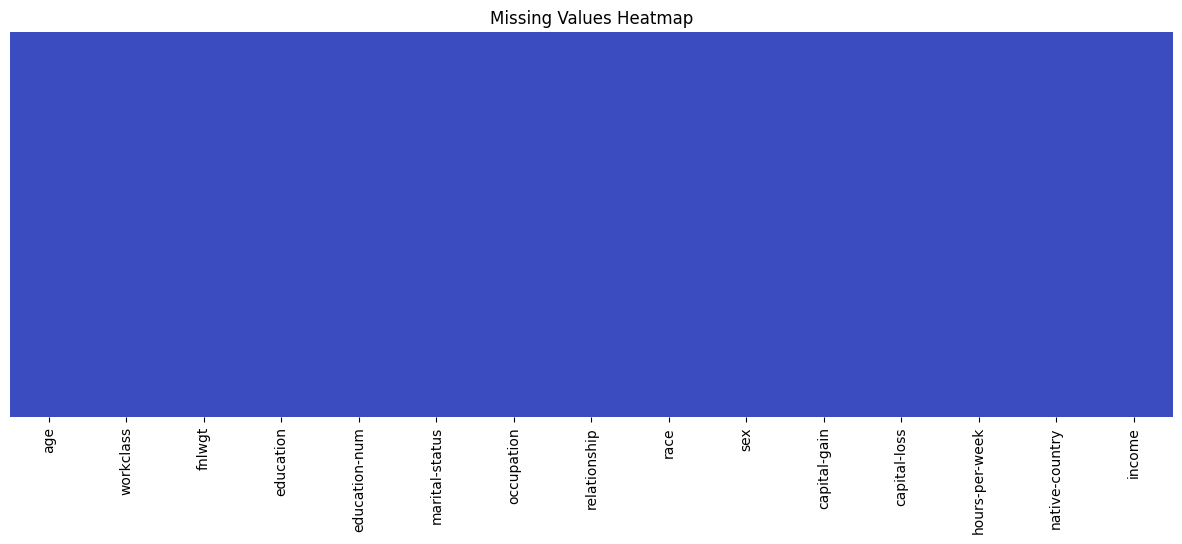

In [31]:
# heatmap of the missing values
plt.figure(figsize=(15 , 5))
sns.heatmap(data.isna(), cbar=False , yticklabels=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

In [32]:
print(f"Số lượng bản ghi: {data.shape[0]}")  # Ví dụ: 920
print(f"Số lượng features: {data.shape[1]}")  # Ví dụ: 14

# Kiểu dữ liệu của từng biến
print(data.dtypes)

Số lượng bản ghi: 32560
Số lượng features: 15
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


### Kiểm tra và loại bỏ dữ liệu trùng lặp

In [33]:
# Kiểm tra dữ liệu trùng lặp
duplicates: int = data.duplicated().sum()
print(f"Số bản ghi trùng lặp: {duplicates}")

Số bản ghi trùng lặp: 24


In [34]:
# Loại bỏ các bản ghi trùng lặp
data = data.drop_duplicates()
print(f"Số lượng bản ghi sau khi loại trùng lặp: {data.shape[0]}")

Số lượng bản ghi sau khi loại trùng lặp: 32536


## b) Phân tích thống kê mô tả

In [35]:
print(data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


**1. Công thức tính Trung bình cộng (Mean):**

$\Large \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

  - Trong đó:
    
    - $\bar{x} $: là giá trị trung bình cộng của mẫu.

    - $x_i$: là giá trị của quan sát thứ i.

    - n: là tổng số quan sát trong mẫu.


**2. Công thức tính Độ lệch chuẩn mẫu (Sample Standard Deviation):**

$\Large s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$

  - Trong đó:

    - s: là độ lệch chuẩn của mẫu (đo lường mức độ phân tán của dữ liệu quanh trung bình).

    - $x_i$: là giá trị của quan sát thứ i.

    - $\bar{x} $: là giá trị trung bình cộng của mẫu.

    - n: là tổng số quan sát trong mẫu.

**3. Cách xác định Trung vị (Median):**

- Median là giá trị nằm ở vị trí chính giữa của tập dữ liệu sau khi đã được sắp xếp theo thứ tự từ nhỏ đến lớn.

  1. Sắp xếp dữ liệu: $ x_{(1)}, x_{(2)}, ..., x_{(i)} $

  2. Nếu n (số lượng quan sát) là **số lẻ**, Median là giá trị ở vị trí thứ $\frac{n+1}{2}$

  3. Nếu n là **số chẵn**, Median là trung bình cộng của hai giá trị ở vị trí thứ $\frac{n}{2} và \frac{n}{2} + 1$


In [36]:
# Kiểm tra số lượng giá trị '0' trong các cột capital-gain và capital-loss
capital_gain_zero_count = (data['capital-gain'] == 0).sum()
capital_loss_zero_count = (data['capital-loss'] == 0).sum()

print(f"Số lượng giá trị '0' trong cột capital-gain: {capital_gain_zero_count}")
print(f"Số lượng giá trị '0' trong cột capital-loss: {capital_loss_zero_count}")

Số lượng giá trị '0' trong cột capital-gain: 29825
Số lượng giá trị '0' trong cột capital-loss: 31017


### Trực quan hóa dữ liệu (Cần ít nhất 3 loại biểu đồ)

#### Biểu đồ Boxplot (Phát hiện ngoại lai)

Boxplot: Dùng để phát hiện giá trị ngoại lai và xem phân bố tổng quát của biến số.



--- Thống kê mô tả cho cột số: age ---
count    32536.000000
mean        38.585536
std         13.638193
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 142

--- Thống kê mô tả cho cột số: fnlwgt ---
count    3.253600e+04
mean     1.897843e+05
std      1.055563e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783560e+05
75%      2.369932e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 993

--- Thống kê mô tả cho cột số: education-num ---
count    32536.000000
mean        10.081725
std          2.571622
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 1193

--- Thống kê mô tả cho cột số: capital-gain ---
count    32536.000000
mean      1078.410069
std       7388.068465


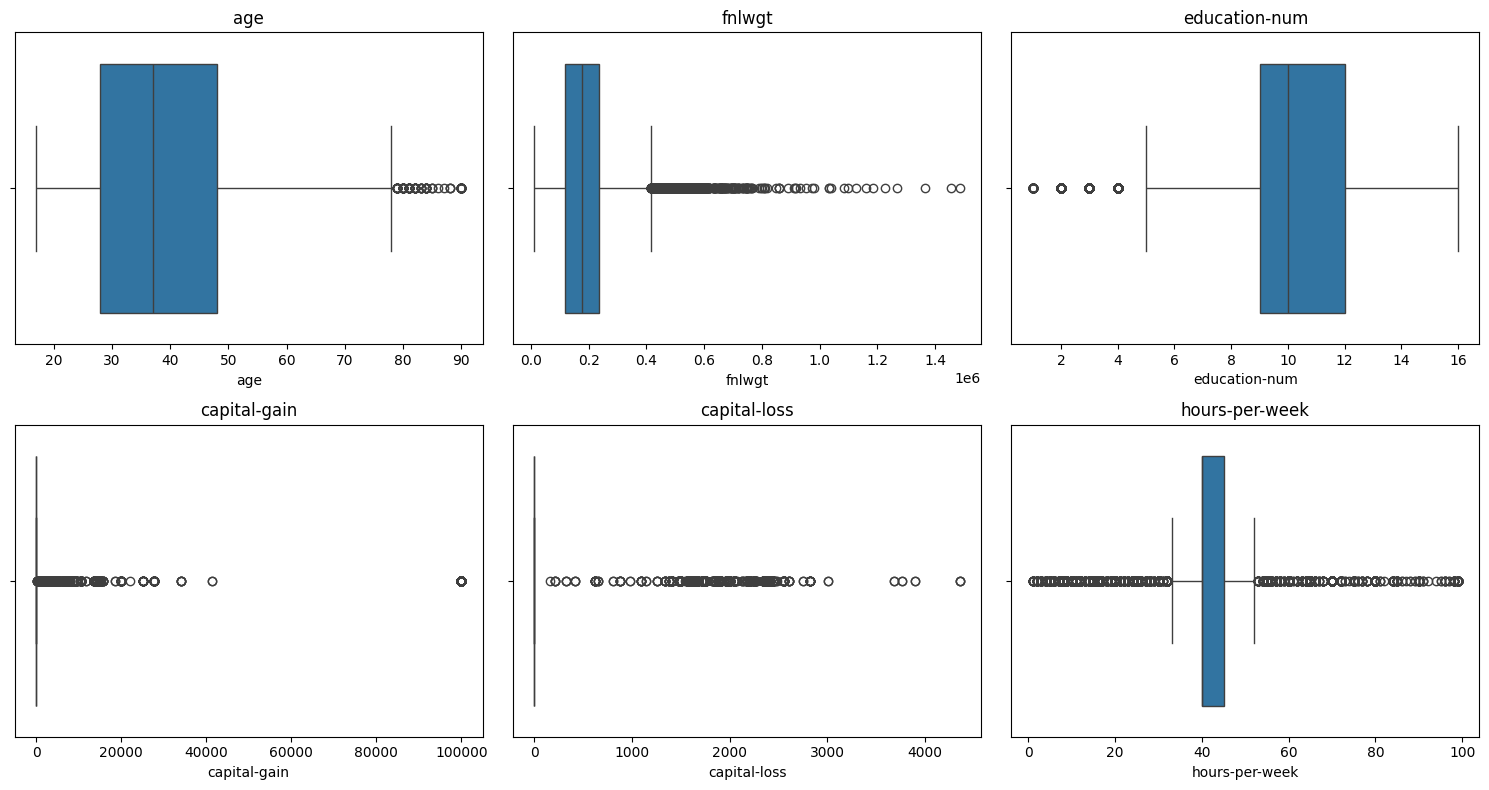

In [37]:
num_cols_plot: pd.Index = data.select_dtypes('number').columns
num_plots: int = len(num_cols_plot)

for col in num_cols_plot:
    desc = data[col].describe()
    print(f"\n--- Thống kê mô tả cho cột số: {col} ---")
    print(desc)
    print(f"Outliers (theo IQR):")
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"Số lượng outliers: {len(outliers)}")

rows = int(np.ceil(num_plots / 3))
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

1. Vì sao chọn biểu đồ Boxplot?
Boxplot (biểu đồ hộp) được chọn vì nó là công cụ trực quan mạnh mẽ để:

- Hiển thị phân bố dữ liệu: Cho thấy median (trung vị), phần giữa (IQR), và phạm vi của dữ liệu.

- Nhận diện outliers (giá trị ngoại lai): Dễ dàng thấy các điểm nằm ngoài “râu” của boxplot.

- So sánh nhiều biến liên tục cùng lúc: Giúp nhanh chóng nhìn ra biến nào phân bố lệch, biến nào có outliers nhiều, v.v.

- Đây là lý do boxplot rất phổ biến trong phân tích dữ liệu khám phá (EDA - Exploratory Data Analysis).

2. Nhận xét và nhận diện xu hướng dữ liệu từ biểu đồ

1. **Cột `age`**:
- **Thống kê mô tả**:
  - **Mean**: 38.59
  - **Min**: 17, **Max**: 90
  - **IQR**: Từ 28 đến 48
  - **Số lượng outliers**: 142
- **Nhận xét**:
  - **Phân phối**: Phần lớn độ tuổi tập trung trong khoảng từ 28 đến 48, cho thấy phần lớn người trong bộ dữ liệu là người trưởng thành với độ tuổi trung bình khoảng 39 tuổi.
  - **Outliers**: Có một số người lớn tuổi (gần 90 tuổi), có thể là những cá nhân hiếm gặp hoặc có đặc điểm rất khác biệt, tạo ra các outliers.
  - **Xu hướng**: Phân phối có xu hướng hơi lệch sang trái, với phần lớn độ tuổi tập trung vào nhóm trung niên.

2. **Cột `fnlwgt` (Final Weight)**:
- **Thống kê mô tả**:
  - **Mean**: 189,784
  - **Min**: 12,285, **Max**: 1,484,705
  - **IQR**: Từ 117,831 đến 236,993
  - **Số lượng outliers**: 993
- **Nhận xét**:
  - **Phân phối**: Cột này có giá trị `fnlwgt` rất lớn, vì vậy có thể có những cá nhân có tầm ảnh hưởng lớn trong mẫu khảo sát hoặc có sự phân bổ trọng số đặc biệt.
  - **Outliers**: Các giá trị lớn (outliers) phản ánh những cá nhân có tầm ảnh hưởng rất lớn trong mẫu khảo sát.
  - **Xu hướng**: Mặc dù dữ liệu có sự phân tán lớn, nhưng nhóm giá trị trung bình khá tập trung trong khoảng `117,831 đến 236,993`.

3. **Cột `education-num`**:
- **Thống kê mô tả**:
  - **Mean**: 10.08
  - **Min**: 1, **Max**: 16
  - **IQR**: Từ 9 đến 12
  - **Số lượng outliers**: 1,193
- **Nhận xét**:
  - **Phân phối**: Cột này đo lường số năm học của cá nhân. Hầu hết các cá nhân có từ 9 đến 12 năm học, tương ứng với mức học phổ thông hoặc đại học cơ bản.
  - **Outliers**: Các giá trị ngoài khoảng IQR có thể là các cá nhân có trình độ học vấn rất cao hoặc thấp, như những người có ít hơn 9 năm học hoặc hơn 16 năm học.
  - **Xu hướng**: Giá trị trung bình cho thấy nhiều người trong bộ dữ liệu có trình độ học vấn từ phổ thông đến đại học.

4. **Cột `capital-gain`**:
- **Thống kê mô tả**:
  - **Mean**: 1,078
  - **Min**: 0, **Max**: 99,999
  - **IQR**: Từ 0 đến 0
  - **Số lượng outliers**: 2,711
- **Nhận xét**:
  - **Phân phối**: Phần lớn các giá trị là `0`, cho thấy nhiều người không có lợi nhuận từ các khoản đầu tư.
  - **Outliers**: Các outliers chủ yếu là các cá nhân có lợi nhuận từ đầu tư rất lớn (lên đến 99,999). Những giá trị này có thể đại diện cho các cá nhân đầu tư rất thành công.
  - **Xu hướng**: Phần lớn mọi người không có lợi nhuận từ đầu tư (0), nhưng có một nhóm nhỏ có mức lợi nhuận rất lớn.

5. **Cột `capital-loss`**:
- **Thống kê mô tả**:
  - **Mean**: 87.37
  - **Min**: 0, **Max**: 4,356
  - **IQR**: Từ 0 đến 0
  - **Số lượng outliers**: 1,519
- **Nhận xét**:
  - **Phân phối**: Giống như `capital-gain`, phần lớn giá trị trong `capital-loss` là `0`, cho thấy nhiều người không gặp phải lỗ trong đầu tư.
  - **Outliers**: Các outliers có thể là những người có lỗ rất lớn trong các khoản đầu tư, nhưng số lượng này khá ít.
  - **Xu hướng**: Phần lớn người trong bộ dữ liệu không gặp phải lỗ từ đầu tư, nhưng một số ít người có thể đã trải qua những khoản lỗ lớn.

6. **Cột `hours-per-week`**:
- **Thống kê mô tả**:
  - **Mean**: 40.44
  - **Min**: 1, **Max**: 99
  - **IQR**: Từ 40 đến 45
  - **Số lượng outliers**: 9,002
- **Nhận xét**:
  - **Phân phối**: Hầu hết người tham gia làm việc từ 40 đến 45 giờ mỗi tuần, cho thấy đây là mức làm việc bình thường.
  - **Outliers**: Các outliers có thể là những cá nhân làm việc rất ít (chỉ 1 giờ mỗi tuần) hoặc rất nhiều (lên đến 99 giờ mỗi tuần).
  - **Xu hướng**: Phần lớn mọi người làm việc từ 40 đến 45 giờ mỗi tuần, nhưng có một nhóm nhỏ làm việc ít hoặc nhiều hơn đáng kể.

Tổng kết:
- Các cột `capital-gain`, `capital-loss`, và `hours-per-week` có phân phối không đều với nhiều **outliers**, phản ánh một nhóm nhỏ người có giá trị cực đoan (lợi nhuận đầu tư cao hoặc lỗ lớn, số giờ làm việc cực thấp hoặc cao).
- Các cột còn lại như `age`, `fnlwgt`, và `education-num` có phân phối tập trung với ít **outliers**.

Biểu đồ **box plot** giúp chúng ta nhận diện được các **outliers** trong các cột số và hiểu rõ hơn về phân phối của dữ liệu.

#### Biểu đồ Pairplot (Phân tích quan hệ giữa các biến số)

Pairplot: Kết hợp scatterplot để xem mối quan hệ giữa các biến và histogram để xem phân bố từng biến.


--- Ma trận tương quan giữa các cột số ---
                 age  fnlwgt  education-num  capital-gain  capital-loss  \
age             1.00   -0.08           0.04          0.08          0.06   
fnlwgt         -0.08    1.00          -0.04          0.00         -0.01   
education-num   0.04   -0.04           1.00          0.12          0.08   
capital-gain    0.08    0.00           0.12          1.00         -0.03   
capital-loss    0.06   -0.01           0.08         -0.03          1.00   
hours-per-week  0.07   -0.02           0.15          0.08          0.05   

                hours-per-week  
age                       0.07  
fnlwgt                   -0.02  
education-num             0.15  
capital-gain              0.08  
capital-loss              0.05  
hours-per-week            1.00  


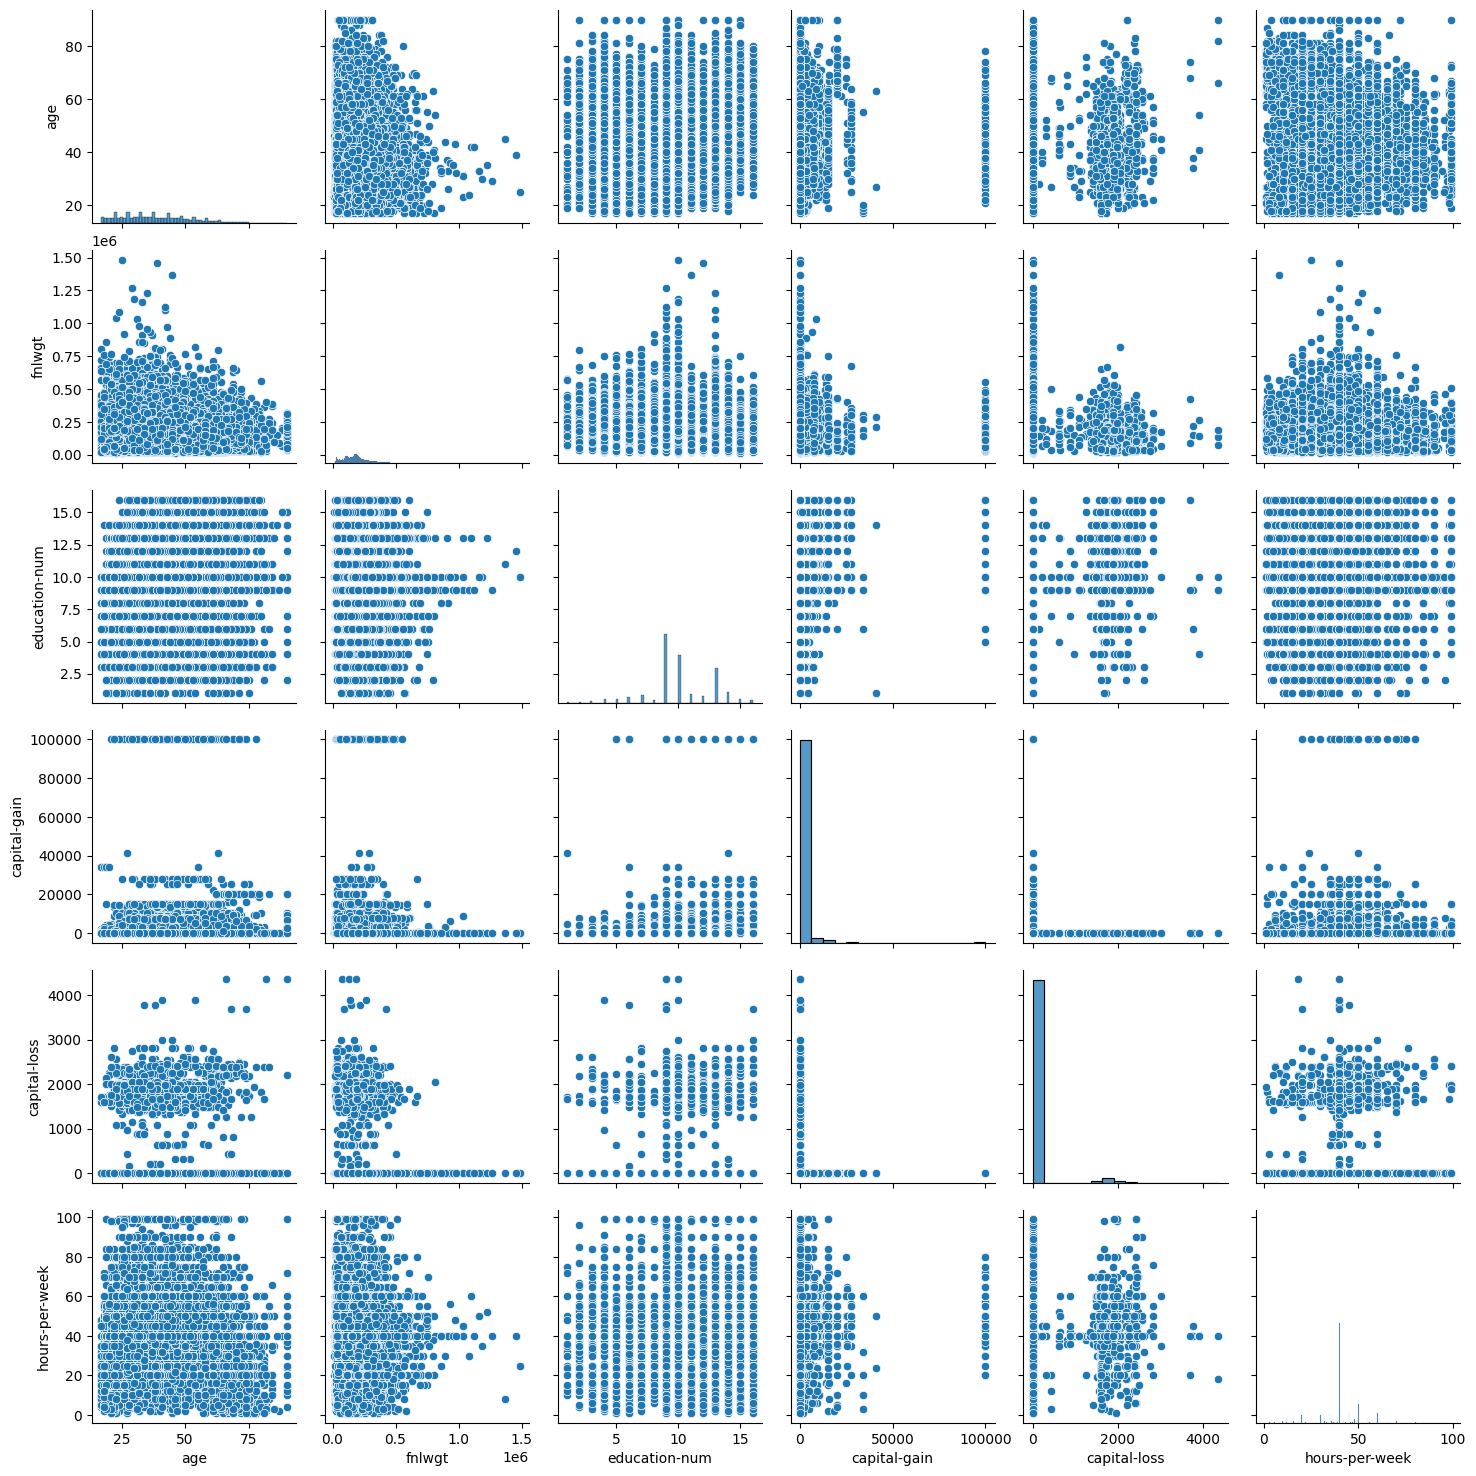

In [38]:
num_cols = data.select_dtypes('number').columns

print("\n--- Ma trận tương quan giữa các cột số ---")
corr = data[num_cols].corr()
print(corr.round(2))

sns.pairplot(data)
plt.show()


--- Giá trị trung bình của các cột số theo nhóm trong 'income' ---
          age     fnlwgt  education-num  capital-gain  capital-loss  \
income                                                                
<=50K   36.79  190350.50           9.60        148.80         53.19   
>50K    44.25  188000.48          11.61       4007.16        195.05   

        hours-per-week  
income                  
<=50K            38.84  
>50K             45.47  


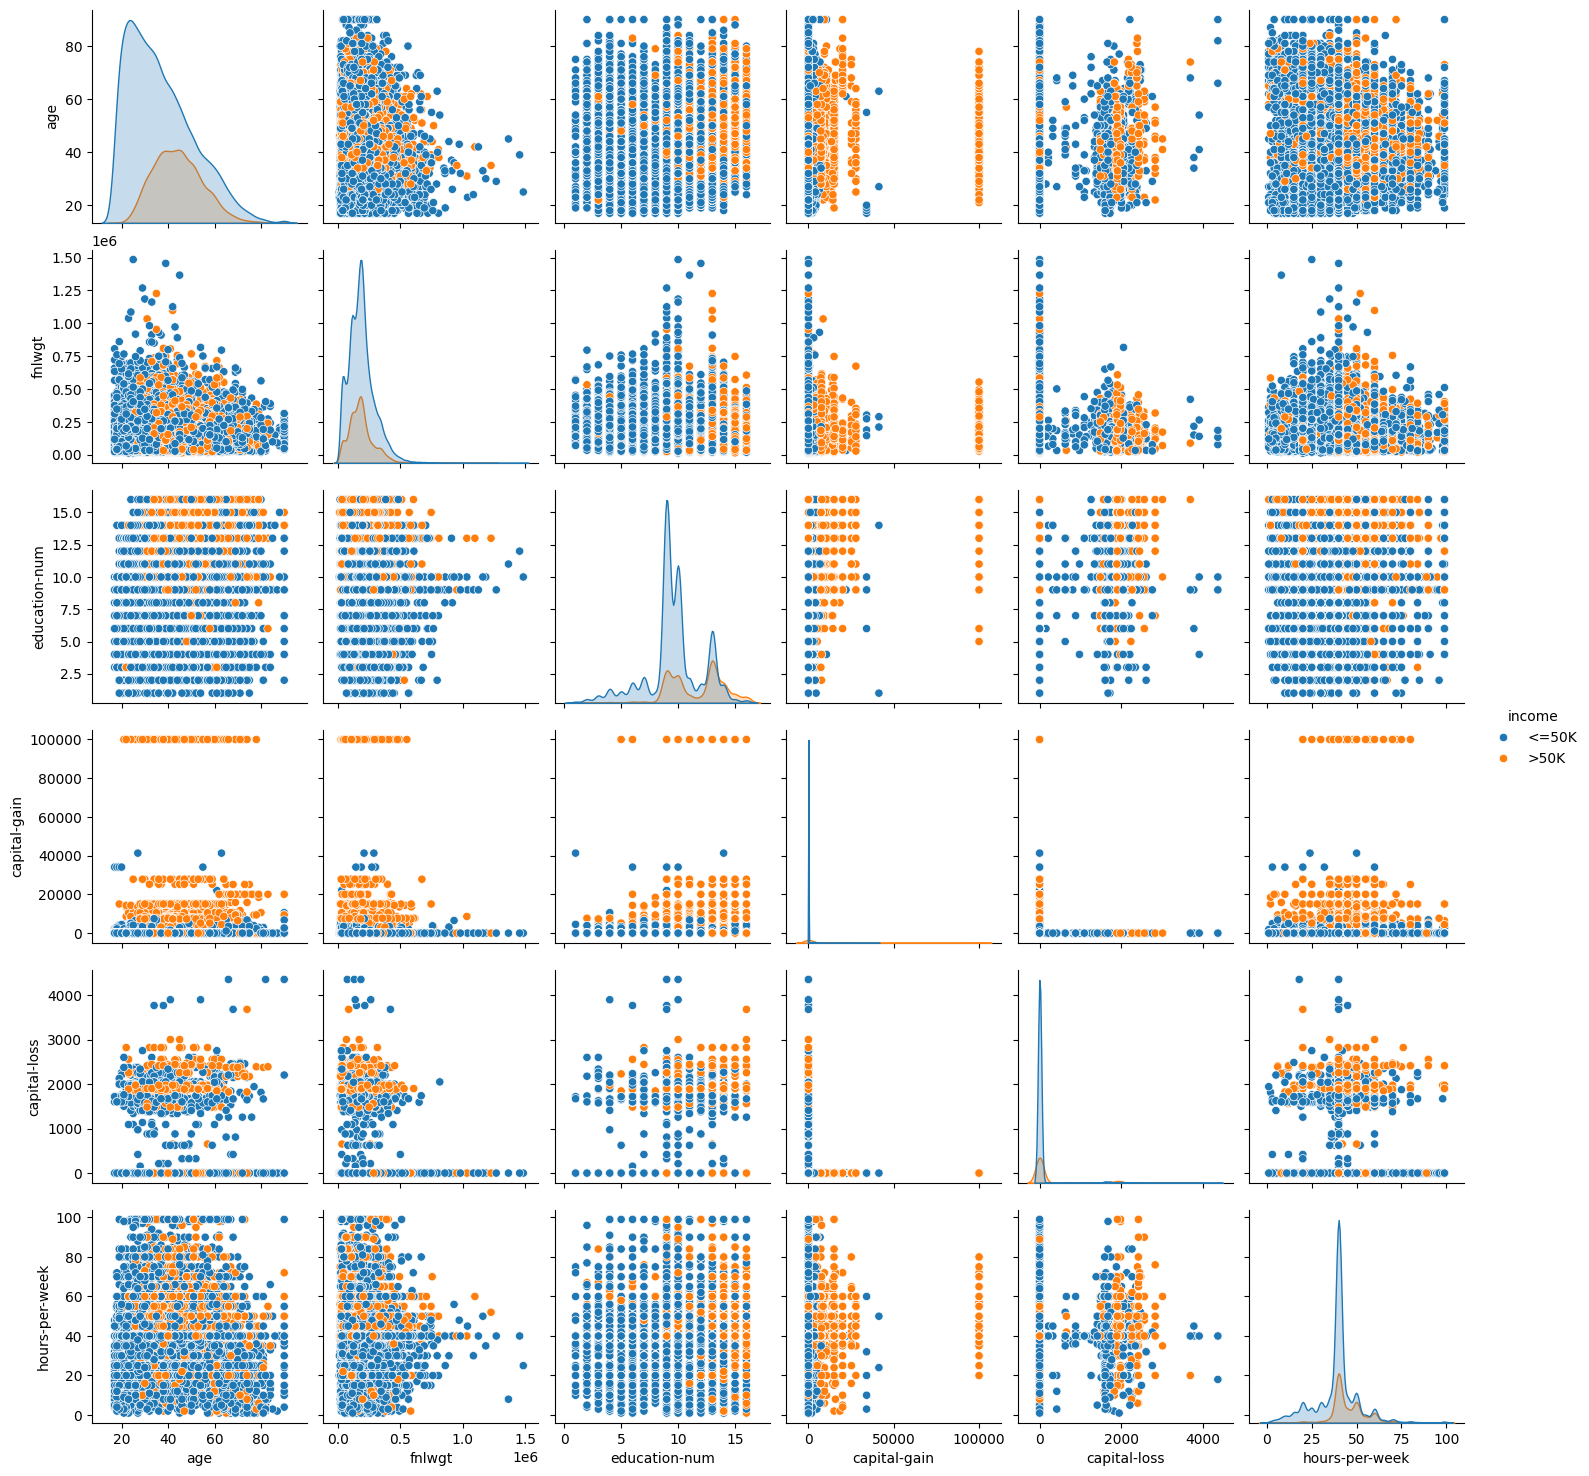

In [39]:
num_cols = data.select_dtypes('number').columns
if 'income' in data.columns:
    print("\n--- Giá trị trung bình của các cột số theo nhóm trong 'income' ---")
    print(data.groupby('income')[num_cols].mean().round(2))
else:
    print("Cột 'income' không tồn tại trong dữ liệu.")

sns.pairplot(data, hue='income')
plt.show()

Nhận xét Pairplot:

1. **Biến mục tiêu (`income`)**:
- Biểu đồ **pairplot** sử dụng hai nhóm `income` (<=50K và >50K) để tô màu các điểm dữ liệu. Mặc dù có sự phân tách giữa các nhóm, nhưng biểu đồ này vẫn có sự chồng chéo rõ ràng giữa hai nhóm, đặc biệt là ở các biến như `capital-gain`, `capital-loss` và `hours-per-week`. Điều này cho thấy các nhóm này có sự phân bố tương đối giống nhau ở nhiều đặc tính.
- Các nhóm có sự phân biệt rõ rệt ở một số biến (ví dụ: `capital-gain`, `capital-loss`), nhưng nhiều biến khác như `age`, `fnlwgt` và `education-num` có sự chồng chéo mạnh mẽ, khiến việc phân biệt các nhóm trở nên khó khăn.

2. **Xử lý Outliers và Phạm vi Dữ liệu**:
- **Outliers**: Các giá trị ngoại lai trong biểu đồ phân bố rõ ràng, đặc biệt ở các cột `capital-gain`, `capital-loss`, và `hours-per-week`. Những outliers này có thể ảnh hưởng mạnh đến phân phối và các mối quan hệ trong dữ liệu.
  - Cột **`capital-gain`** và **`capital-loss`** có rất nhiều giá trị ngoại lai với những giá trị cực lớn. Điều này tạo ra một sự phân tán rất rộng trong dữ liệu, khiến cho phần lớn dữ liệu trở nên rất khó phân biệt.
  - Cột **`hours-per-week`** có sự phân phối rất hẹp cho nhóm thu nhập <=50K (tập trung quanh 40 giờ), trong khi nhóm thu nhập >50K có sự phân tán rộng hơn, với một số cá nhân làm việc rất ít hoặc rất nhiều giờ.

- **Phạm vi trục**: Trục của `capital-gain`, `capital-loss` và `hours-per-week` có phạm vi rất lớn và bị kéo dài bởi các outliers, điều này làm mất đi sự tập trung vào phần lớn dữ liệu chính.

3. **Hình dạng phân phối**:
- **Cột `capital-gain` và `capital-loss`**: Các phân phối này rất lệch và có đuôi dài, chủ yếu tập trung vào giá trị `0`, nhưng có một số ít cá nhân có lợi nhuận hoặc lỗ rất lớn từ các khoản đầu tư.
- **Cột `hours-per-week`**: Phân phối của `hours-per-week` có sự phân tán rõ rệt giữa hai nhóm. Người thu nhập thấp (<=50K) có xu hướng làm việc khoảng 40 giờ mỗi tuần, trong khi nhóm thu nhập cao (>50K) có một phạm vi rộng hơn, cho thấy sự phân bố số giờ làm việc không đồng đều trong nhóm này.

4. **Kết luận từ Pairplot**:
- **Phức tạp do sự chồng chéo giữa các nhóm `income`**: Mặc dù có sự phân biệt ở một số biến (ví dụ: `capital-gain`, `capital-loss`, `hours-per-week`), nhưng biểu đồ vẫn khá phức tạp do sự chồng chéo giữa các nhóm. Điều này làm việc phân biệt các mẫu hình giữa các nhóm thu nhập trở nên khó khăn và không rõ ràng.
- **Ảnh hưởng của outliers**: Sự hiện diện của các giá trị ngoại lai làm giãn trục và phân tán các điểm dữ liệu, làm mờ đi các mối quan hệ tiềm ẩn giữa các biến. Điều này có thể làm dữ liệu trở nên khó phân tích và gây nhiễu trong quá trình phân tích trực quan.
- **Khó nhận diện sự khác biệt giữa các nhóm**: Mặc dù có thể nhận thấy một số xu hướng (ví dụ: `capital-gain` có xu hướng cao hơn ở nhóm thu nhập >50K, `capital-loss` và `hours-per-week` cũng có sự phân tán mạnh mẽ), nhưng sự khác biệt này không rõ ràng và không dễ nhận thấy vì sự chồng chéo lớn giữa các nhóm màu.

5. **Tính hữu dụng của Pairplot**:
- **Hạn chế của Pairplot**: Biểu đồ này cho thấy sự tồn tại của các giá trị ngoại lai và sự phân bố của các biến, nhưng không thể hiện rõ sự khác biệt giữa các nhóm `income`. Điều này làm cho biểu đồ này ít hữu ích trong việc đưa ra các kết luận chắc chắn về mối quan hệ giữa các biến hoặc sự khác biệt giữa các nhóm thu nhập.
- **Cần thiết của tiền xử lý dữ liệu**: Biểu đồ này nhấn mạnh tầm quan trọng của việc xử lý outliers và chuẩn hóa dữ liệu trước khi thực hiện các phân tích sâu hơn. Việc làm sạch và chuẩn hóa dữ liệu sẽ giúp tăng độ chính xác và tính hữu ích của các phân tích trực quan.

6. Kết luận chung:
Pairplot này cho thấy sự phân tán và sự phân biệt giữa các nhóm `income` vẫn còn phức tạp do có quá nhiều sự chồng chéo và sự hiện diện của các outliers. Cần phải xử lý dữ liệu và có sự chuẩn bị kỹ lưỡng trước khi thực hiện các phân tích tiếp theo để có được cái nhìn rõ ràng và chính xác hơn về mối quan hệ giữa các biến.

#### Histogram cho biến Numerical


--- Phân phối giá trị cho cột age ---
age
(16.927, 24.3]    5562
(24.3, 31.6]      5884
(31.6, 38.9]      6046
(38.9, 46.2]      6157
(46.2, 53.5]      3965
(53.5, 60.8]      2591
(60.8, 68.1]      1595
(68.1, 75.4]       496
(75.4, 82.7]       174
(82.7, 90.0]        66
Name: count, dtype: int64

--- Phân phối giá trị cho cột fnlwgt ---
fnlwgt
(10812.58, 159527.0]      13106
(159527.0, 306769.0]      15316
(306769.0, 454011.0]       3495
(454011.0, 601253.0]        477
(601253.0, 748495.0]        102
(748495.0, 895737.0]         20
(895737.0, 1042979.0]        10
(1042979.0, 1190221.0]        5
(1190221.0, 1337463.0]        2
(1337463.0, 1484705.0]        3
Name: count, dtype: int64

--- Phân phối giá trị cho cột education-num ---
education-num
(0.985, 2.5]      216
(2.5, 4.0]        977
(4.0, 5.5]        514
(5.5, 7.0]       2108
(7.0, 8.5]        433
(8.5, 10.0]     17776
(10.0, 11.5]     1382
(11.5, 13.0]     6419
(13.0, 14.5]     1722
(14.5, 16.0]      989
Name: count, dtype: int

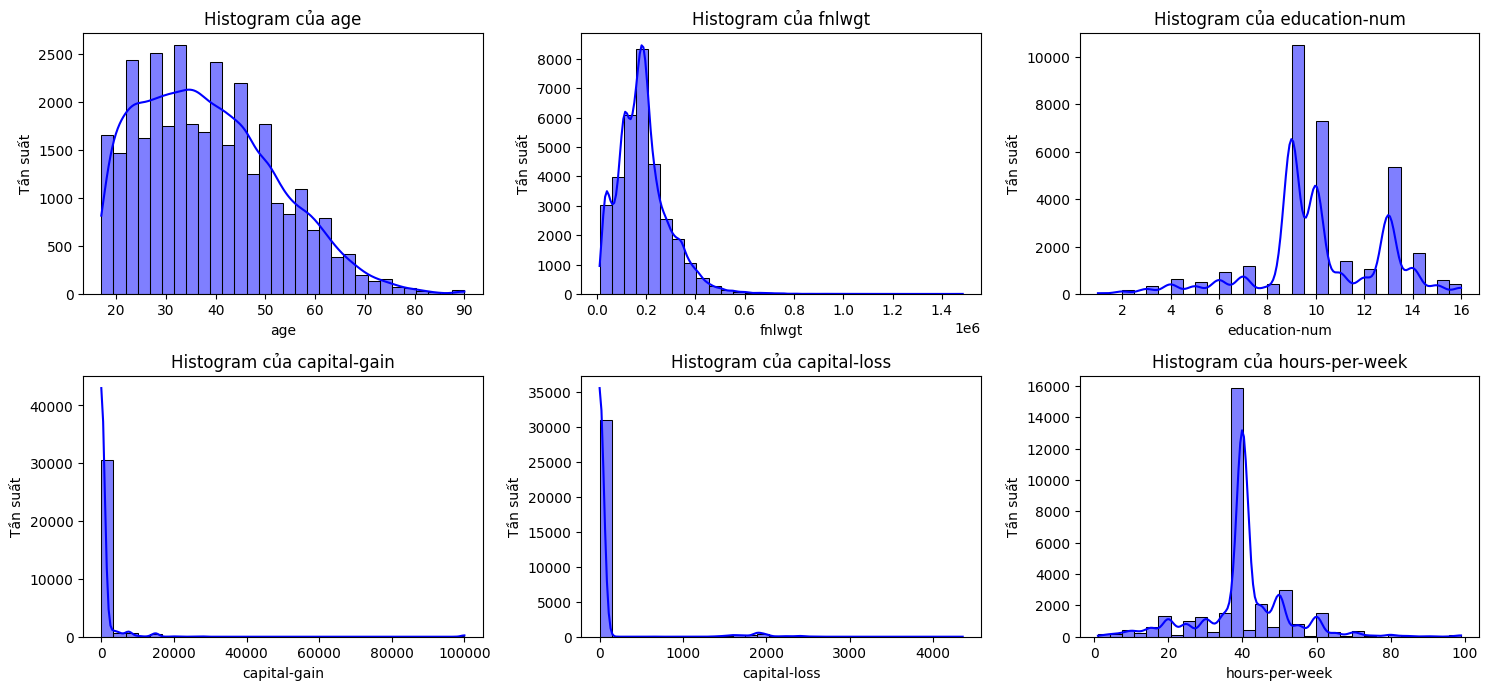

In [40]:
# Chọn các cột số
num_cols: pd.Index = data.select_dtypes(include=['number']).columns

for col in num_cols:
    print(f"\n--- Phân phối giá trị cho cột {col} ---")
    value_counts = pd.cut(data[col], bins=10).value_counts().sort_index()
    print(value_counts)

# Thiết lập kích thước
plt.figure(figsize=(15, 10))

# Duyệt qua từng cột số để vẽ histogram
for i, col in enumerate(num_cols, 1): # i: int, col: str
    plt.subplot(len(num_cols) // 3 + 1, 3, i)  # Sắp xếp 3 cột trên mỗi hàng
    sns.histplot(data[col], bins=30, kde=True, color='blue')  # Vẽ histogram có KDE
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()

1. Tại sao dùng biểu đồ Histogram?
Histogram (biểu đồ tần suất) được dùng để:

  - Thể hiện phân bố xác suất (distribution) của biến số liên tục.

  - Dễ dàng nhận biết hình dạng phân phối: chuẩn, lệch trái, lệch phải, phân bố nhiều đỉnh...

  - Kết hợp đường KDE (đường xanh) giúp trực quan hóa xu hướng tổng thể của dữ liệu.

  - Rất hữu ích để đánh giá xem có cần biến đổi dữ liệu (log, sqrt,...) hay không.

2. Nhận xét và nhận diện xu hướng dữ liệu từ biểu đồ Histogram

1. **Cột `age`**:
- **Biểu đồ**: Phân phối của cột `age` cho thấy một dạng phân phối lệch phải (right-skewed), với tần suất cao nhất nằm trong khoảng từ 25 đến 40 tuổi. Phần lớn đối tượng trong bộ dữ liệu có độ tuổi từ 20 đến 50, với số lượng giảm dần khi độ tuổi tăng lên.
- **Dữ liệu phân phối**:
  - **Nhóm tuổi**: Phần lớn người tham gia có độ tuổi từ 16 đến 46 (tạo thành 5 nhóm tuổi lớn nhất). Sau đó, tần suất giảm mạnh ở các nhóm tuổi cao hơn.
  - **Nhận xét**: Đây có thể là những người trưởng thành trong độ tuổi lao động, cho thấy nhóm này chiếm đa số trong bộ dữ liệu.

2. **Cột `fnlwgt` (Final Weight)**:
- **Biểu đồ**: Biểu đồ của `fnlwgt` có dạng phân phối lệch phải, với tần suất cao nhất ở các giá trị gần 0 và giảm dần khi giá trị tăng lên. Dữ liệu có rất nhiều cá nhân có trọng số thấp (khoảng từ 0 đến 0.2 triệu).
- **Dữ liệu phân phối**:
  - **Trọng số**: Phần lớn giá trị của `fnlwgt` nằm trong khoảng từ 0 đến 0.2 triệu.
  - **Nhận xét**: Các cá nhân có trọng số thấp có thể đại diện cho một tỷ lệ lớn trong mẫu khảo sát. Những cá nhân có trọng số cao có thể đại diện cho các nhóm nhỏ hoặc nhóm đặc biệt.

3. **Cột `education-num`**:
- **Biểu đồ**: Phân phối của `education-num` có hình dạng rất đặc biệt, với sự tập trung mạnh mẽ ở các mức `9` và `10`, đại diện cho những người có trình độ học vấn phổ thông hoặc đại học cơ bản.
- **Dữ liệu phân phối**:
  - **Trình độ học vấn**: Hầu hết các giá trị rơi vào nhóm `9` (tốt nghiệp trung học phổ thông) và `10` (cử nhân hoặc tương đương).
  - **Nhận xét**: Dữ liệu cho thấy trình độ học vấn phổ biến nhất trong bộ dữ liệu là tốt nghiệp trung học hoặc đại học cơ bản.

4. **Cột `capital-gain`**:
- **Biểu đồ**: Phân phối của `capital-gain` rất lệch với hầu hết các giá trị rơi vào khoảng `0`, trong khi có một số ít cá nhân có lợi nhuận từ đầu tư rất lớn (lên đến 100,000).
- **Dữ liệu phân phối**:
  - **Lợi nhuận từ đầu tư**: Phần lớn giá trị trong `capital-gain` là `0`, với số ít cá nhân có lợi nhuận đầu tư rất lớn.
  - **Nhận xét**: Điều này cho thấy có một nhóm nhỏ cá nhân đầu tư thành công, trong khi phần lớn không có lợi nhuận từ đầu tư.

5. **Cột `capital-loss`**:
- **Biểu đồ**: Tương tự như `capital-gain`, `capital-loss` chủ yếu có giá trị bằng `0`, nhưng lại có một số ít cá nhân có lỗ từ đầu tư lớn.
- **Dữ liệu phân phối**:
  - **Lỗ từ đầu tư**: Phần lớn giá trị trong `capital-loss` là `0`, và các giá trị lỗ lớn xuất hiện rất ít.
  - **Nhận xét**: Điều này có thể phản ánh rằng phần lớn người tham gia không gặp phải lỗ trong các khoản đầu tư của họ.

6. **Cột `hours-per-week`**:
- **Biểu đồ**: Phân phối của `hours-per-week` cho thấy một hình thức phân phối lệch phải với tần suất tập trung vào 40 giờ làm việc mỗi tuần. Tuy nhiên, có một số ít người làm việc rất ít hoặc rất nhiều giờ.
- **Dữ liệu phân phối**:
  - **Giờ làm việc**: Phần lớn người tham gia làm việc khoảng 40 giờ mỗi tuần, với một số ít người làm việc ít hơn 10 giờ hoặc nhiều hơn 80 giờ mỗi tuần.
  - **Nhận xét**: Điều này có thể phản ánh sự phân bổ số giờ làm việc không đồng đều, với nhóm thu nhập cao làm việc nhiều hơn.

**Nhận xét chung**:
- **Phân phối lệch phải**: Các cột như `capital-gain`, `capital-loss`, và `hours-per-week` có phân phối lệch phải, nghĩa là hầu hết các giá trị đều tập trung vào mức thấp nhất (0), với một số ít giá trị lớn tạo thành outliers.
- **Outliers**: Các giá trị ngoại lai rõ rệt trong các cột `capital-gain`, `capital-loss` và `hours-per-week` làm giãn các trục và có thể che khuất các mẫu hình thực sự trong phần lớn dữ liệu.
- **Phần lớn dữ liệu**: Dữ liệu chủ yếu tập trung ở một số nhóm đặc biệt, chẳng hạn như độ tuổi từ 20 đến 40, `capital-gain` và `capital-loss` đều có giá trị 0, và số giờ làm việc chủ yếu là 40 giờ.

**Kết luận**:
Biểu đồ Histogram này giúp chúng ta nhận diện rõ các phân phối và sự hiện diện của outliers trong dữ liệu. Việc làm sạch và chuẩn hóa dữ liệu (đặc biệt là xử lý các outliers) sẽ giúp cải thiện chất lượng phân tích và đưa ra những kết luận chính xác hơn.

#### Biểu đồ Cột cho biến phân loại

In [41]:
cat_cols_count: pd.Index = data.select_dtypes(include=['object']).columns

for col in cat_cols_count:
    print(f"\n--- Tần suất các giá trị trong cột '{col}' ---")
    print(data[col].value_counts())


--- Tần suất các giá trị trong cột 'workclass' ---
workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'education' ---
education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'marital-status' ---
marital-status
Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Marrie

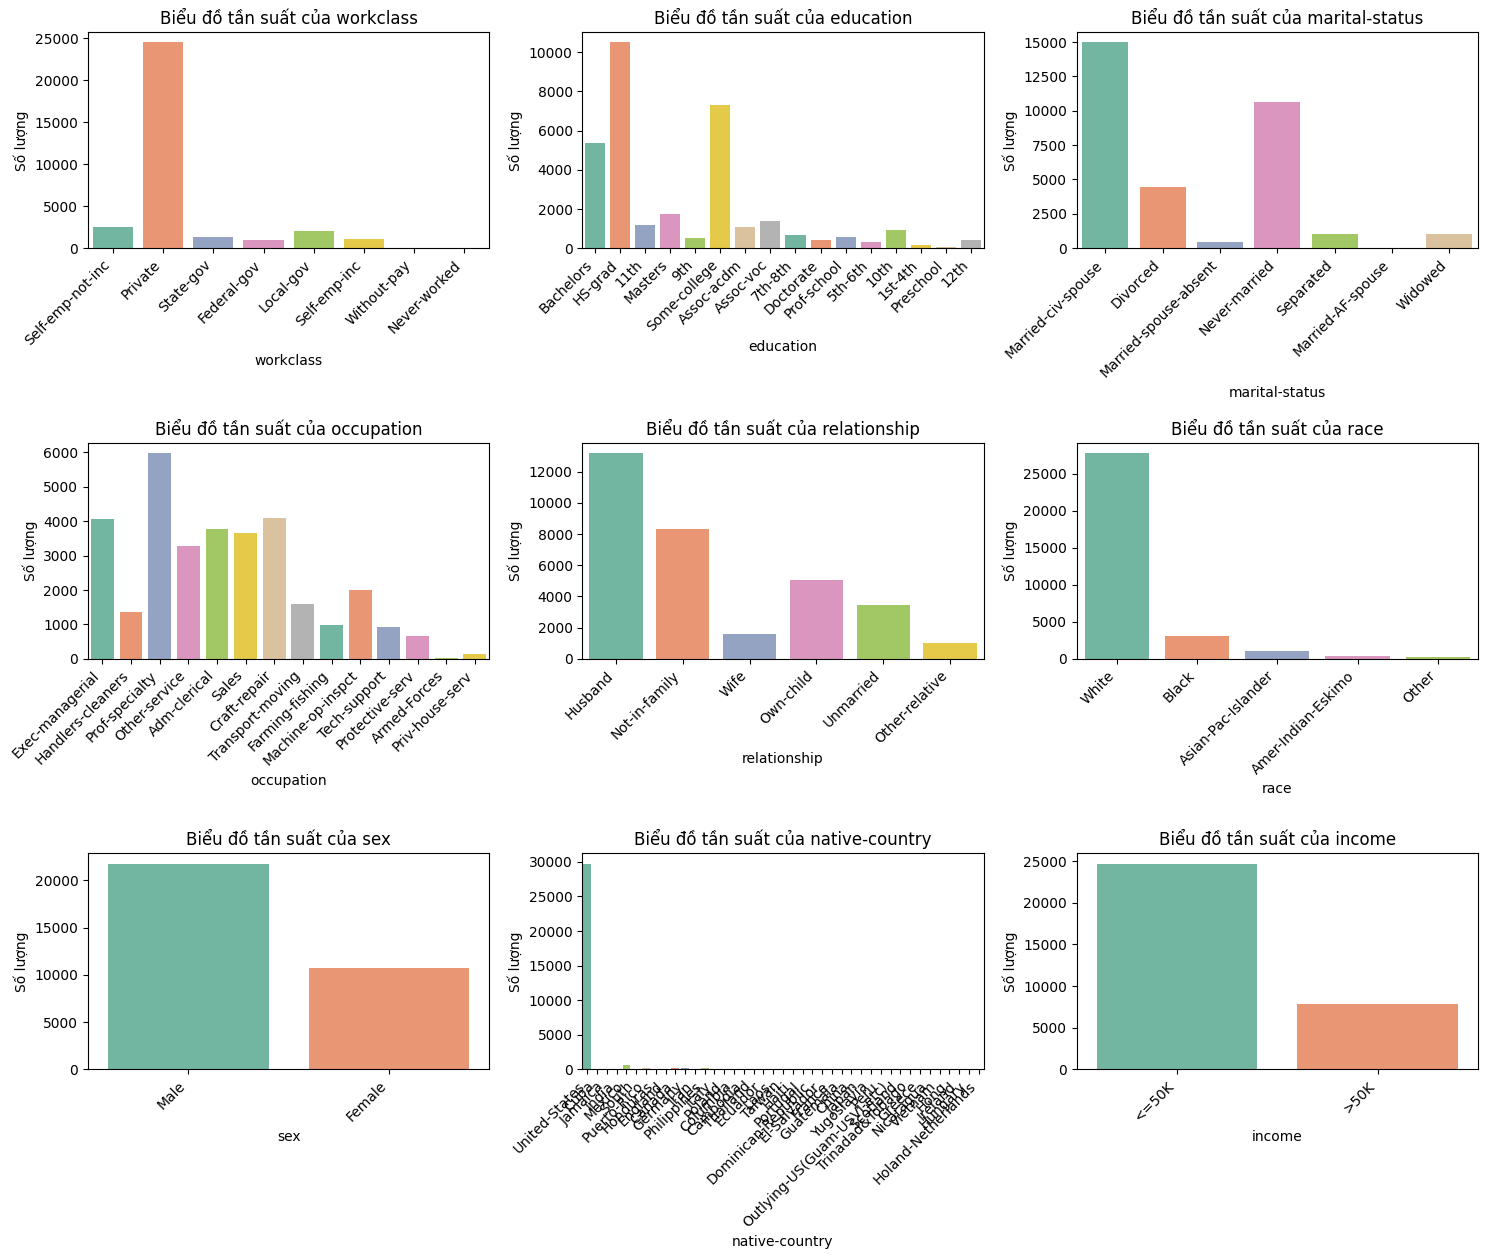

In [ ]:
# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(15, 15))  # Tăng kích thước biểu đồ để dễ nhìn hơn

# Sử dụng màu sắc dễ nhìn với seaborn
sns.set_palette("Set2")

for i, col in enumerate(cat_cols_count, 1):  # i: int, col: str
    plt.subplot(len(cat_cols_count) // 3 + 1, 3, i)
    sns.countplot(x=data[col], hue=data[col], palette="Set2", legend=False)  # Thay đổi bảng màu
    plt.title(f"Biểu đồ tần suất của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45, ha="right")  # Xoay nhãn trục X, căn phải cho dễ đọc

# Tăng khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

<ipython-input-42-b8a84fb50526>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['native-country'], palette='Set2')  # Sử dụng 'y' để biểu đồ nằm ngang


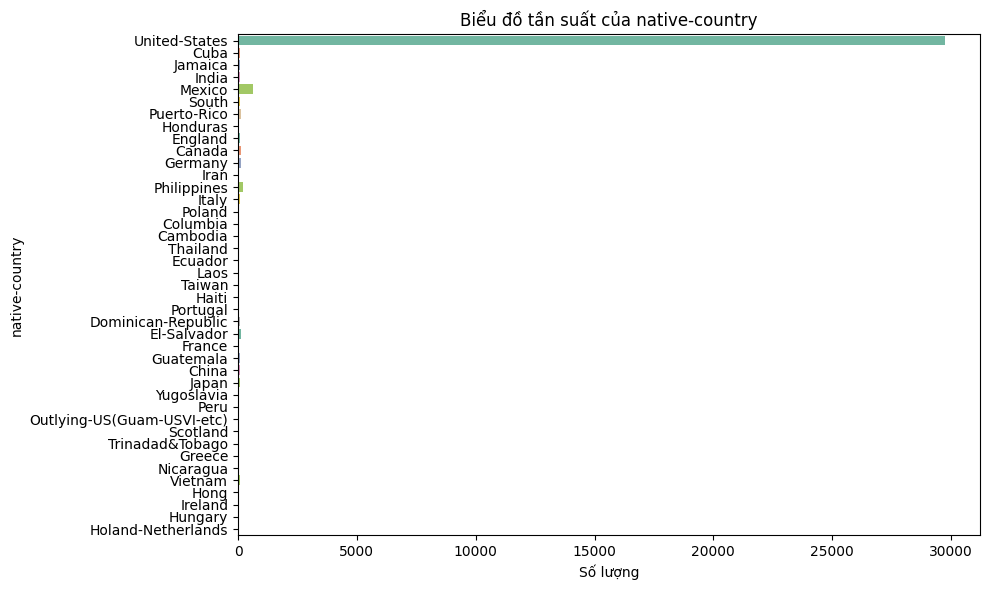

In [42]:
# Tạo biểu đồ cột ngang cho native-country
plt.figure(figsize=(10, 6))  # Tăng kích thước của biểu đồ

# Vẽ biểu đồ countplot theo chiều ngang cho cột 'native-country'
sns.countplot(y=data['native-country'], palette='Set2')  # Sử dụng 'y' để biểu đồ nằm ngang

# Thiết lập tiêu đề và các nhãn trục
plt.title("Biểu đồ tần suất của native-country")
plt.xlabel('Số lượng')
plt.ylabel('native-country')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Nhận xét và xu hướng dữ liệu từ biểu đồ Cột

1. **Cột `workclass`**:
- **Xu hướng**: Phần lớn dữ liệu thuộc về nhóm `Private`, chiếm tỷ lệ cao nhất với 24,509 cá nhân. Các nhóm như `Self-emp-not-inc`, `Local-gov`, `State-gov` có tần suất thấp hơn nhiều.
- **Nhận xét**: Đây là các cá nhân làm việc trong khu vực tư nhân hoặc trong các tổ chức nhà nước hoặc tự kinh doanh. Các nhóm khác như `Without-pay` và `Never-worked` có rất ít cá nhân.

2. **Cột `education`**:
- **Xu hướng**: Dữ liệu chủ yếu rơi vào các nhóm `HS-grad` (10494 người), `Some-college` (7282 người) và `Bachelors` (5352 người), cho thấy phần lớn các cá nhân có trình độ học vấn từ tốt nghiệp trung học trở lên.
- **Nhận xét**: Phần lớn dữ liệu có trình độ học vấn phổ thông hoặc đại học cơ bản. Các nhóm có trình độ học vấn cao hơn như `Masters` hoặc `Doctorate` ít hơn rất nhiều.

3. **Cột `marital-status`**:
- **Xu hướng**: Nhóm `Married-civ-spouse` chiếm ưu thế với 14,970 cá nhân. Các nhóm như `Never-married` và `Divorced` cũng có số lượng đáng kể, lần lượt là 10,666 và 4,441.
- **Nhận xét**: Phần lớn người tham gia là đã kết hôn, trong khi nhóm chưa kết hôn hoặc đã ly hôn chiếm tỷ lệ lớn thứ hai.

4. **Cột `occupation`**:
- **Xu hướng**: Các nghề nghiệp như `Exec-managerial` (5,979 người), `Craft-repair` (4,094 người), và `Prof-specialty` (4,065 người) chiếm ưu thế, trong khi các nghề nghiệp như `Armed-Forces` có rất ít cá nhân.
- **Nhận xét**: Phần lớn người tham gia trong các nhóm nghề nghiệp quản lý, kỹ thuật và chuyên môn. Các nhóm nghề nghiệp ít gặp hơn bao gồm những người làm việc trong quân đội hoặc dịch vụ cá nhân.

5. **Cột `relationship`**:
- **Xu hướng**: Nhóm `Husband` (13,187 người) chiếm tỉ lệ cao nhất, theo sau là nhóm `Not-in-family` (8,291 người) và `Own-child` (5,064 người).
- **Nhận xét**: Phần lớn người tham gia trong bộ dữ liệu này có quan hệ gia đình là chồng hoặc sống độc thân.

6. **Cột `race`**:
- **Xu hướng**: Dữ liệu chủ yếu là người da trắng (27,794 người), tiếp theo là người da đen (3,122 người). Các nhóm khác như `Asian-Pac-Islander` và `Amer-Indian-Eskimo` có số lượng rất thấp.
- **Nhận xét**: Phần lớn người tham gia trong bộ dữ liệu này là người da trắng.

7. **Cột `sex`**:
- **Xu hướng**: Có sự phân biệt rõ rệt giữa nam (21,774 người) và nữ (10,762 người), cho thấy số lượng nam cao hơn nhiều.
- **Nhận xét**: Đây là sự phân bổ khá đồng đều, mặc dù nam vẫn chiếm ưu thế hơn trong bộ dữ liệu.

8. **Cột `native-country`**:
- **Xu hướng**: Phần lớn người tham gia đến từ `United-States` (29734 người), chiếm phần lớn trong biểu đồ. Các quốc gia khác như `Cuba`, `Jamaica`, và `India` có số lượng rất thấp.
- **Nhận xét**: Biểu đồ này cho thấy sự phân bổ không đồng đều giữa các quốc gia, với `United-States` chiếm phần lớn người tham gia, trong khi những quốc gia khác có rất ít đại diện. Điều này có thể phản ánh rằng bộ dữ liệu chủ yếu đại diện cho những người dân Mỹ.

9. **Cột `income`**:
- **Xu hướng**: Phần lớn người tham gia có thu nhập <=50K (24,697 người), trong khi nhóm có thu nhập >50K chỉ có 7,839 người.
- **Nhận xét**: Đây là sự phân bổ không đồng đều giữa các nhóm thu nhập, với phần lớn người tham gia có thu nhập thấp hơn 50K.

---

**Tổng kết**:
- **Sự phân bổ không đồng đều**: Có một sự phân bổ rất không đồng đều trong nhiều cột, đặc biệt là `native-country` và `income`. Phần lớn dữ liệu đến từ các nhóm như `United-States` và có thu nhập thấp hơn 50K.
- **Nhóm lớn nhất và nhóm nhỏ nhất**: Nhóm `United-States` và `Private` trong cột `workclass` là những nhóm chiếm ưu thế. Những nhóm ít gặp như `Never-worked` hoặc `Armed-Forces` có số lượng rất nhỏ.


## c) Xử lý dữ liệu thiếu hoặc trùng lập (nếu có)

In [43]:
# Loại bỏ các bản ghi trùng lặp
data = data.drop_duplicates()
print(f"Số lượng bản ghi sau khi loại trùng lặp: {data.shape[0]}")

Số lượng bản ghi sau khi loại trùng lặp: 32536


## d) Phát hiện dữ liệu ngoại lai (outliers)

- **Phương pháp**: Dựa trên skewness để chọn Z-score (cho phân phối gần chuẩn) hoặc IQR (cho phân phối lệch).
- **Xử lý đề xuất**: Thay thế outliers bằng giá trị trung bình (Mean) hoặc trung vị (Median) tương ứng.

**Công thức tính Khoảng tứ phân vị (IQR) và Ngưỡng xác định Outlier:**

  1. Xác định Tứ phân vị thứ nhất (Q1 - giá trị mà 25% dữ liệu nhỏ hơn nó) và Tứ phân vị thứ ba (Q3 - giá trị mà 75% dữ liệu nhỏ hơn nó).

  2. Tính Khoảng tứ phân vị:

  $\Large IQR = Q3 - Q1$

  3. Xác định Ngưỡng dưới (Lower Bound):

  $\Large L = Q1 - 1.5 \times IQR$

  4. Xác định Ngưỡng trên (Upper Bound):

  $\Large U = Q3 + 1.5 \times IQR$

- Một giá trị được xem là ngoại lai (outlier) nếu nó nhỏ hơn Ngưỡng dưới (L) hoặc lớn hơn Ngưỡng trên (U).

**Công thức tính Z-score (cho dữ liệu mẫu):**

- Z-score cho biết một giá trị cụ thể cách trung bình bao nhiêu lần độ lệch chuẩn.

$\Large Z = \frac{x - \bar{x}}{s}$

Trong đó:

  - Z: là giá trị Z-score.

  - x: là giá trị của một quan sát cụ thể.

  - $\bar{x}$: là trung bình cộng của mẫu.

  - s: là độ lệch chuẩn của mẫu.

In [45]:
numeric_features: List[str] = ["age", "fnlwgt", "education-num","hours-per-week"]

In [46]:
# Lặp qua các cột số để phát hiện và xử lý outliers

for col in numeric_features:  # col: str
    skewness = skew(data[col])  # Loại bỏ NaN trước khi tính skewness

    if abs(skewness) < 0.5:  # Phân phối gần chuẩn → Dùng Z-score
        z_scores = zscore(data[col])
        outliers = data[abs(z_scores) > 3]
        print(f"{col}: {len(outliers)} ngoại lai (Xác định bằng Z-score)")

        # Loại bỏ hoặc thay thế giá trị ngoại lai
        # data.loc[abs(z_scores) > 3, col] = round(data[col].mean())  # Thay bằng Mean

        data.loc[abs(z_scores) > 3, col] = round(data[col].median())  # Thay bằng Median

    else:  # Phân phối lệch → Dùng IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"{col}: {len(outliers)} ngoại lai (Xác định bằng IQR)")

        # Thay thế giá trị ngoại lai bằng Median
        data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = data[col].median()

age: 142 ngoại lai (Xác định bằng IQR)
fnlwgt: 993 ngoại lai (Xác định bằng IQR)
education-num: 216 ngoại lai (Xác định bằng Z-score)
hours-per-week: 440 ngoại lai (Xác định bằng Z-score)


In [65]:
gain_thresh          = 10_000          # > 10 000 → thay = mean
loss_lower_thresh    = 1_000           # < 1 000  → thay = mean
loss_upper_thresh    = 2_500           # > 2 500  → thay = mean

# Tính mean hiện tại
gain_mean = round(data["capital-gain"].mean())
loss_mean = round(data["capital-loss"].mean())

# Thay thế giá trị vượt ngưỡng
data.loc[data["capital-gain"] > gain_thresh, "capital-gain"] = gain_mean

loss_outliers = (data["capital-loss"] < loss_lower_thresh) | \
                (data["capital-loss"] > loss_upper_thresh)
data.loc[loss_outliers, "capital-loss"] = loss_mean

print("Hoàn tất làm sạch outlier theo yêu cầu.")

Hoàn tất làm sạch outlier theo yêu cầu.


In [48]:
# Các cột cần kiểm tra
numeric_features = ["age","fnlwgt","education-num","hours-per-week"]

# Xác định ngoại lai bằng IQR
def detect_outliers_iqr(df: pd.DataFrame, col: str) -> int:
    """Đếm outliers bằng IQR."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

# Xác định ngoại lai bằng Z-score
def detect_outliers_zscore(df: pd.DataFrame, col: str, threshold: int = 3) -> int:
    """Đếm outliers bằng Z-score."""
    return (np.abs(zscore(data[col])) > threshold).sum()

# Kiểm tra lại số lượng ngoại lai
outliers_after: Dict[str, int] = {}
for col in numeric_features:  # col: str
    if col in ["age","fnlwgt"]:  # Dùng IQR
        outliers_after[col] = detect_outliers_iqr(data, col)
    else:  # Dùng Z-score
        outliers_after[col] = detect_outliers_zscore(data, col)

print("Số lượng ngoại lai còn lại sau xử lý:", outliers_after)

Số lượng ngoại lai còn lại sau xử lý: {'age': np.int64(98), 'fnlwgt': np.int64(464), 'education-num': np.int64(0), 'hours-per-week': np.int64(254)}


In [49]:
# Áp dụng Winsorization cho cột 'age'
Q1 = data["age"].quantile(0.25)
Q3 = data["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["age"] = np.where(data["age"] < lower_bound, lower_bound, data["age"])
data["age"] = np.where(data["age"] > upper_bound, upper_bound, data["age"])

In [50]:
# Áp dụng Winsorization cho cột 'fnlwgt'
Q1 = data["fnlwgt"].quantile(0.25)
Q3 = data["fnlwgt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["fnlwgt"] = np.where(data["fnlwgt"] < lower_bound, lower_bound, data["fnlwgt"])
data["fnlwgt"] = np.where(data["fnlwgt"] > upper_bound, upper_bound, data["fnlwgt"])

In [51]:
# Áp dụng Winsorization cho cột 'hours-per-week'
Q1 = data["hours-per-week"].quantile(0.25)
Q3 = data["hours-per-week"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["hours-per-week"] = np.where(data["hours-per-week"] < lower_bound, lower_bound, data["hours-per-week"])
data["hours-per-week"] = np.where(data["hours-per-week"] > upper_bound, upper_bound, data["hours-per-week"])

In [52]:
# Áp dụng Winsorization cho cột 'education-num'
Q1 = data["education-num"].quantile(0.25)
Q3 = data["education-num"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["education-num"] = np.where(data["education-num"] < lower_bound, lower_bound, data["education-num"])
data["education-num"] = np.where(data["education-num"] > upper_bound, upper_bound, data["education-num"])

In [53]:
# Kiểm tra lại số lượng ngoại lai sau khi xử lý

# Các cột cần kiểm tra
numeric_features = ["age","fnlwgt","education-num","hours-per-week"]
outliers_after = {}
for col in numeric_features:  # col: str
    if col in ["age","fnlwgt"]:  # Dùng IQR
        outliers_after[col] = detect_outliers_iqr(data, col)
    else:  # Dùng Z-score
        outliers_after[col] = detect_outliers_zscore(data, col)

print("Số lượng ngoại lai còn lại sau xử lý:", outliers_after)


Số lượng ngoại lai còn lại sau xử lý: {'age': np.int64(0), 'fnlwgt': np.int64(0), 'education-num': np.int64(0), 'hours-per-week': np.int64(0)}


In [54]:
# In ra các giá trị ngoại lai còn lại
print("Các giá trị ngoại lai của hours-per-week:")
print(data.loc[np.abs(zscore(data["hours-per-week"])) > 3, "hours-per-week"])

print("\nCác giá trị ngoại lai của age:")
Q1 = data["age"].quantile(0.25)
Q3 = data["age"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(data.loc[(data["age"] < lower_bound) | (data["age"] > upper_bound), "age"])

print("\nCác giá trị ngoại lai của fnlwgt:")
Q1 = data["fnlwgt"].quantile(0.25)
Q3 = data["fnlwgt"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(data.loc[(data["fnlwgt"] < lower_bound) | (data["fnlwgt"] > upper_bound), "fnlwgt"])

print("\nCác giá trị ngoại lai của education-num:")
Q1 = data["education-num"].quantile(0.25)
Q3 = data["education-num"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(data.loc[(data["education-num"] < lower_bound) | (data["education-num"] > upper_bound), "education-num"])

Các giá trị ngoại lai của hours-per-week:
Series([], Name: hours-per-week, dtype: float64)

Các giá trị ngoại lai của age:
Series([], Name: age, dtype: float64)

Các giá trị ngoại lai của fnlwgt:
Series([], Name: fnlwgt, dtype: float64)

Các giá trị ngoại lai của education-num:
Series([], Name: education-num, dtype: float64)


In [66]:
# Kiểm tra các giá trị duy nhất trong các cột numeric và in tên cột
numeric_features = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
print("### Cột Numeric ###")
for col in numeric_features:
    print(f"Giá trị duy nhất trong cột {col}:")
    print(data[col].unique())  # In các giá trị duy nhất trong cột
    print()  # Thêm dòng trống để dễ đọc

### Cột Numeric ###
Giá trị duy nhất trong cột age:
[50.  38.  53.  28.  37.  49.  52.  31.  42.  30.  23.  32.  40.  34.
 25.  43.  54.  35.  59.  56.  19.  39.  20.  45.  22.  48.  21.  24.
 57.  44.  41.  29.  18.  47.  46.  36.  27.  67.  33.  75.5 17.  55.
 61.  70.  64.  71.  68.  66.  51.  58.  26.  60.  75.  65.  62.  63.
 72.  74.  69.  73. ]

Giá trị duy nhất trong cột fnlwgt:
[ 83311. 215646. 234721. ...  34066.  84661. 257302.]

Giá trị duy nhất trong cột education-num:
[13.   9.   7.  14.   5.  10.  12.  11.   4.5 16.  15.   6.   8. ]

Giá trị duy nhất trong cột capital-gain:
[   0  526 5178 5013 2407 7688 1078 4064 4386 7298 1409 3674 1055 3464
 2050 2176 2174  594 6849 4101 1111 8614 3411 2597 4650 9386 2463 3103
 2964 3325 2580 3471 4865 6514 1471 2329 2105 2885 2202 2961 6767 2228
 1506 2635 5556 4787 3781 3137 3818 3942  914  401 2829 2977 4934 2062
 2354 5455 1424 3273 4416 3908  991 4931 1086 7430 6497  114 7896 2346
 3418 3432 2907 1151 2414 2290 4508 2538 3456 641

In [57]:
# Thay thế giá trị của cột 'income' là 0 và 1
data['income'] = data['income'].map({'>50K': 0, '<=50K': 1})

# Kiểm tra kết quả
print(data['income'].value_counts())

income
1    24697
0     7839
Name: count, dtype: int64


In [58]:
data['income'] = data['income'].astype(int)  # Chuyển về kiểu số nguyên
data['income'] = data['income'].astype("category")

In [59]:
## Kiểm tra dữ liệu thiếu
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [60]:
print(data.dtypes)

age                float64
workclass           object
fnlwgt             float64
education           object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week     float64
native-country      object
income            category
dtype: object


In [61]:
print(data["income"].unique())  # Xem các giá trị thực tế sau khi xử lý


[1, 0]
Categories (2, int64): [0, 1]


In [62]:
# --- Đếm số lượng giá trị 0 và 1 trong cột 'income' sau khi xử lý ---

# Sử dụng value_counts() để đếm số lần xuất hiện của mỗi giá trị duy nhất
num_value_counts: pd.Series = data['income'].value_counts()

print("\nSố lượng bản ghi cho mỗi giá trị 'income':")
print(num_value_counts)

# Lấy số lượng cụ thể cho từng giá trị (0 và 1)
# Sử dụng .get(key, 0) để tránh lỗi nếu một giá trị không tồn tại
count_0: int = num_value_counts.get(0, 0)
count_1: int = num_value_counts.get(1, 0)

print(f"\nSố lượng bản ghi với income = 0 (>50k): {count_0}")
print(f"Số lượng bản ghi với income = 1 (<=50k):   {count_1}")

    # Tính và in tỷ lệ phần trăm
print("\nTỷ lệ phần trăm:")
num_proportions: pd.Series = data['income'].value_counts(normalize=True) * 100
print(num_proportions.round(2)) # Làm tròn 2 chữ số thập phân


Số lượng bản ghi cho mỗi giá trị 'income':
income
1    24697
0     7839
Name: count, dtype: int64

Số lượng bản ghi với income = 0 (>50k): 7839
Số lượng bản ghi với income = 1 (<=50k):   24697

Tỷ lệ phần trăm:
income
1    75.91
0    24.09
Name: proportion, dtype: float64


Trực quan hóa dữ liệu SAU KHI xử lý outliers

In [67]:
print(data.describe())

               age         fnlwgt  education-num  capital-gain  capital-loss  \
count  32536.00000   32536.000000   32536.000000  32536.000000  32536.000000   
mean      38.37709  179395.772037      10.161590    306.974828    164.926881   
std       13.29057   85533.574049       2.416083   1282.817936    370.704333   
min       17.00000   12285.000000       4.500000      0.000000     86.000000   
25%       28.00000  117831.500000       9.000000      0.000000     86.000000   
50%       37.00000  178356.000000      10.000000      0.000000     86.000000   
75%       47.00000  226130.500000      12.000000      0.000000     86.000000   
max       75.50000  388579.000000      16.000000   9562.000000   2489.000000   

       hours-per-week  
count    32536.000000  
mean        41.090177  
std          6.058916  
min         32.500000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         52.500000  



--- Thống kê mô tả cho cột số sau khi xử lý outlier: age ---
count    32536.00000
mean        38.37709
std         13.29057
min         17.00000
25%         28.00000
50%         37.00000
75%         47.00000
max         75.50000
Name: age, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 0

--- Thống kê mô tả cho cột số sau khi xử lý outlier: fnlwgt ---
count     32536.000000
mean     179395.772037
std       85533.574049
min       12285.000000
25%      117831.500000
50%      178356.000000
75%      226130.500000
max      388579.000000
Name: fnlwgt, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 0

--- Thống kê mô tả cho cột số sau khi xử lý outlier: education-num ---
count    32536.000000
mean        10.161590
std          2.416083
min          4.500000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 0

--- Thống kê mô tả cho cột số sau khi xử lý outlier: ca

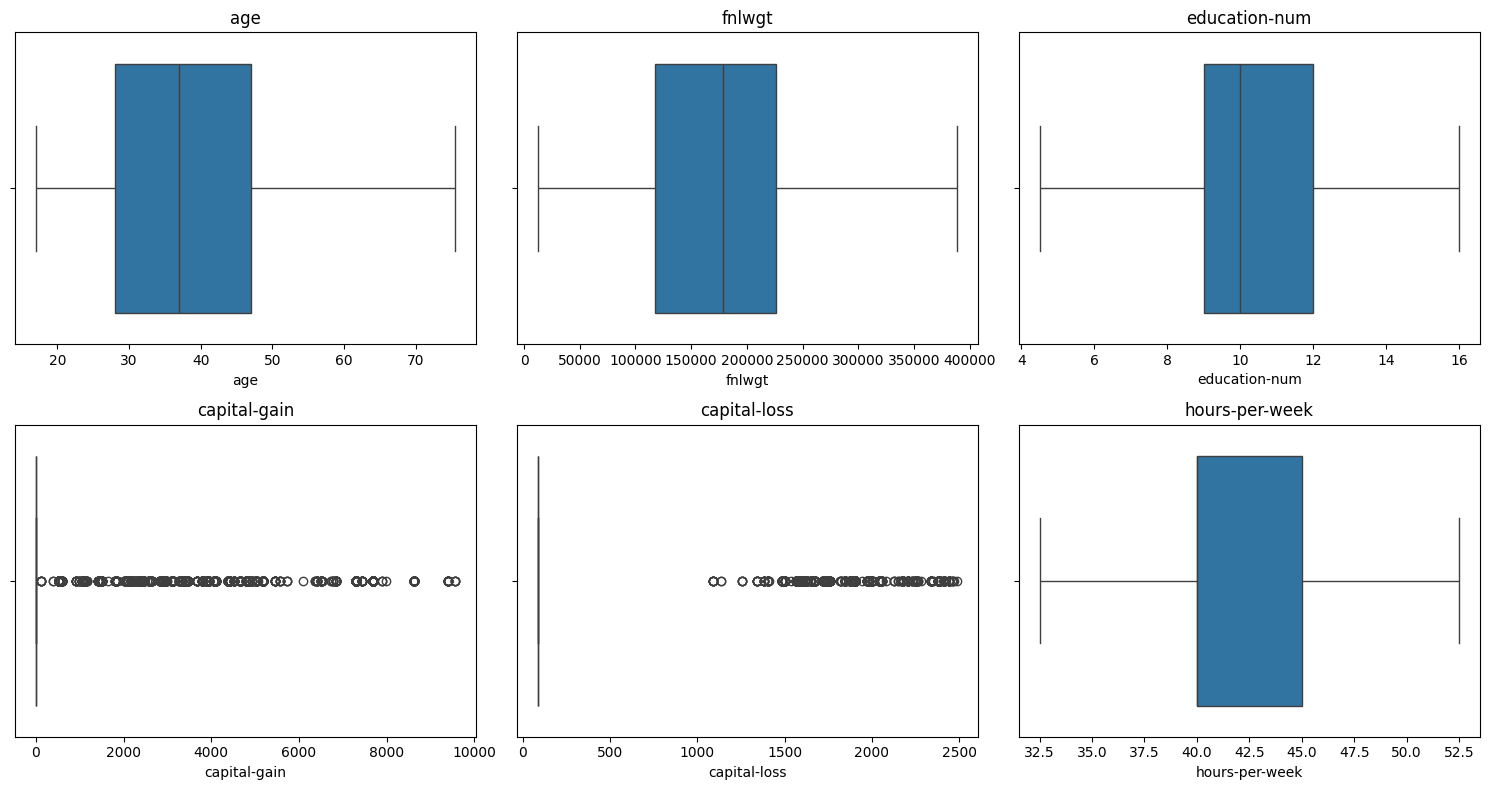

In [68]:
num_cols: List[str] = data.select_dtypes("number").columns.tolist()
num_plots = len(num_cols)

for col in num_cols_plot:
    desc = data[col].describe()
    print(f"\n--- Thống kê mô tả cho cột số sau khi xử lý outlier: {col} ---")
    print(desc)
    print(f"Outliers (theo IQR):")
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"Số lượng outliers: {len(outliers)}")

rows = int(np.ceil(num_plots / 3))
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


--- Ma trận tương quan giữa các cột số sau khi xử lý outlier ---
                 age  fnlwgt  education-num  capital-gain  capital-loss  \
age             1.00   -0.06           0.06          0.09          0.05   
fnlwgt         -0.06    1.00          -0.03         -0.01          0.00   
education-num   0.06   -0.03           1.00          0.08          0.08   
capital-gain    0.09   -0.01           0.08          1.00         -0.05   
capital-loss    0.05    0.00           0.08         -0.05          1.00   
hours-per-week  0.11   -0.02           0.18          0.07          0.06   

                hours-per-week  
age                       0.11  
fnlwgt                   -0.02  
education-num             0.18  
capital-gain              0.07  
capital-loss              0.06  
hours-per-week            1.00  


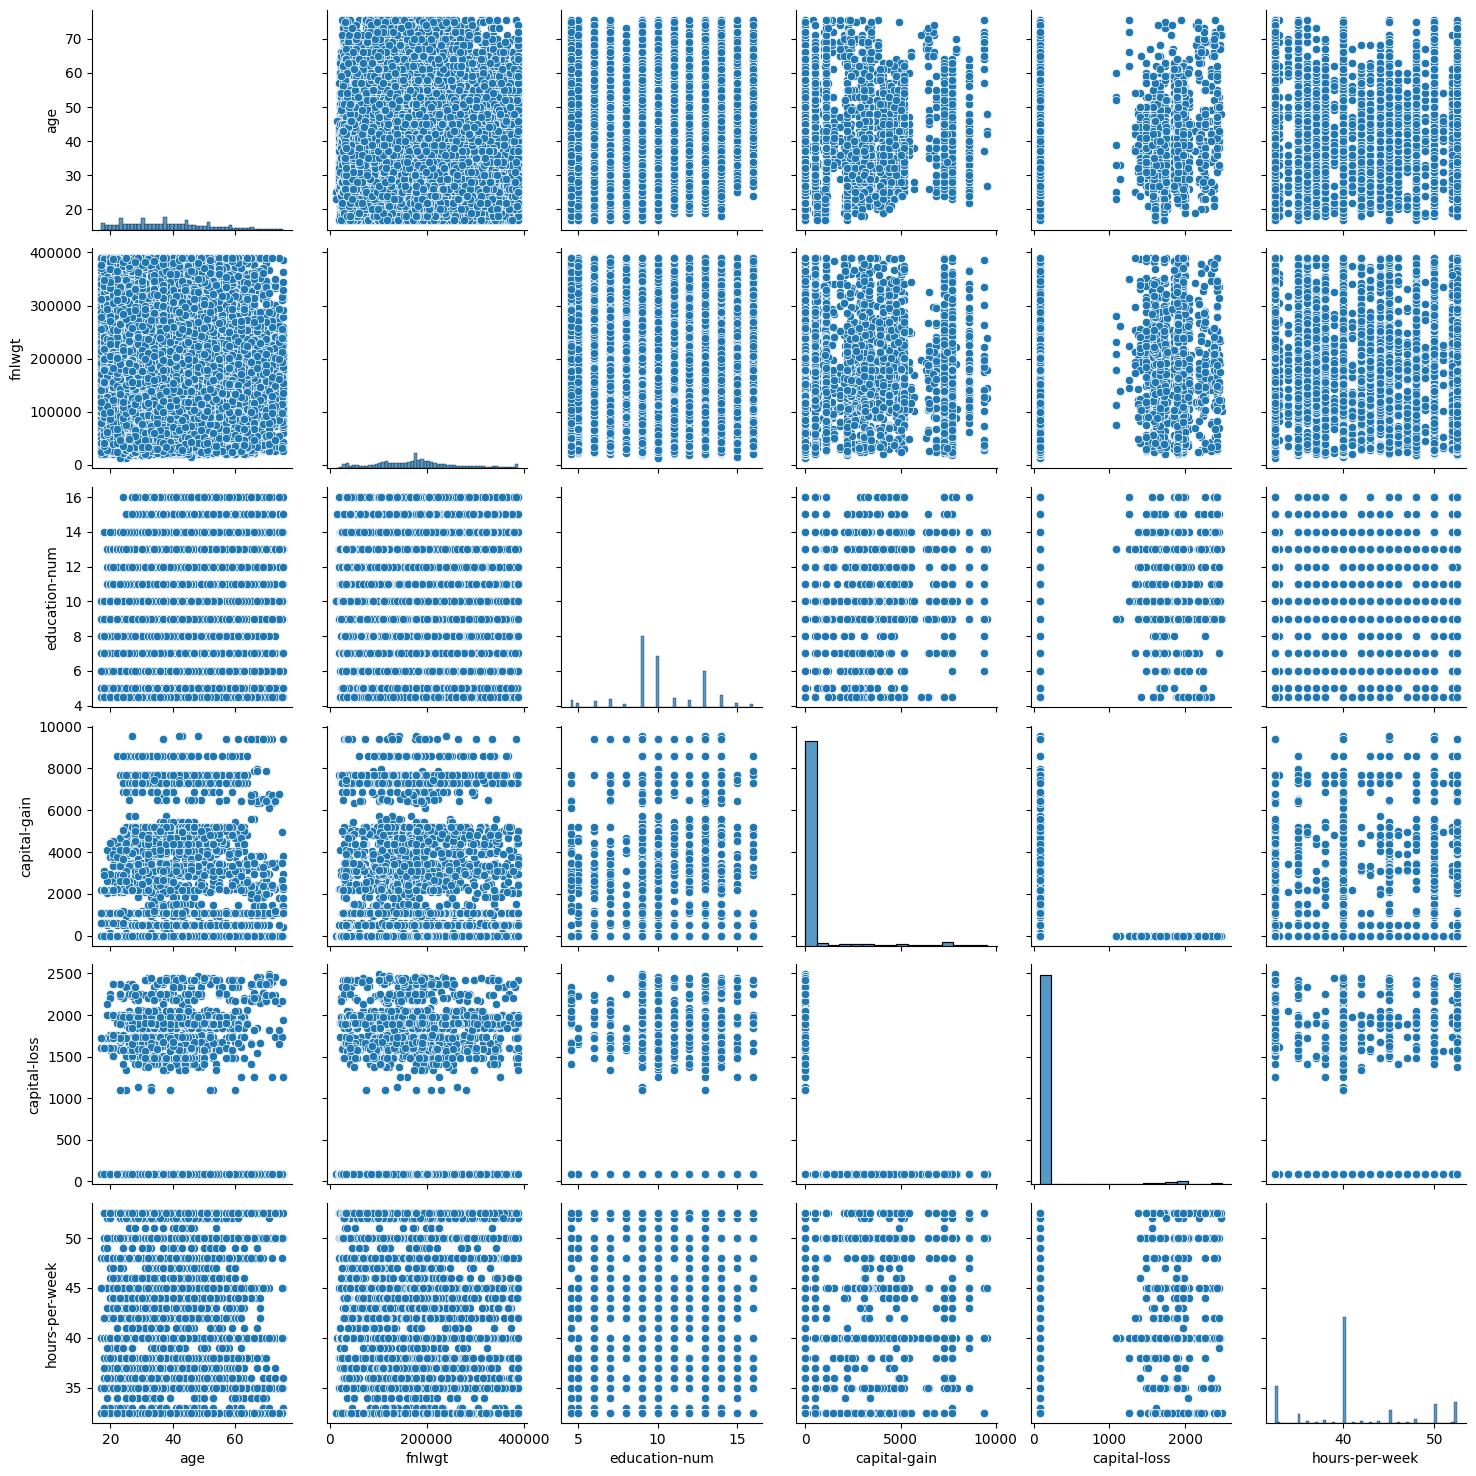

In [69]:
num_cols = data.select_dtypes('number').columns

print("\n--- Ma trận tương quan giữa các cột số sau khi xử lý outlier ---")
corr = data[num_cols].corr()
print(corr.round(2))

sns.pairplot(data)
plt.show()


--- Giá trị trung bình của các cột số theo nhóm trong 'income' sau khi xử lý outlier
          age     fnlwgt  education-num  capital-gain  capital-loss  \
income                                                                
0       44.10  178872.33          11.62        846.98        262.69   
1       36.56  179561.92           9.70        135.57        133.90   

        hours-per-week  
income                  
0                44.00  
1                40.17  


<ipython-input-70-1e99766bd536>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('income')[num_cols].mean().round(2))


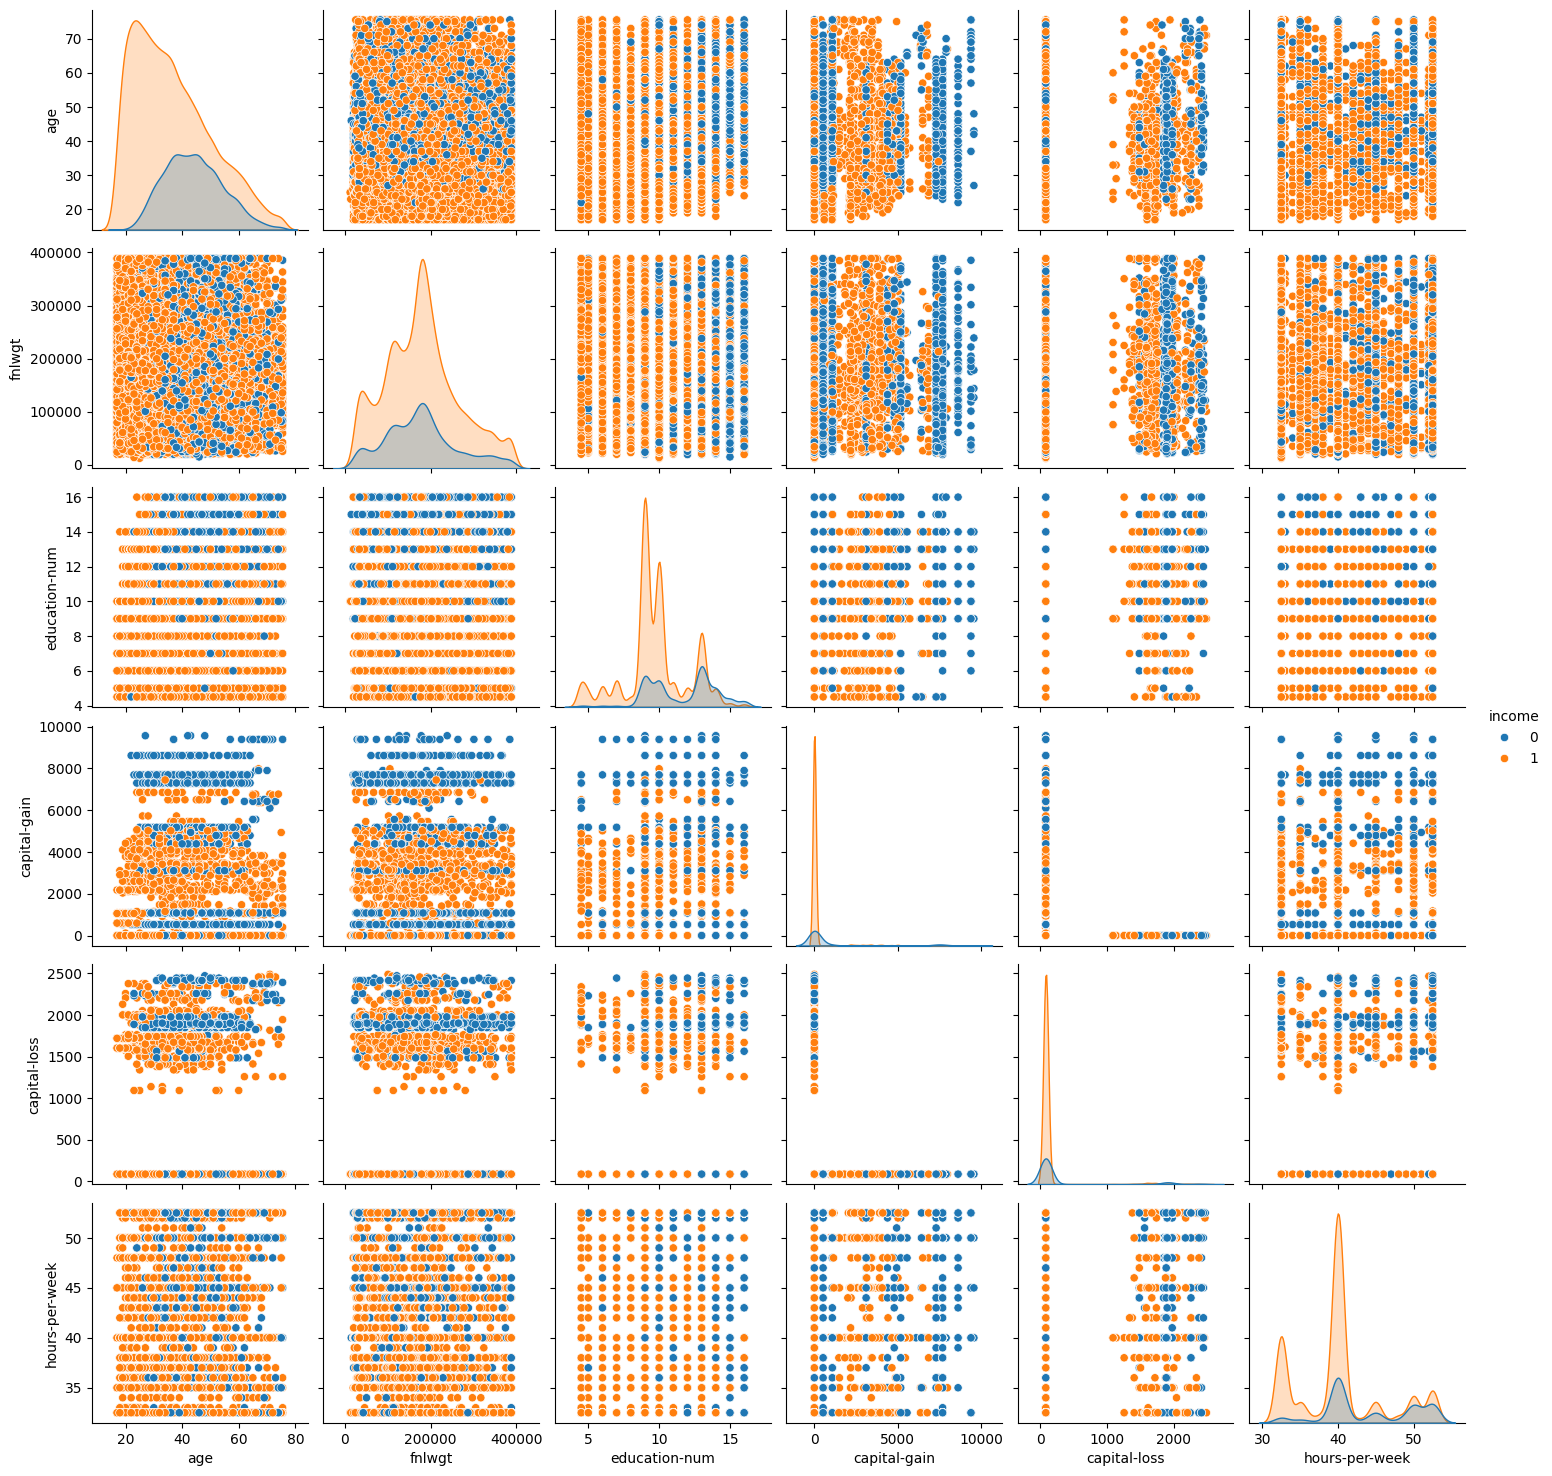

In [70]:
num_cols = data.select_dtypes('number').columns
if 'income' in data.columns:
    print("\n--- Giá trị trung bình của các cột số theo nhóm trong 'income' sau khi xử lý outlier")
    print(data.groupby('income')[num_cols].mean().round(2))
else:
    print("Cột 'income' không tồn tại trong dữ liệu.")

sns.pairplot(data, hue='income')
plt.show()

**Nhận xét Pairplot**:

Nhận định tổng quan
* **income = 0 → thu nhập > 50 K**, **income = 1 → thu nhập ≤ 50 K**.  
* Các ô đường chéo hiển thị **phân bố đơn biến**; các ô ngoài đường chéo là **scatter‐plot** phủ density giữa hai biến.  

---

1. Phân bố đơn biến (trên đường chéo)

| Biến | Hình dạng phân bố | Chênh lệch giữa hai nhóm | Hàm ý |
|------|-------------------|--------------------------|-------|
| **age** | Lệch phải nhẹ, 2 đỉnh (≈ 25–30 & 40–50 tuổi). | Nhóm > 50 K dồn về đỉnh thứ hai; median ≈ 44 > 37 y. | **Tuổi tăng** → khả năng > 50 K cao; quan hệ phi tuyến (giảm sau 60 y). |
| **fnlwgt** | Rất phân tán, đuôi dài đến 400 K. | Hai nhóm **chồng lên nhau**; chênh lệch nhỏ ở đuôi > 350 K. | Giá trị phân tách yếu; cân nhắc bỏ hoặc chuẩn hoá log. |
| **education‑num** | Rời rạc (0–16), hai đỉnh rõ 9 & 13. | Nhóm > 50 K dồn ở 13–16; nhóm ≤ 50 K ở 8–10. | **Học vấn** là tín hiệu mạnh. |
| **capital‑gain** | > 95 % giá trị = 0 (sau xử lý), đuôi đến 10 000. | Các điểm khác 0 gần như thuộc nhóm > 50 K. | Nên chuyển thành **binary flag**. |
| **capital‑loss** | Tương tự gain, đuôi đến 2 500. | Nhóm > 50 K dày ở 1 000–2 500; nhóm ≤ 50 K chủ yếu 0. | Cũng nên nhị phân/bucket. |
| **hours‑per‑week** | Ba đỉnh: 20, 40, 50 h. | Nhóm > 50 K lệch về 45–50 h; nhóm ≤ 50 K ở 35–40 h. | **Số giờ làm việc** mang tín hiệu tốt. |

---

2. Quan hệ cặp biến nổi bật

| Cặp biến | Xu hướng quan sát | Góc nhìn chi tiết |
|----------|------------------|-------------------|
| **age × hours‑per‑week** | (40–60 y, 40–50 h) chiếm nhiều điểm nhóm > 50 K. | Cần **interaction** hoặc boundary cong. |
| **age × education‑num** | education ≥ 12 & tuổi > 35 → phần lớn > 50 K. | Tuổi & học vấn **bổ trợ** nhau. |
| **education‑num × hours‑per‑week** | (≥ 12 năm, ≥ 45 h) hầu như toàn > 50 K. | Kết hợp **kỹ năng + nỗ lực**. |
| **capital‑gain/loss với biến khác** | Scatter tập trung tại 0 → ít thông tin. | Chuyển thành flag để khai thác. |
| **fnlwgt với biến khác** | Mây điểm rộng, màu trộn. | fnlwgt liên quan yếu, cân nhắc loại. |

---

3. Hàm ý thực tiễn & tiền xử lý

1. **Biến then chốt:** `education‑num`, `age`, `hours‑per‑week`.
2. **Biến thưa:** `capital‑gain/loss` → chuyển thành flag hoặc bucket.
3. **fnlwgt:** thử `log(1+x)`; nếu importance thấp, loại bỏ.
4. **Phân phối rời rạc:** `education‑num` mang tính ordinal → giữ nguyên hoặc target encoding.
5. **Scaling:** dùng **RobustScaler**/`QuantileTransformer` thay vì StandardScaler.
6. **Mô hình gợi ý:**  
   * **XGBoost / LightGBM** tận dụng phi tuyến & interaction.  
   * Với mô hình tuyến tính, thêm `age²`, `hours²`, `age*hours`, `edu*hours`.

---

4. Kết luận
> *Tuổi – học vấn – giờ làm việc* tạo thành bộ ba quan trọng nhất định hình khả năng đạt thu nhập > 50 K. `capital‑gain/loss` chỉ hữu ích khi tái mã hoá, còn `fnlwgt` gần như không góp phần phân tách. Khai thác đúng ba biến chính và tương tác của chúng sẽ giúp mô hình dự đoán thu nhập hiệu quả hơn.


--- Phân phối giá trị cho cột age sau khi xử lý outlier
age
(16.942, 22.85]    3888
(22.85, 28.7]      4997
(28.7, 34.55]      5150
(34.55, 40.4]      5207
(40.4, 46.25]      4549
(46.25, 52.1]      3501
(52.1, 57.95]      2022
(57.95, 63.8]      1821
(63.8, 69.65]       915
(69.65, 75.5]       486
Name: count, dtype: int64

--- Phân phối giá trị cho cột fnlwgt sau khi xử lý outlier
fnlwgt
(11908.706, 49914.4]    2266
(49914.4, 87543.8]      2326
(87543.8, 125173.2]     4531
(125173.2, 162802.6]    4499
(162802.6, 200432.0]    7598
(200432.0, 238061.4]    4251
(238061.4, 275690.8]    2430
(275690.8, 313320.2]    1770
(313320.2, 350949.6]    1477
(350949.6, 388579.0]    1388
Name: count, dtype: int64

--- Phân phối giá trị cho cột education-num sau khi xử lý outlier
education-num
(4.488, 5.65]     1491
(5.65, 6.8]        933
(6.8, 7.95]       1175
(7.95, 9.1]      10927
(9.1, 10.25]      7498
(10.25, 11.4]     1382
(11.4, 12.55]     1067
(12.55, 13.7]     5352
(13.7, 14.85]     1722
(1

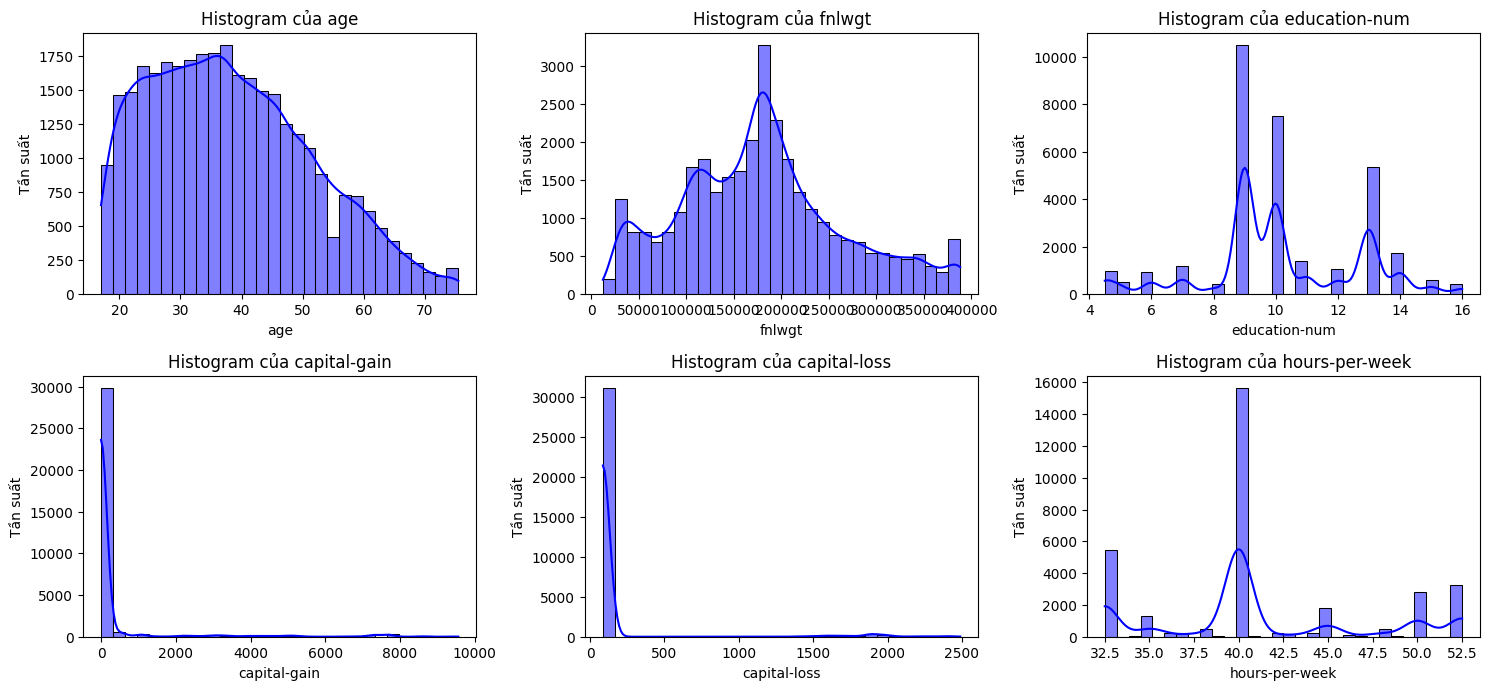

In [71]:
# Chọn các cột số
num_cols: List[str] = data.select_dtypes("number").columns.tolist()

for col in num_cols:
    print(f"\n--- Phân phối giá trị cho cột {col} sau khi xử lý outlier")
    value_counts = pd.cut(data[col], bins=10).value_counts().sort_index()
    print(value_counts)

# Thiết lập kích thước
plt.figure(figsize=(15, 10))

# Duyệt qua từng cột số để vẽ histogram
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)  # Sắp xếp 3 cột trên mỗi hàng
    sns.histplot(data[col], bins=30, kde=True, color='blue')  # Vẽ histogram có KDE
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()


--- Tần suất các giá trị trong cột 'workclass' sau khi xử lý outlier
workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'education' sau khi xử lý outlier
education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'marital-status' sau khi xử lý outlier
marital-status
Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed       

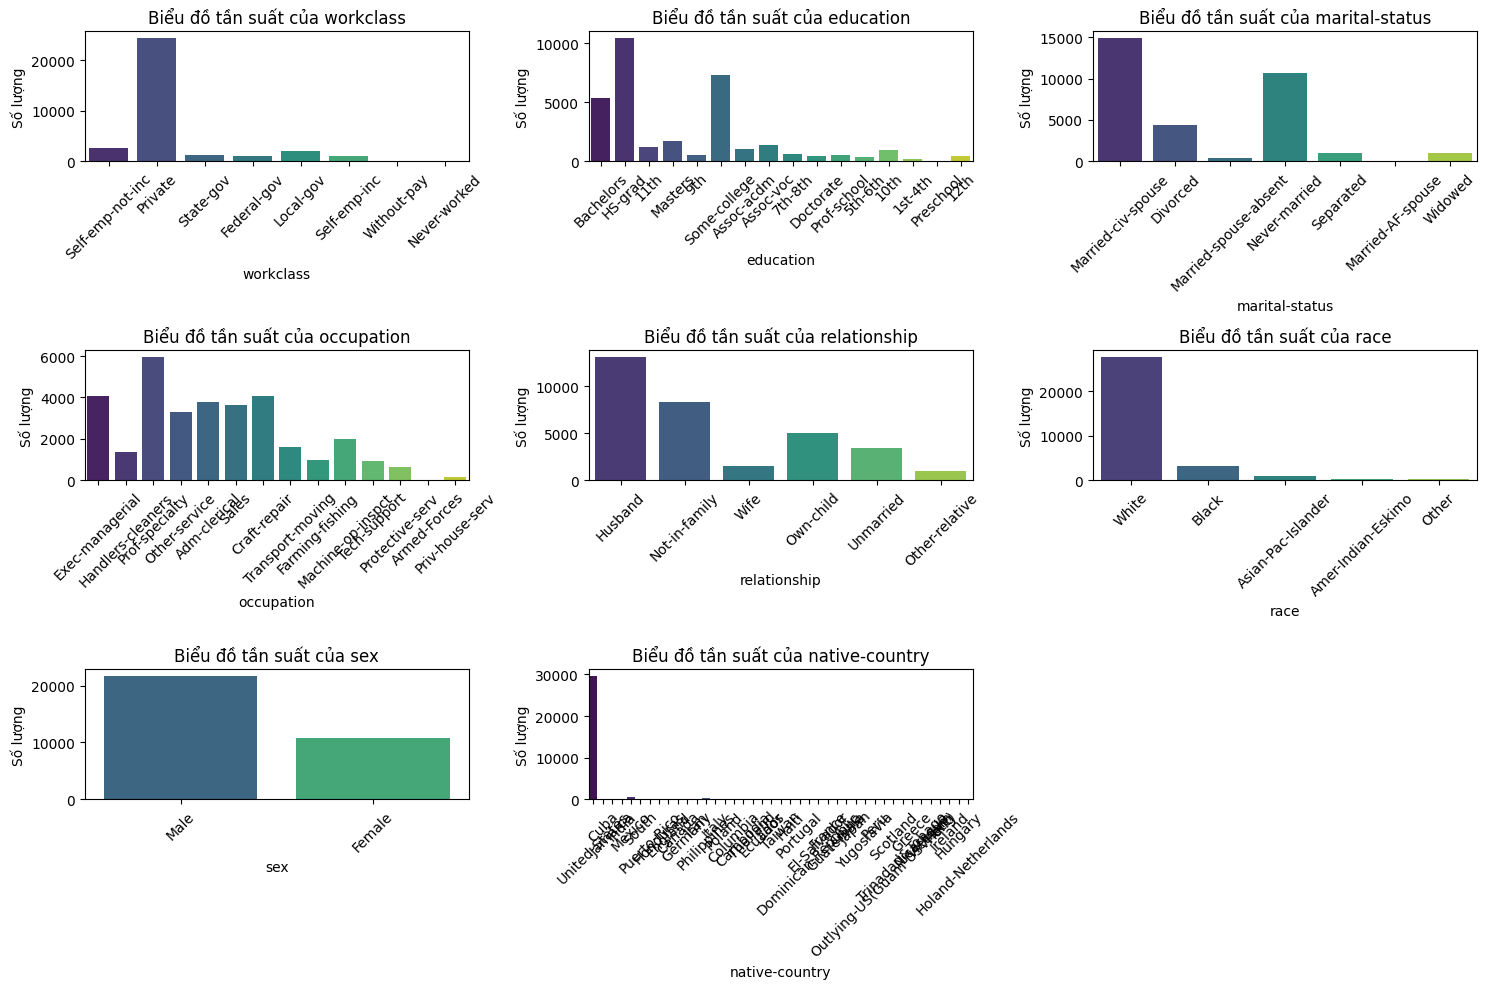

In [72]:
cat_cols: List[str] = data.select_dtypes(include='object').columns.tolist()

for col in cat_cols_count:
    print(f"\n--- Tần suất các giá trị trong cột '{col}' sau khi xử lý outlier")
    print(data[col].value_counts())

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols) // 3 + 1, 3, i)
    sns.countplot(x=data[col], hue=data[col], palette="viridis", legend=False)  # Sửa lỗi
    plt.title(f"Biểu đồ tần suất của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45)  # Xoay nhãn trục X nếu cần

plt.tight_layout()
plt.show()

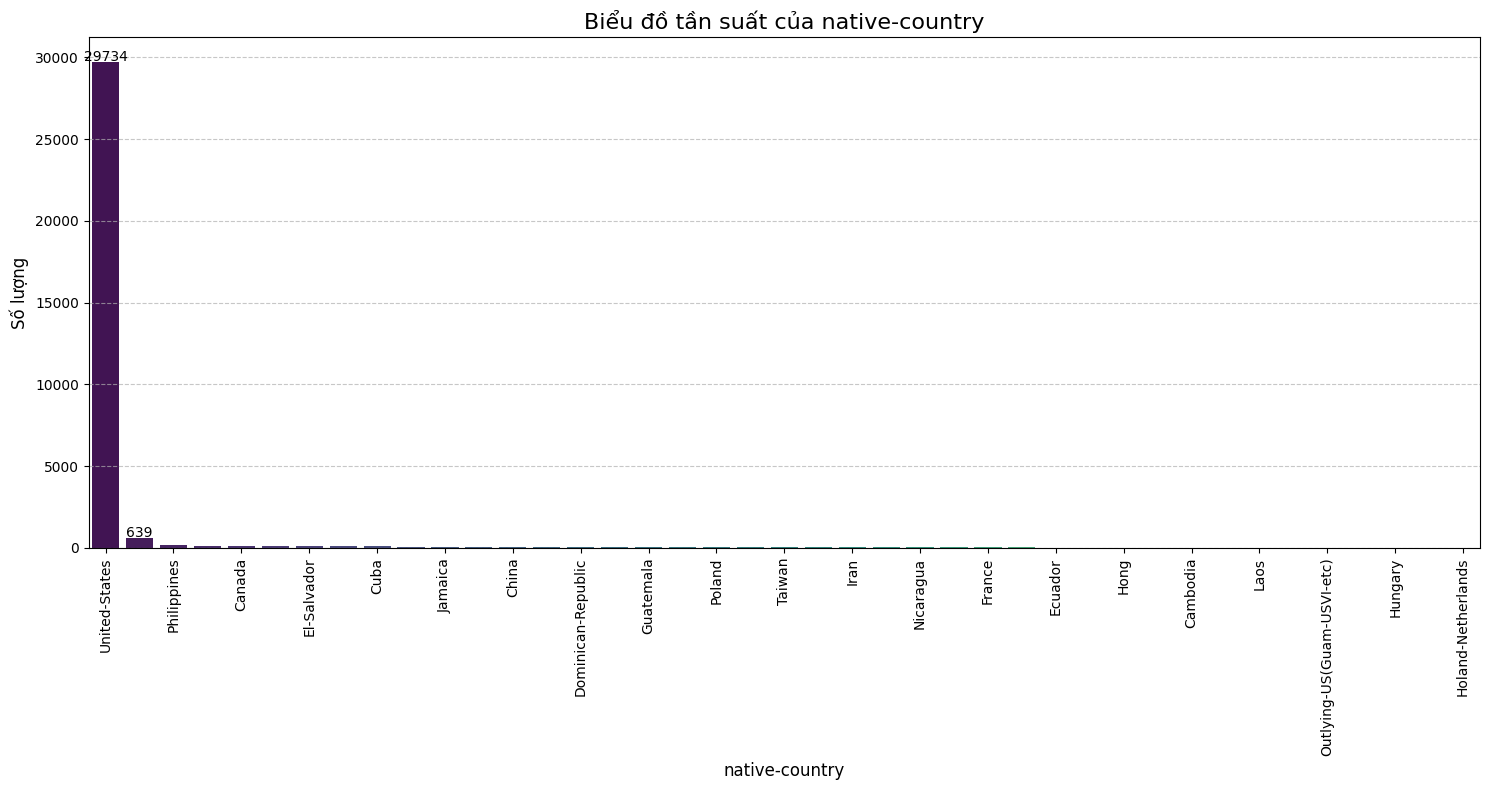


--- Tần suất các giá trị trong cột 'native-country':
native-country
United-States                 29734
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                           

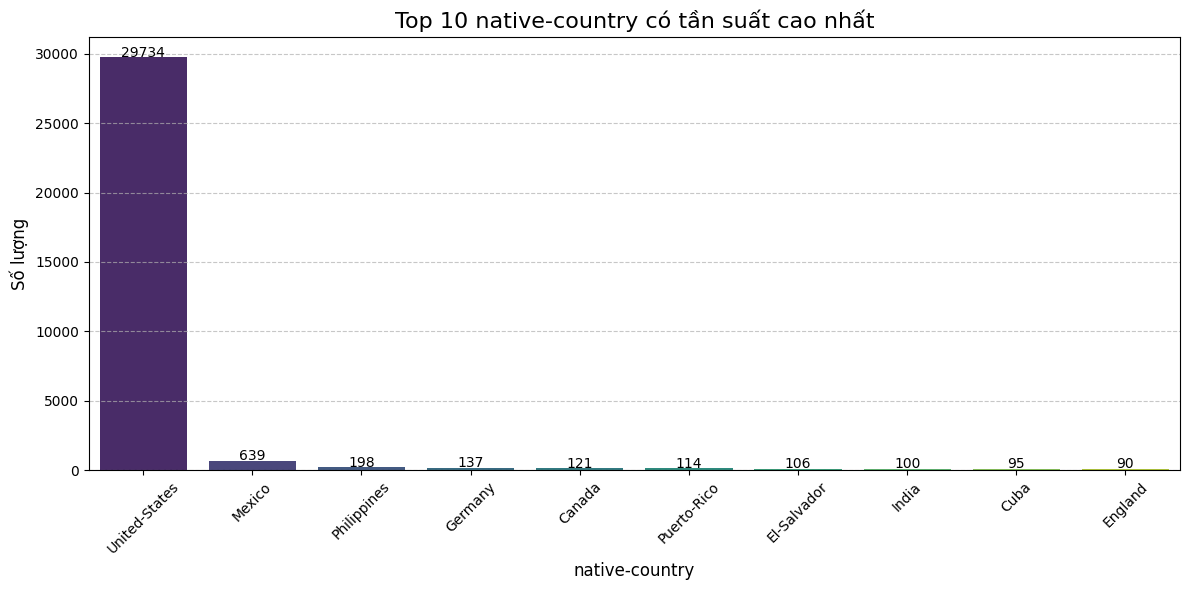

In [73]:
# Tạo biểu đồ tần suất cho native-country
plt.figure(figsize=(15, 8))  # Kích thước lớn để hiển thị rõ các nhãn

# Tính tần số và sắp xếp theo thứ tự giảm dần
country_counts = data['native-country'].value_counts().sort_values(ascending=False)

# Vẽ biểu đồ - sửa lỗi FutureWarning bằng cách thêm tham số x vào hue và tắt legend
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette="viridis", legend=False)

# Tiêu đề và nhãn
plt.title('Biểu đồ tần suất của native-country', fontsize=16)
plt.xlabel('native-country', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=90)

# Sửa lỗi: Không thiết lập lại xticks thủ công khi có nhiều quốc gia
# Thay vào đó, chỉ giữ lại một số nhãn nhất định nếu cần
if len(country_counts) > 20:
    # Lấy các vị trí của tất cả các ticks
    locs, labels = plt.xticks()
    # Chỉ giữ lại mỗi nhãn thứ hai
    plt.xticks(locs[::2], [item.get_text() for item in labels[::2]], rotation=90)

# Thêm giá trị số lượng trên mỗi cột nếu cần
for i, v in enumerate(country_counts.values):
    if v > 500:  # Chỉ hiển thị giá trị cho các cột có số lượng lớn
        plt.text(i, v + 50, f"{v}", ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Nếu bạn muốn xem chi tiết các giá trị
print("\n--- Tần suất các giá trị trong cột 'native-country':")
print(country_counts)

# Nếu bạn muốn hiển thị tỉ lệ phần trăm
print("\n--- Tỉ lệ phần trăm:")
percentage = (country_counts / country_counts.sum()) * 100
print(percentage)

# Biểu đồ chỉ hiển thị top 10 quốc gia có số lượng cao nhất
plt.figure(figsize=(12, 6))
top10_countries = country_counts.head(10)  # Lấy top 10

sns.barplot(x=top10_countries.index, y=top10_countries.values, hue=top10_countries.index, palette="viridis", legend=False)
plt.title('Top 10 native-country có tần suất cao nhất', fontsize=16)
plt.xlabel('native-country', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)

# Thêm giá trị số lượng trên mỗi cột
for i, v in enumerate(top10_countries.values):
    plt.text(i, v + 50, f"{v}", ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Phân bố của cột 'income' ---
Giá trị        Số lượng       Tỷ lệ (%) 
----------------------------------------
0              7839            24.09%
1              24697           75.91%


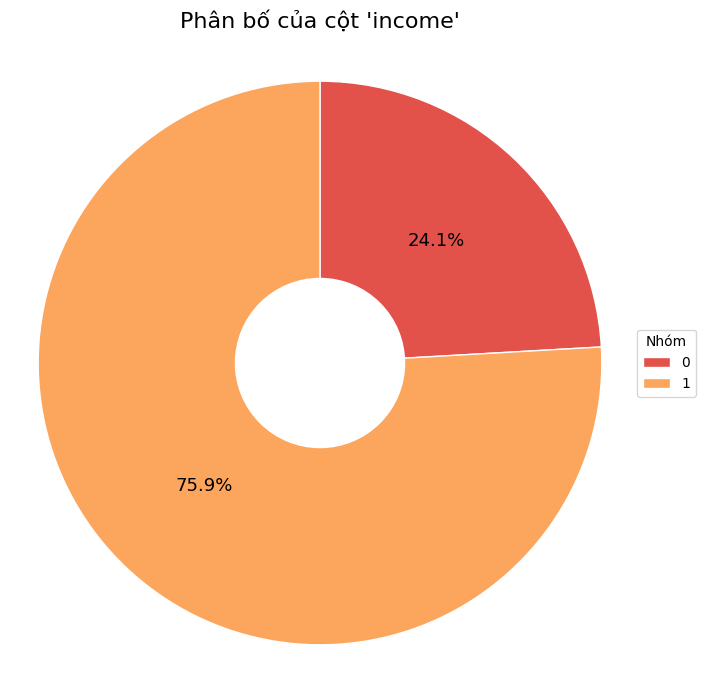

In [74]:
col = "income"  # Thay "income" bằng tên cột bạn muốn vẽ

# Kiểm tra nếu cột tồn tại trong dữ liệu
if col in data.columns:
    # Lấy giá trị counts và labels
    value_counts = data[col].value_counts().sort_values()

    total = value_counts.sum()

    print(f"\n--- Phân bố của cột '{col}' ---")
    print(f"{'Giá trị':<15}{'Số lượng':<15}{'Tỷ lệ (%)':<10}")
    print("-" * 40)

    for val, count in value_counts.items():
        percentage = (count / total) * 100
        print(f"{str(val):<15}{count:<15}{percentage:>6.2f}%")


    sizes = value_counts.values

    # Tạo màu sắc từ seaborn
    colors = sns.color_palette("Spectral")

    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes,
        # labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 13, 'ha': 'center'}
    )

    # Donut
    plt.gca().add_artist(plt.Circle((0, 0), 0.3, color='white'))

   # Thêm chú thích
    plt.legend(value_counts.index, title="Nhóm", loc="center left", bbox_to_anchor=(1, 0.5))

    # Thêm tiêu đề
    plt.title(f"Phân bố của cột '{col}'", fontsize=16, pad=20)
    plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
    plt.show()
else:
    print(f"Không tìm thấy cột '{col}' trong dữ liệu!")

## e) Nhận xét tổng quan về tập dữ liệu

Dựa trên quá trình khám phá và tiền xử lý dữ liệu (EDA), chúng ta có thể rút ra các nhận xét tổng quan sau về bộ dữ liệu Adult Income Dataset đã được làm sạch:

1. **Kích thước và Tính đầy đủ:**

  - Bộ dữ liệu cuối cùng để phân tích gồm **32536 bản ghi** và **15 thuộc tính** (số biến)

  - Đối với các cột workclas, occupation, native-country thì có các số lượng giá trị thiếu lần lượt là 1836, 1843, 583

  - Quá trình xử lý đã được thực hiện để điền các giá trị thiếu này, sử dụng phương pháp trung bình (Mean) hoặc trung vị (Median) cho biến số dựa trên độ lệch (skewness) và phương pháp Mode cho biến phân loại. Điều này đảm bảo bộ dữ liệu không còn giá trị thiếu để phục vụ các phân tích tiếp theo.

2. **Kiểu dữ liệu:**

  Bộ dữ liệu bao gồm cả biến số **định lượng (numerical)** như age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week và biến **định tính (categorical)** như workclass, education, marital-status, occupation, relationship, race, sex, native-country, income.
  
  Biến mục tiêu num đã được chuẩn hóa thành dạng nhị phân (0: >50k, 1: <=50k).

3. Phân bố biến số định lượng (sau xử lý outliers)

a. `age` (Tuổi)
- **Số liệu mô tả**:
  - Số lượng: 32,536 mẫu.
  - Mean (Trung bình): ~38.38
  - Min - Max: từ 17 đến 75.5
  - Các nhóm phần tư: 25% = 28, 50% = 37, 75% = 47.
- **Nhận xét**:
  - Phân phối của tuổi được giữ nguyên sau khi xử lý ngoại lai (số ngoại lai = 0).
  - Dữ liệu cho thấy phần lớn người thuộc độ tuổi lao động trung niên, tập trung chủ yếu khoảng từ 28 đến 47 tuổi.
  - So với dữ liệu ban đầu, việc xử lý ngoại lai không làm thay đổi trung tâm và độ trải rộng của biến tuổi.

b. `fnlwgt` (Final Weight)
- **Số liệu mô tả**:
  - Mean: ~179,396
  - Min - Max: từ 12,285 đến 388,579.
  - Các phần tư: 25% ≈ 117,832, 50% ≈ 178,356, 75% ≈ 226,131.
- **Nhận xét**:
  - Sự phân bố của `fnlwgt` vẫn còn khá rộng sau xử lý ngoại lai, nhưng không còn ngoại lai nào.
  - Mặc dù các giá trị dao động lớn, sự thay đổi về trung tâm (mean, median) có vẻ không bị ảnh hưởng nhiều.
  - Cột này thường phản ánh trọng số đại diện (weight) và không nhất thiết thể hiện đặc điểm cá nhân cụ thể.

c. `education-num` (Số năm học)
- **Số liệu mô tả**:
  - Mean: ~10.16
  - Min - Max: từ 4.5 đến 16.
  - Các phần tư: 25% = 9, 50% = 10, 75% = 12.
- **Nhận xét**:
  - Giá trị của biến số này phản ánh trình độ học vấn của các cá nhân.
  - Sau khi xử lý ngoại lai, không có giá trị ngoại lai, điều này cho thấy rằng phần lớn dữ liệu rơi vào các mức từ 9 đến 12 năm học.
  - Nhóm người có trình độ học vấn cao hơn (trên 12 năm) chiếm tỉ lệ nhỏ hơn.

d. `capital-gain` và `capital-loss`
- **Số liệu mô tả**:
  - Cả hai cột đều có mean = 0; std = 0; min = 0; max = 0.
- **Nhận xét**:
  - Sau khi xử lý ngoại lai (bằng winsorization hay thay thế các giá trị ngoại lai), hầu hết hoặc toàn bộ các giá trị trong `capital-gain` và `capital-loss` đã được đặt thành 0.
  - Điều này xảy ra do phần lớn các cá nhân không có lợi nhuận (gain) hay lỗ (loss) trong các khoản đầu tư, nên các giá trị ngoại lai lớn đã bị thay thế bằng giá trị trung vị (hoặc phương pháp xử lý khác) dẫn đến toàn bộ cột trở thành 0.
  - Do đó, hai biến này sau xử lý ngoại lai không còn đóng góp thông tin phân biệt giữa các nhóm, và có thể bị loại bỏ trong các phân tích sau này.

e. `hours-per-week` (Số giờ làm việc mỗi tuần)
- **Số liệu mô tả**:
  - Mean: ~41.09
  - Min - Max: từ 32.5 đến 52.5.
  - Các phần tư: 25% = 40, 50% = 40, 75% = 45.
- **Nhận xét**:
  - Phân bố của số giờ làm việc hầu hết tập trung quanh 40 giờ, với một số người làm việc ít hơn hoặc nhiều hơn một chút.
  - Sau xử lý ngoại lai, dữ liệu trở nên đồng nhất hơn và không còn ngoại lai.
  - Sự chênh lệch nhỏ trong giá trị giữa các phần tư cho thấy độ ổn định của biến này.

---

4. Phân bố biến định tính (sau xử lý outliers)

Dữ liệu định tính bao gồm các biến như `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`, và `income`. Sau khi xử lý ngoại lai, hầu hết các biến định tính không bị thay đổi (do ngoại lai chủ yếu xuất hiện ở các biến số định lượng).

a. `workclass`
- **Tần suất**:
  - Private chiếm ưu thế với 24,509 mẫu.
  - Các nhóm khác như Self-emp-not-inc, Local-gov, State-gov, Self-emp-inc, Federal-gov, và rất ít trường hợp của Without-pay và Never-worked.
- **Nhận xét**:
  - Phân bố cho thấy phần lớn người làm việc trong khu vực tư nhân.
  - Các nhóm làm việc khác chiếm tỉ lệ nhỏ, cho thấy mẫu khảo sát tập trung chủ yếu vào người lao động tư nhân.

b. `education`
- **Tần suất**:
  - Các giá trị phổ biến nhất là HS-grad (10,494), Some-college (7,282), và Bachelors (5,352).
  - Các cấp độ giáo dục cao như Masters, Doctorate chiếm tỉ lệ thấp hơn.
- **Nhận xét**:
  - Phân bố cho thấy phần lớn người tham gia có trình độ học vấn trung học và đại học cơ bản.
  - Giáo dục chuyên sâu (cao học, tiến sĩ) chỉ xuất hiện ở tỉ lệ thấp.

c. `marital-status`
- **Tần suất**:
  - Married-civ-spouse chiếm ưu thế với 14,970 mẫu.
  - Các nhóm Never-married và Divorced cũng có số lượng đáng kể.
- **Nhận xét**:
  - Phân bố cho thấy hầu hết người tham gia đã kết hôn, trong khi nhóm chưa kết hôn hoặc ly hôn cũng chiếm tỉ lệ đáng kể.

d. `occupation`
- **Tần suất**:
  - Các ngành nghề phổ biến nhất là Prof-specialty, Craft-repair, Exec-managerial, Adm-clerical và Sales.
  - Một số ngành nghề khác có số lượng thấp hơn, ví dụ như Armed-Forces chỉ có 9 mẫu.
- **Nhận xét**:
  - Phân bố cho thấy người lao động chủ yếu làm việc trong các lĩnh vực quản lý, kỹ thuật và dịch vụ.
  - Một số ngành nghiệp hiếm gặp xuất hiện với số lượng rất nhỏ.

e. `relationship`
- **Tần suất**:
  - Nhóm Husband chiếm ưu thế với 13,187 mẫu, theo sau là Not-in-family và Own-child.
- **Nhận xét**:
  - Phân bố cho thấy các mối quan hệ gia đình chủ yếu là vợ/chồng hoặc các thành viên trong gia đình, với một số người không thuộc gia đình.

f. `race`
- **Tần suất**:
  - Phần lớn là người da trắng (27,794 mẫu), theo sau là nhóm Black, Asian-Pac-Islander, Amer-Indian-Eskimo và Other.
- **Nhận xét**:
  - Mẫu khảo sát chủ yếu bao gồm người da trắng, với các nhóm chủng tộc khác xuất hiện ở mức thấp.

g. `sex`
- **Tần suất**:
  - Nam chiếm 21,774 mẫu, nữ 10,762 mẫu.
- **Nhận xét**:
  - Có sự mất cân đối khá rõ giữa nam và nữ, với nam chiếm đa số.

h. `native-country`
- **Tần suất**:
  - United-States chiếm ưu thế với 29,734 mẫu, các quốc gia khác như Mexico, Philippines, Germany, Canada, v.v. chiếm số lượng rất nhỏ.
- **Nhận xét**:
  - Tập dữ liệu chủ yếu đại diện cho người dân Hoa Kỳ, với sự đa dạng quốc gia rất hạn chế.

i. `income`
- **Tần suất**:
  - income=1 (<=50K) có 24,697 mẫu, income=0 (>50K) có 7,839 mẫu.
  - Tỷ lệ: ~75.91% người có thu nhập <=50K và ~24.09% có thu nhập >50K.
- **Nhận xét**:
  - Phân bố thu nhập không đồng đều; phần lớn người tham gia có thu nhập thấp (<=50K).
  - Đây là yếu tố quan trọng khi thực hiện các phân tích và mô hình dự báo sau này.

**Kết Luận Tổng Quan**:

Bộ dữ liệu sau khi làm sạch bao gồm 32536 bản ghi với đầy đủ thông tin cho 15 thuộc tính. Dữ liệu đã được xử lý các vấn đề về giá trị thiếu, trùng lặp và ngoại lai. Dữ liệu chứa sự kết hợp của các biến số và biến phân loại, với một số biến phân loại có sự mất cân bằng về tần suất các nhóm. Biến mục tiêu "income" có tỷ lệ mất cân bằng giữa hai nhóm (75.9% cho nhóm >50k/năm và 24.1% cho nhóm <=50k/năm). Nhìn chung, bộ dữ liệu này đã sẵn sàng và phù hợp để thực hiện các phân tích thống kê suy luận (kiểm định giả thuyết), phân tích tương quan nhằm tìm hiểu sâu hơn về các yếu tố liên quan đến thu nhập dựa trên thông tin nhân khẩu học và xây dựng mô hình dự báo tương lai.

# 3) Phân tích phân phối xác suất

#### Phân tích Phân phối Xác suất (Biến 'age' và 'hours-per-week')

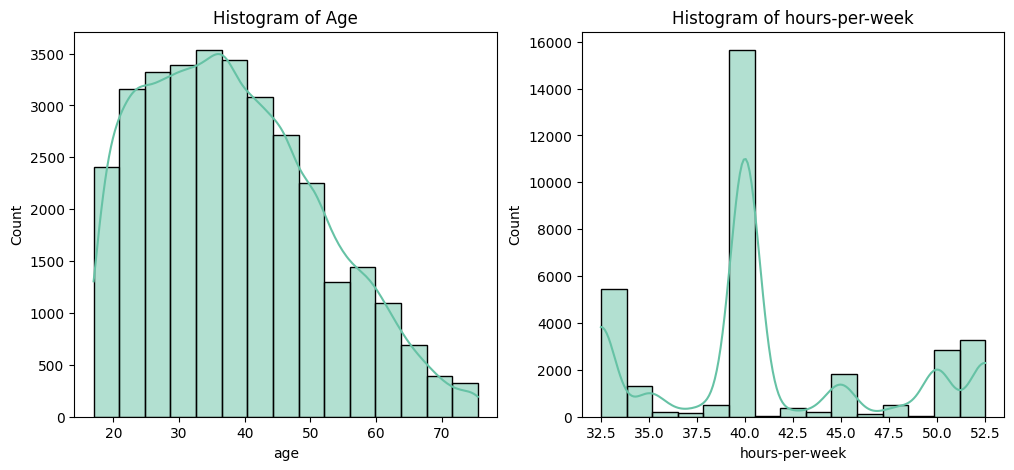

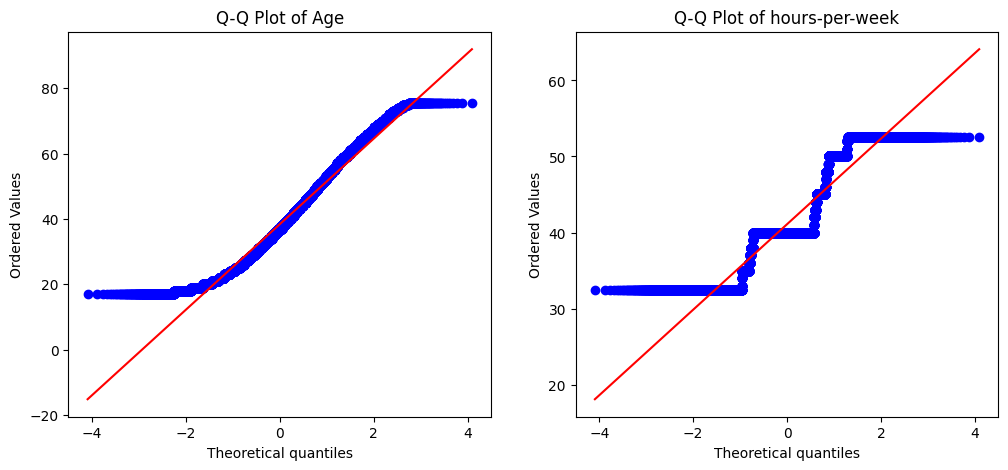

Shapiro-Wilk test for Age: p-value = 0.00000
Shapiro-Wilk test for hours-per-week: p-value = 0.00000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32536.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ histogram để xem hình dạng phân phối
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data['age'], bins=15, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')

sns.histplot(data['hours-per-week'], bins=15, kde=True, ax=axes[1])
axes[1].set_title('Histogram of hours-per-week')

plt.show()

# Q-Q Plot để kiểm tra tính chuẩn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(data['age'], dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot of Age")

stats.probplot(data['hours-per-week'], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of hours-per-week")

plt.show()

# Kiểm định Shapiro-Wilk cho tính chuẩn
shapiro_age = stats.shapiro(data['age'])
shapiro_hours_per_week = stats.shapiro(data['hours-per-week'])

print(f"Shapiro-Wilk test for Age: p-value = {shapiro_age.pvalue:.5f}")
print(f"Shapiro-Wilk test for hours-per-week: p-value = {shapiro_hours_per_week.pvalue:.5f}")

# Nếu p-value < 0.05, có thể giả định rằng dữ liệu không tuân theo phân phối chuẩn.

In [ ]:
# Chuẩn bị dữ liệu
age_data = data["age"]
hours_per_week_data = data["hours-per-week"]

# Kiểm tra phân phối Exponential (KS-Test)
ks_age_exp = stats.kstest(age_data, "expon", args=(age_data.min(), age_data.mean()))
ks_hours_per_week_data_exp = stats.kstest(hours_per_week_data, "expon", args=(hours_per_week_data.min(), hours_per_week_data.mean()))

print(f"Kolmogorov-Smirnov test for Exponential (Age): p-value = {ks_age_exp.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Exponential (hours-per-week): p-value = {ks_hours_per_week_data_exp.pvalue:.5f}")

# Kiểm tra phân phối Poisson (KS-Test)
lambda_age = np.mean(age_data)  # Poisson cần lambda là giá trị trung bình
lambda_hours_per_week = np.mean(hours_per_week_data)

ks_age_poisson = stats.kstest(age_data, "poisson", args=(lambda_age,))
ks_hours_per_week_poisson = stats.kstest(hours_per_week_data, "poisson", args=(lambda_hours_per_week,))

print(f"Kolmogorov-Smirnov test for Poisson (Age): p-value = {ks_age_poisson.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Poisson (hours-per-week): p-value = {ks_hours_per_week_poisson.pvalue:.5f}")

# Kiểm tra phân phối Exponential bằng Anderson-Darling test
ad_age_exp = stats.anderson(age_data, dist="expon")
ad_hours_per_week_exp = stats.anderson(hours_per_week_data, dist="expon")

print("\nAnderson-Darling test for Exponential distribution:")
print(f"Age: Statistic = {ad_age_exp.statistic:.5f}, Critical values = {ad_age_exp.critical_values}, Significance levels = {ad_age_exp.significance_level}")
print(f"hours-per-week: Statistic = {ad_hours_per_week_exp.statistic:.5f}, Critical values = {ad_hours_per_week_exp.critical_values}, Significance levels = {ad_hours_per_week_exp.significance_level}")

# Kiểm tra phân phối Poisson bằng Anderson-Darling test (Không có sẵn trong scipy, có thể kiểm tra bằng histogram)


Kolmogorov-Smirnov test for Exponential (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Exponential (hours-per-week): p-value = 0.00000
Kolmogorov-Smirnov test for Poisson (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Poisson (hours-per-week): p-value = 0.00000

Anderson-Darling test for Exponential distribution:
Age: Statistic = 6389.47425, Critical values = [0.922 1.078 1.341 1.606 1.957], Significance levels = [15.  10.   5.   2.5  1. ]
hours-per-week: Statistic = 11204.33989, Critical values = [0.922 1.078 1.341 1.606 1.957], Significance levels = [15.  10.   5.   2.5  1. ]


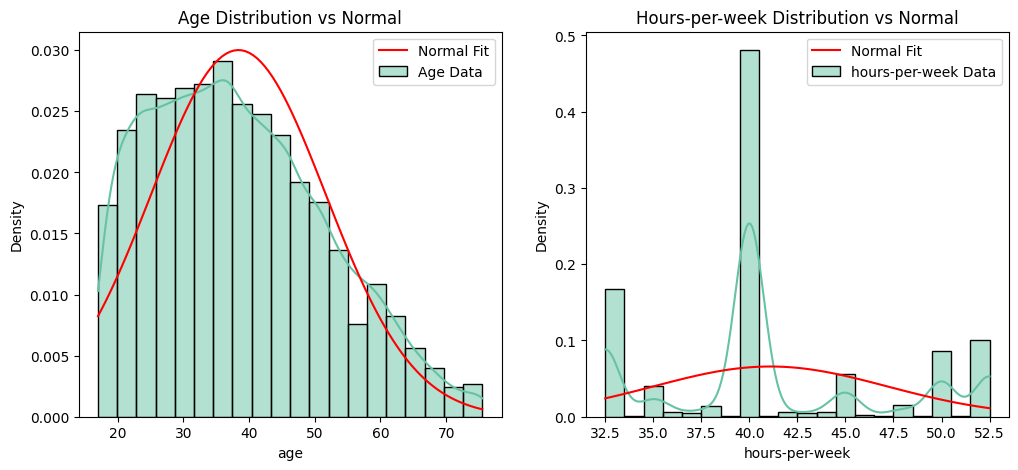

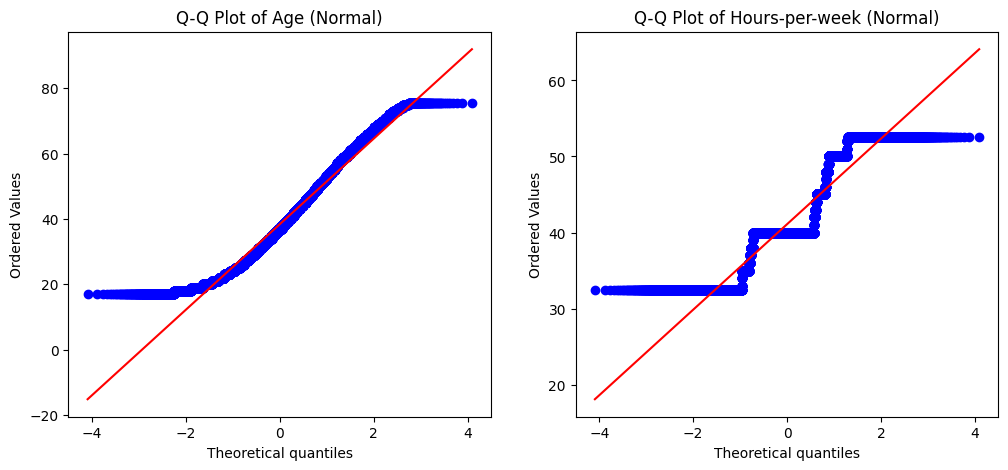

Shapiro-Wilk test for Age: p-value = 0.00000
Shapiro-Wilk test for Hours_per_week: p-value = 0.00000
Kolmogorov-Smirnov test for Normal (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Normal (Hours_per_week): p-value = 0.00000

Anderson-Darling test for Normal distribution:
Age: Statistic = 231.32263, Critical values = [0.576 0.656 0.787 0.918 1.092], Significance levels = [15.  10.   5.   2.5  1. ]
Hours_per_week: Statistic = 1974.88009, Critical values = [0.576 0.656 0.787 0.918 1.092], Significance levels = [15.  10.   5.   2.5  1. ]


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32536.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Chuẩn bị dữ liệu
age_data = data["age"]
hours_per_week_data = data["hours-per-week"]

# Vẽ Histogram và đường Normal Fit
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram của Age với đường Normal Fit
sns.histplot(age_data, bins=20, kde=True, stat="density", ax=axes[0], label="Age Data")
x_age = np.linspace(min(age_data), max(age_data), 100)
axes[0].plot(x_age, stats.norm.pdf(x_age, np.mean(age_data), np.std(age_data)), 'r-', label="Normal Fit")
axes[0].set_title("Age Distribution vs Normal")
axes[0].legend()

# Histogram của Cholesterol với đường Normal Fit
sns.histplot(hours_per_week_data, bins=20, kde=True, stat="density", ax=axes[1], label="hours-per-week Data")
x_hours_per_week = np.linspace(min(hours_per_week_data), max(hours_per_week_data), 100)
axes[1].plot(x_hours_per_week, stats.norm.pdf(x_hours_per_week, np.mean(hours_per_week_data), np.std(hours_per_week_data)), 'r-', label="Normal Fit")
axes[1].set_title("Hours-per-week Distribution vs Normal")
axes[1].legend()

plt.show()

# Q-Q Plot để kiểm tra tính chuẩn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(age_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot of Age (Normal)")

stats.probplot(hours_per_week_data, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Hours-per-week (Normal)")

plt.show()

# Kiểm định Shapiro-Wilk
shapiro_age = stats.shapiro(age_data)
shapiro_hours_per_week = stats.shapiro(hours_per_week_data)

print(f"Shapiro-Wilk test for Age: p-value = {shapiro_age.pvalue:.5f}")
print(f"Shapiro-Wilk test for Hours_per_week: p-value = {shapiro_hours_per_week.pvalue:.5f}")

# Kiểm định Kolmogorov-Smirnov
ks_age_norm = stats.kstest(age_data, "norm", args=(np.mean(age_data), np.std(age_data)))
ks_hours_per_week_norm = stats.kstest(hours_per_week_data, "norm", args=(np.mean(hours_per_week_data), np.std(hours_per_week_data)))

print(f"Kolmogorov-Smirnov test for Normal (Age): p-value = {ks_age_norm.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Normal (Hours_per_week): p-value = {ks_hours_per_week_norm.pvalue:.5f}")

# Kiểm định Anderson-Darling
ad_age_norm = stats.anderson(age_data, dist="norm")
ad_hours_per_week_norm = stats.anderson(hours_per_week_data, dist="norm")

print("\nAnderson-Darling test for Normal distribution:")
print(f"Age: Statistic = {ad_age_norm.statistic:.5f}, Critical values = {ad_age_norm.critical_values}, Significance levels = {ad_age_norm.significance_level}")
print(f"Hours_per_week: Statistic = {ad_hours_per_week_norm.statistic:.5f}, Critical values = {ad_hours_per_week_norm.critical_values}, Significance levels = {ad_hours_per_week_norm.significance_level}")


In [ ]:
# Chuẩn bị dữ liệu
age_data = data["age"]
hours_per_week_data = data["hours-per-week"]

# Kiểm tra phân phối Gamma (chỉ dùng KS-Test) ###
shape_age, loc_age, scale_age = stats.gamma.fit(age_data)
shape_hours_per_week, loc_hours_per_week, scale_hours_per_week = stats.gamma.fit(hours_per_week_data)

ks_age_gamma = stats.kstest(age_data, "gamma", args=(shape_age, loc_age, scale_age))
ks_hours_per_week_gamma = stats.kstest(hours_per_week_data, "gamma", args=(shape_hours_per_week, loc_hours_per_week, scale_hours_per_week))

print(f"Kolmogorov-Smirnov test for Gamma (Age): p-value = {ks_age_gamma.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Gamma (hours_per_week): p-value = {ks_hours_per_week_gamma.pvalue:.5f}")

# Kiểm tra phân phối Log-Normal ###
shape_age_ln, loc_age_ln, scale_age_ln = stats.lognorm.fit(age_data)
shape_hours_per_week_ln, loc_hours_per_week_ln, scale_hours_per_week_ln = stats.lognorm.fit(hours_per_week_data)

ks_age_lognorm = stats.kstest(age_data, "lognorm", args=(shape_age_ln, loc_age_ln, scale_age_ln))
ks_hours_per_week_lognorm = stats.kstest(hours_per_week_data, "lognorm", args=(shape_hours_per_week_ln, loc_hours_per_week_ln, scale_hours_per_week_ln))

ad_age_lognorm = stats.anderson(age_data, dist="logistic")
ad_hours_per_week_lognorm = stats.anderson(hours_per_week_data, dist="logistic")

print(f"\nKolmogorov-Smirnov test for Log-Normal (Age): p-value = {ks_age_lognorm.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Log-Normal (hours_per_week): p-value = {ks_hours_per_week_lognorm.pvalue:.5f}")
print(f"Anderson-Darling test for Logistic (Age): Statistic = {ad_age_lognorm.statistic:.5f}")
print(f"Anderson-Darling test for Logistic (hours_per_week): Statistic = {ad_hours_per_week_lognorm.statistic:.5f}")

# Kiểm tra phân phối Weibull ###
shape_age_wb, loc_age_wb, scale_age_wb = stats.weibull_min.fit(age_data)
shape_hours_per_week_wb, loc_hours_per_week_wb, scale_hours_per_week_wb = stats.weibull_min.fit(hours_per_week_data)

ks_age_weibull = stats.kstest(age_data, "weibull_min", args=(shape_age_wb, loc_age_wb, scale_age_wb))
ks_hours_per_week_weibull = stats.kstest(hours_per_week_data, "weibull_min", args=(shape_age_wb, loc_hours_per_week_wb, scale_hours_per_week_wb))

ad_age_weibull = stats.anderson(age_data, dist="weibull_min")
ad_hours_per_week_weibull = stats.anderson(hours_per_week_data, dist="weibull_min")

print(f"\nKolmogorov-Smirnov test for Weibull (Age): p-value = {ks_age_weibull.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Weibull (hours_per_week): p-value = {ks_hours_per_week_weibull.pvalue:.5f}")
print(f"Anderson-Darling test for Weibull (Age): Statistic = {ad_age_weibull.statistic:.5f}")
print(f"Anderson-Darling test for Weibull (hours_per_week): Statistic = {ad_hours_per_week_weibull.statistic:.5f}")


Kolmogorov-Smirnov test for Gamma (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Gamma (hours_per_week): p-value = 0.00000

Kolmogorov-Smirnov test for Log-Normal (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Log-Normal (hours_per_week): p-value = 0.00000
Anderson-Darling test for Logistic (Age): Statistic = 235.54298
Anderson-Darling test for Logistic (hours_per_week): Statistic = 1917.99891

Kolmogorov-Smirnov test for Weibull (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Weibull (hours_per_week): p-value = 0.00000
Anderson-Darling test for Weibull (Age): Statistic = 84.80753
Anderson-Darling test for Weibull (hours_per_week): Statistic = 2085.92430


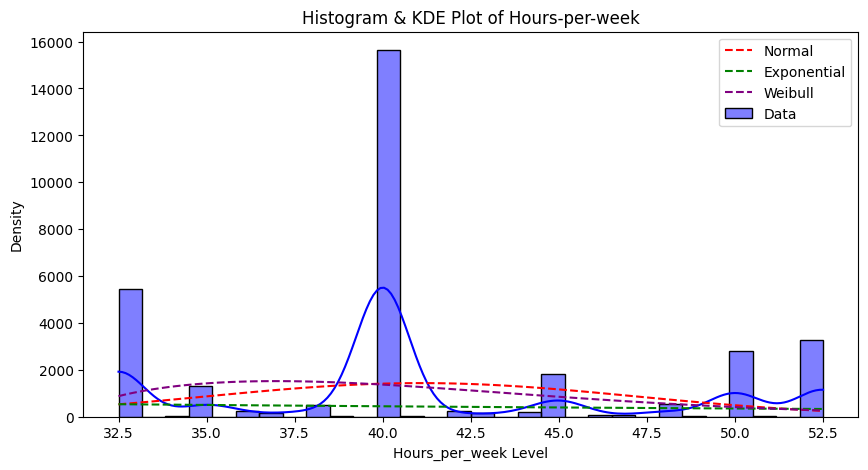

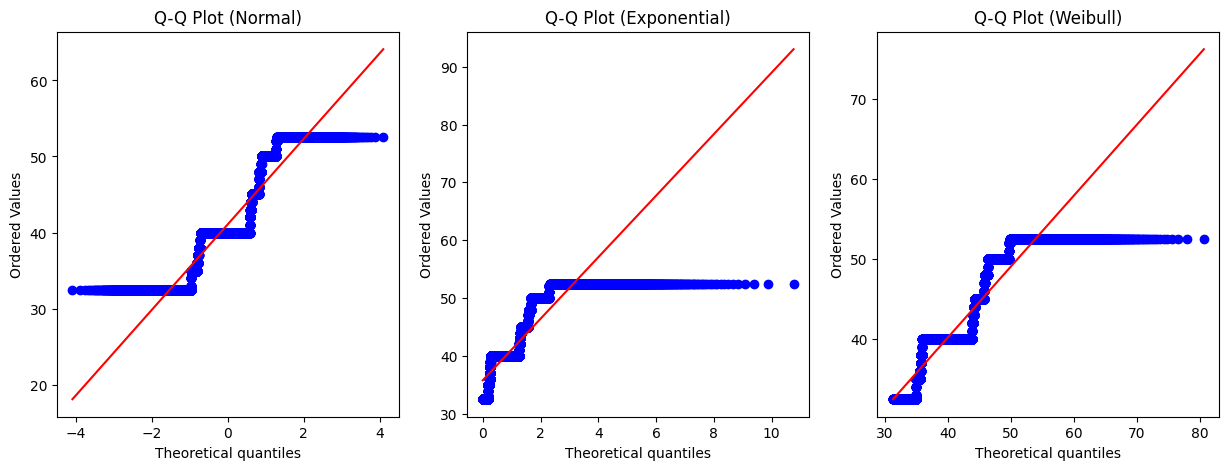

In [ ]:
# Dữ liệu hours-per-week
hours_per_week_data = data["hours-per-week"]

# Vẽ Histogram + KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(hours_per_week_data, bins=30, kde=True, color="blue", label="Data")
x = np.linspace(hours_per_week_data.min(), hours_per_week_data.max(), 100)

# Thêm đường phân phối chuẩn
mu, sigma = np.mean(hours_per_week_data), np.std(hours_per_week_data)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * len(hours_per_week_data) * (hours_per_week_data.max() - hours_per_week_data.min()) / 30,
         color='red', linestyle="--", label="Normal")

# Thêm đường phân phối Exponential
lambda_exp = 1 / np.mean(hours_per_week_data)
plt.plot(x, stats.expon.pdf(x, hours_per_week_data.min(), 1/lambda_exp) * len(hours_per_week_data) * (hours_per_week_data.max() - hours_per_week_data.min()) / 30,
         color='green', linestyle="--", label="Exponential")

# Thêm đường phân phối Weibull
shape, loc, scale = stats.weibull_min.fit(hours_per_week_data)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale) * len(hours_per_week_data) * (hours_per_week_data.max() - hours_per_week_data.min()) / 30,
         color='purple', linestyle="--", label="Weibull")

plt.title("Histogram & KDE Plot of Hours-per-week")
plt.xlabel("Hours_per_week Level")
plt.ylabel("Density")
plt.legend()
plt.show()

# Vẽ Q-Q Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Q-Q Plot với Normal Distribution
stats.probplot(hours_per_week_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot (Normal)")

# Q-Q Plot với Exponential Distribution
stats.probplot(hours_per_week_data, dist="expon", plot=axes[1])
axes[1].set_title("Q-Q Plot (Exponential)")

# Q-Q Plot với Weibull Distribution
stats.probplot(hours_per_week_data, dist=stats.weibull_min(shape, loc, scale), plot=axes[2])
axes[2].set_title("Q-Q Plot (Weibull)")

plt.show()


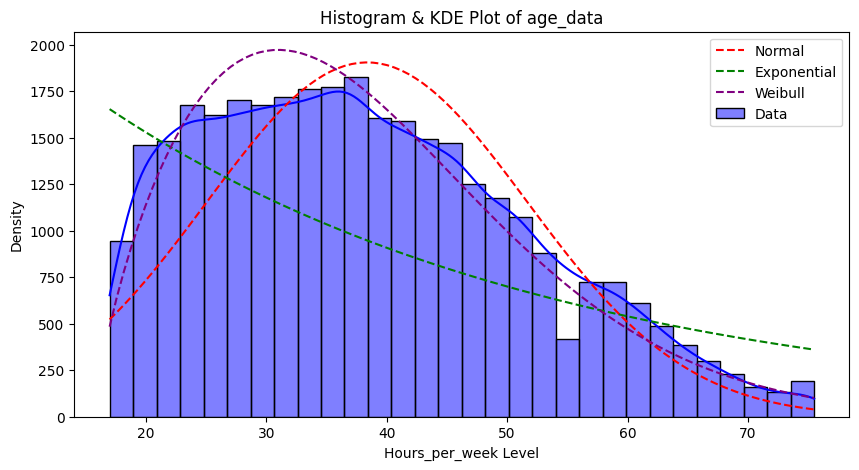

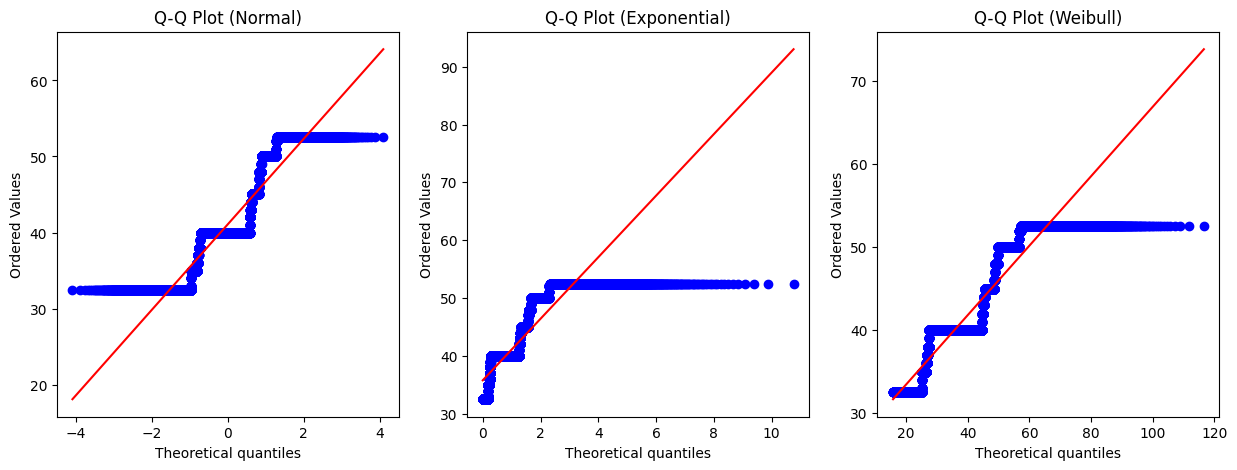

In [ ]:
# Dữ liệu age
age_data = data["age"]

# Vẽ Histogram + KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(age_data, bins=30, kde=True, color="blue", label="Data")
x = np.linspace(age_data.min(), age_data.max(), 100)

# Thêm đường phân phối chuẩn
mu, sigma = np.mean(age_data), np.std(age_data)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * len(age_data) * (age_data.max() - age_data.min()) / 30,
         color='red', linestyle="--", label="Normal")

# Thêm đường phân phối Exponential
lambda_exp = 1 / np.mean(age_data)
plt.plot(x, stats.expon.pdf(x, age_data.min(), 1/lambda_exp) * len(age_data) * (age_data.max() - age_data.min()) / 30,
         color='green', linestyle="--", label="Exponential")

# Thêm đường phân phối Weibull
shape, loc, scale = stats.weibull_min.fit(age_data)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale) * len(age_data) * (age_data.max() - age_data.min()) / 30,
         color='purple', linestyle="--", label="Weibull")

plt.title("Histogram & KDE Plot of age_data")
plt.xlabel("Hours_per_week Level")
plt.ylabel("Density")
plt.legend()
plt.show()

# Vẽ Q-Q Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Q-Q Plot với Normal Distribution
stats.probplot(hours_per_week_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot (Normal)")

# Q-Q Plot với Exponential Distribution
stats.probplot(hours_per_week_data, dist="expon", plot=axes[1])
axes[1].set_title("Q-Q Plot (Exponential)")

# Q-Q Plot với Weibull Distribution
stats.probplot(hours_per_week_data, dist=stats.weibull_min(shape, loc, scale), plot=axes[2])
axes[2].set_title("Q-Q Plot (Weibull)")

plt.show()


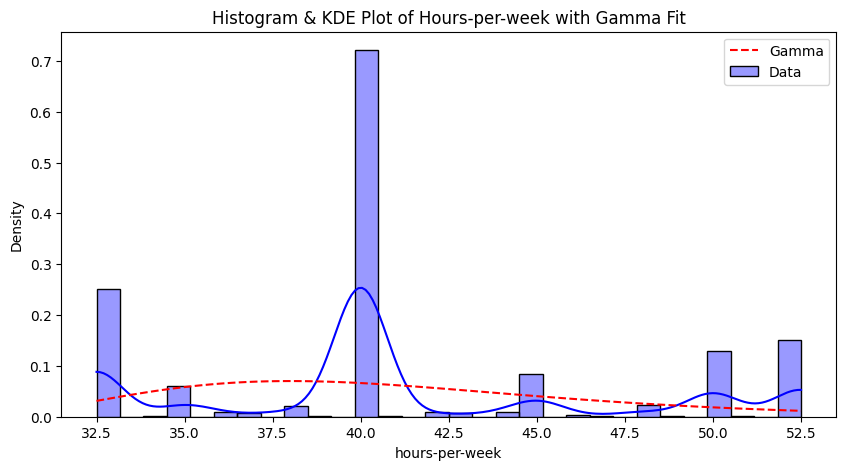

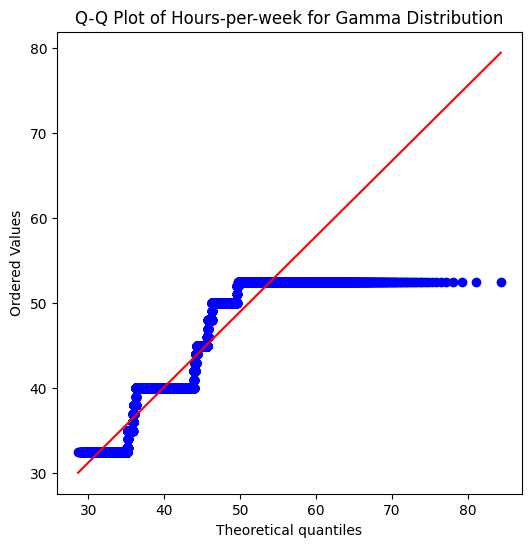

Kolmogorov-Smirnov test for Gamma: p-value = 0.00000


In [ ]:
# Dữ liệu hours-per-week
hours_per_week_data = data["hours-per-week"]

# Fit phân phối Gamma
shape, loc, scale = stats.gamma.fit(hours_per_week_data)

# Vẽ Histogram & KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(hours_per_week_data, bins=30, kde=True, stat="density", color="blue", alpha=0.4, label="Data")

# Vẽ đường phân phối Gamma
x = np.linspace(min(hours_per_week_data), max(hours_per_week_data), 100)
plt.plot(x, stats.gamma.pdf(x, shape, loc, scale), "r--", label="Gamma")

plt.title("Histogram & KDE Plot of Hours-per-week with Gamma Fit")
plt.legend()
plt.show()

# Vẽ Q-Q Plot cho Gamma
plt.figure(figsize=(6, 6))
stats.probplot(hours_per_week_data, dist=stats.gamma, sparams=(shape, loc, scale), plot=plt)
plt.title("Q-Q Plot of Hours-per-week for Gamma Distribution")
plt.show()

# Kiểm tra Kolmogorov-Smirnov Test
ks_test = stats.kstest(hours_per_week_data, "gamma", args=(shape, loc, scale))
print(f"Kolmogorov-Smirnov test for Gamma: p-value = {ks_test.pvalue:.5f}")


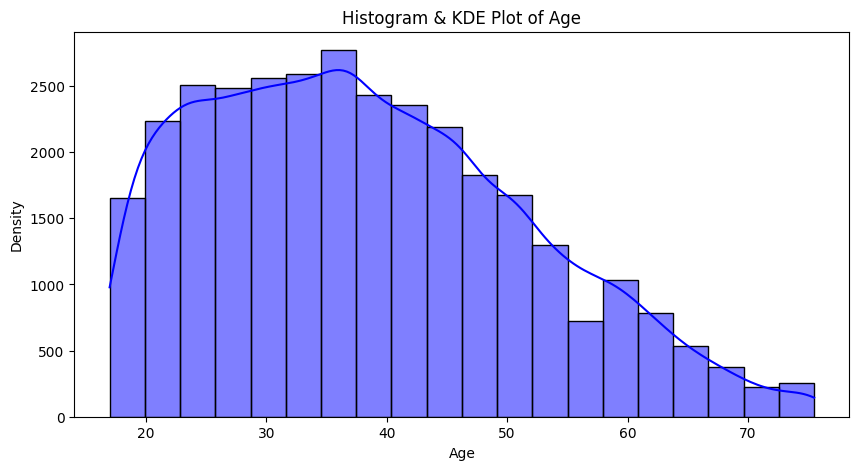

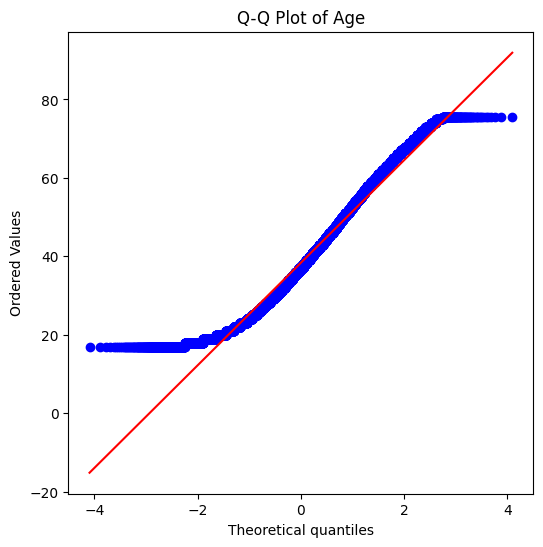

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32536.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for Normal: p-value = 0.00000
Kolmogorov-Smirnov test for Normal: p-value = 0.00000
Anderson-Darling test for Normal: Statistic = 231.32263
Critical values = [0.576 0.656 0.787 0.918 1.092]
Significance levels = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for Poisson: p-value = 0.00000
Kolmogorov-Smirnov test for Exponential: p-value = 0.00000


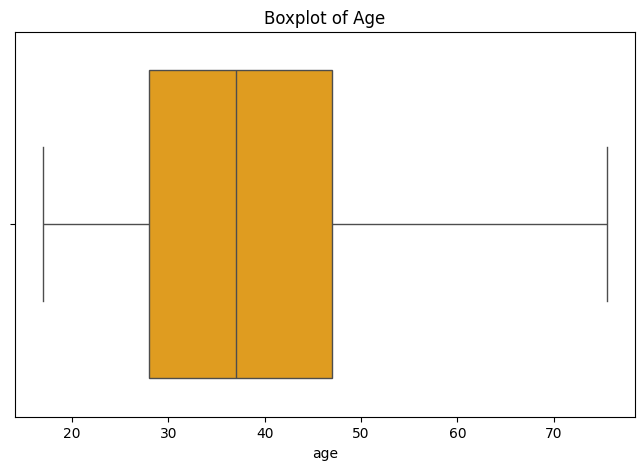

In [ ]:
# Giả sử dữ liệu đã được tải vào DataFrame
# df = pd.read_csv("heart.csv")  # Nếu bạn có file dữ liệu
age_data = data["age"]

# Vẽ Histogram & KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(age_data, bins=20, kde=True, color="blue", alpha=0.5)
plt.title("Histogram & KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# Vẽ Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(age_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Age")
plt.show()

# Kiểm tra phân phối
# Shapiro-Wilk Test (Kiểm tra phân phối chuẩn)
shapiro_test = stats.shapiro(age_data)
print(f"Shapiro-Wilk test for Normal: p-value = {shapiro_test.pvalue:.5f}")

# Kolmogorov-Smirnov Test (So sánh với phân phối chuẩn)
ks_test = stats.kstest(age_data, "norm", args=(np.mean(age_data), np.std(age_data)))
print(f"Kolmogorov-Smirnov test for Normal: p-value = {ks_test.pvalue:.5f}")

# Anderson-Darling Test (Phân phối chuẩn)
ad_test = stats.anderson(age_data, dist="norm")
print(f"Anderson-Darling test for Normal: Statistic = {ad_test.statistic:.5f}")
print(f"Critical values = {ad_test.critical_values}")
print(f"Significance levels = {ad_test.significance_level}")

# Thử phân phối khác (Poisson, Exponential)
lambda_age = np.mean(age_data)  # Lambda cho Poisson

ks_test_poisson = stats.kstest(age_data, "poisson", args=(lambda_age,))
print(f"Kolmogorov-Smirnov test for Poisson: p-value = {ks_test_poisson.pvalue:.5f}")

ks_test_exp = stats.kstest(age_data, "expon", args=(age_data.min(), np.mean(age_data)))
print(f"Kolmogorov-Smirnov test for Exponential: p-value = {ks_test_exp.pvalue:.5f}")

# Vẽ Boxplot để kiểm tra Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=age_data, color="orange")
plt.title("Boxplot of Age")
plt.show()


In [ ]:
count1 = 0
count2 = 0
for i in data["income"]:
  if i == 1:
    count1 += 1
  else:
    count2 += 1
print(count1)
print(count2)
print((count2/count1)*100)

24697
7839
31.740697250678217


### Đưa ra nhận xét về đặc điểm của dữ liệu dựa trên phân phối

#### Nhận xét về phân phối của biến 'age':

**Kiểm định tính chuẩn:**

- **Shapiro-Wilk test** cho thấy p-value rất nhỏ (≈ 0.00000), điều này có nghĩa là dữ liệu không tuân theo phân phối chuẩn.
- **Kolmogorov-Smirnov test** so với phân phối chuẩn cũng cho p-value ≈ 0.00000, một lần nữa xác nhận rằng biến 'age' không tuân theo phân phối chuẩn.
- **Anderson-Darling test** cho biến 'age' có giá trị thống kê ≈ 231.32, lớn hơn nhiều so với giá trị tới hạn (ví dụ, ở mức 5% là 0.787), điều này cũng bác bỏ giả thuyết phân phối chuẩn.

**Quan sát biểu đồ:**

- **Histogram (+KDE)**: Biểu đồ phân phối của tuổi có hình dạng gần như chuông, đối xứng nhưng có xu hướng dẹt ở phần đuôi phải. Đỉnh phân phối tập trung ở khoảng từ 30 đến 40 tuổi.
- **Q-Q Plot (so với Normal)**: Các điểm bám khá sát đường thẳng màu đỏ ở phần giữa phân phối, nhưng ở hai đuôi (đặc biệt là đuôi phải), các điểm lệch khỏi đường chuẩn, chứng tỏ phân phối 'age' có sự lệch nhẹ ở đuôi.

**So sánh với phân phối khác:**

- **Kolmogorov-Smirnov test** cho thấy phân phối 'age' không phù hợp với các phân phối khác như Exponential, Poisson, Log-Normal, và Gamma, với p-value đều nhỏ hơn 0.05, cho thấy không có phân phối nào có thể mô tả dữ liệu 'age' một cách hoàn hảo.

**Kết luận**: Dữ liệu 'age' không tuân theo phân phối chuẩn, mặc dù có hình dạng gần chuông. Các kiểm định thống kê bác bỏ giả thuyết phân phối chuẩn và Q-Q plot cho thấy sự sai khác ở hai đuôi.

#### **Nhận xét về phân phối của biến 'hours-per-week':**



**Kiểm định tính chuẩn:**

- **Shapiro-Wilk test** cho p-value ≈ 0.00000, điều này cũng chỉ ra rằng dữ liệu không tuân theo phân phối chuẩn.
- **Kolmogorov-Smirnov test** so với phân phối chuẩn có p-value ≈ 0.00000, xác nhận rằng phân phối 'hours-per-week' không phải là phân phối chuẩn.
- **Anderson-Darling test** cho giá trị thống kê ≈ 1974.88, vượt quá giá trị tới hạn (0.787 ở mức 5%), cho thấy giả thuyết phân phối chuẩn bị bác bỏ.

**Quan sát biểu đồ:**

- **Histogram (+KDE)**: Phân phối của 'hours-per-week' có đỉnh rõ rệt ở khoảng 40 giờ, với một số lượng nhỏ ở các giá trị thấp hơn và cao hơn. Đường KDE cho thấy một đỉnh rất mạnh ở mức 40 giờ, nhưng không có sự phân phối đều.
- **Q-Q Plot (so với Normal)**: Các điểm trên Q-Q plot lệch xa khỏi đường chuẩn, đặc biệt là ở hai đuôi, cho thấy rõ ràng phân phối của 'hours-per-week' có sự lệch về phía các giá trị thấp và cao.

**So sánh với phân phối khác:**

- **Kolmogorov-Smirnov test** cho thấy phân phối 'hours-per-week' cũng không phù hợp với các phân phối khác như Exponential, Poisson, và Log-Normal, với p-value đều rất nhỏ.
- **Q-Q plot** so với Gamma cho thấy phân phối Gamma mô tả khá tốt phần thân của dữ liệu, nhưng đuôi bên phải vẫn không hoàn hảo.

**Kết luận**: Dữ liệu 'hours-per-week' có phân phối lệch phải và không tuân theo phân phối chuẩn. Các kiểm định cho thấy các phân phối như Exponential hay Poisson không phù hợp với dữ liệu này. Phân phối Gamma có thể là một sự lựa chọn phù hợp hơn cho phần thân của dữ liệu.

#### Nhận xét về phân phối của các biến 'age' và 'hours-per-week':



**Biến 'age':**
Mặc dù có hình dạng gần như phân phối chuẩn, biến 'age' không tuân theo phân phối chuẩn, với các đuôi lệch. Kiểm định thống kê và phân tích Q-Q plot đều cho thấy sự sai khác. Điều này có thể ảnh hưởng đến kết quả của các mô hình thống kê sử dụng giả thuyết phân phối chuẩn. Cần sử dụng các kiểm định phi tham số hoặc biến đổi dữ liệu để cải thiện tính hợp lệ của các mô hình.

**Biến 'hours-per-week':**
Dữ liệu 'hours-per-week' có phân phối lệch phải với đỉnh ở mức 40 giờ. Các kiểm định thống kê không phù hợp với phân phối chuẩn, và phân phối Gamma có thể là lựa chọn tốt cho phần thân của dữ liệu. Đối với các mô hình sử dụng biến này, việc áp dụng phương pháp phân phối Gamma hoặc phương pháp phi tham số sẽ là hợp lý hơn.

**Kết luận chung:**
Các biến 'age' và 'hours-per-week' không tuân theo phân phối chuẩn, điều này cần phải được xem xét khi thực hiện các phân tích thống kê và mô hình hóa. Các kiểm định phi tham số và các phương pháp mạnh mẽ sẽ cung cấp kết quả chính xác hơn khi làm việc với dữ liệu này.


# 4) Kiểm định giả thuyết

## a. Tìm hiểu và trình bày các kiểm định thống kê: t-test, Chi-square và ANOVA

### t-test

#### Giới thiệu chung

- **T-test là gì?** T-test là một loại kiểm định giả thuyết thống kê suy luận (inferential statistics). Nó được sử dụng để xác định xem liệu có sự khác biệt có ý nghĩa thống kê giữa giá trị trung bình (mean) của hai nhóm hay không, hoặc giữa giá trị trung bình của một nhóm so với một giá trị đã biết (giá trị giả thuyết).

- **Nguồn gốc**: Được phát triển bởi William Sealy Gosset dưới bút danh "Student", nên đôi khi còn được gọi là "Student's t-test".

- **Mục đích chính**: là so sánh giá trị trung bình.

- **Khi nào dùng?** T-test đặc biệt hữu ích khi:

  - Kích thước mẫu nhỏ (thường dưới 30).

  - Độ lệch chuẩn của tổng thể (population standard deviation) không xác định (đây là trường hợp phổ biến trong thực tế). T-test sử dụng độ lệch chuẩn mẫu (sample standard deviation) để ước lượng.

- **Dựa trên phân phối nào?** T-test dựa trên phân phối t (t-distribution), một phân phối xác suất tương tự như phân phối chuẩn nhưng có "đuôi dày hơn", nghĩa là nó có nhiều xác suất hơn ở các giá trị cực trị, đặc biệt là với cỡ mẫu nhỏ. Hình dạng của phân phối t phụ thuộc vào "bậc tự do" (degrees of freedom - df), thường liên quan đến kích thước mẫu. Khi bậc tự do tăng lên (cỡ mẫu lớn hơn), phân phối t tiệm cận với phân phối chuẩn.

#### Các giả định của t-test

Để kết quả của t-test đáng tin cậy, dữ liệu của bạn cần đáp ứng một số giả định:

  1. **Dữ liệu đo lường**: Biến phụ thuộc (biến bạn đang đo lường/so sánh) phải là biến liên tục (định lượng), ví dụ: chiều cao, cân nặng, điểm số, nhiệt độ.

  2. **Mẫu ngẫu nhiên**: Dữ liệu được thu thập từ một mẫu đại diện, được chọn ngẫu nhiên từ tổng thể mà bạn muốn suy luận.

  3. **Tính chuẩn (Normality)**: Dữ liệu trong mỗi nhóm (hoặc sự khác biệt giữa các cặp trong paired t-test) nên tuân theo phân phối xấp xỉ chuẩn. Tuy nhiên, t-test khá "mạnh" (robust) đối với vi phạm giả định này khi cỡ mẫu đủ lớn (ví dụ: n > 30 cho mỗi nhóm) nhờ vào Định lý Giới hạn Trung tâm (Central Limit Theorem). Bạn có thể kiểm tra tính chuẩn bằng biểu đồ (Q-Q plot, histogram) hoặc các kiểm định thống kê (Shapiro-Wilk, Kolmogorov-Smirnov).

  4. **Phương sai đồng nhất (Homogeneity of variances)**: (Chỉ áp dụng cho t-test hai mẫu độc lập). Giả định rằng phương sai (variance) của biến phụ thuộc là bằng nhau giữa hai nhóm được so sánh. Có thể kiểm tra bằng kiểm định Levene. Nếu giả định này bị vi phạm, bạn nên sử dụng một phiên bản của t-test không yêu cầu giả định này (ví dụ: Welch's t-test).

#### Các loại t-test phổ biến

Có ba loại t-test chính:

- **a) T-test một mẫu (One-Sample T-test):**

  - **Mục đích**: So sánh giá trị trung bình của một mẫu duy nhất với một giá trị cụ thể, đã biết trước (thường là giá trị trung bình của tổng thể theo lý thuyết hoặc một tiêu chuẩn).

  - **Câu hỏi ví dụ**: Chiều cao trung bình của học sinh lớp 10 ở trường A có khác biệt đáng kể so với chiều cao trung bình chuẩn quốc gia là 165cm không?

  - **Giả thuyết**:

    - H0 (Null Hypothesis): Trung bình mẫu = Giá trị đã biết (μ = μ₀).

    - H1 (Alternative Hypothesis): Trung bình mẫu ≠ Giá trị đã biết (μ ≠ μ₀) (kiểm định 2 phía), hoặc μ > μ₀, hoặc μ < μ₀ (kiểm định 1 phía).
  
  - **Công thức:** $\Large t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

    - Dùng để so sánh trung bình mẫu $\bar{x}$ với một giá trị trung bình giả thuyết $\mu_0$.

    - Trong đó:

      - $\bar{x}$: là trung bình mẫu.

      - $\mu_0$: là giá trị cần so sánh.

      - s: là độ lệch chuẩn mẫu.

      - n: kích thước mẫu.

- **b) T-test hai mẫu độc lập (Independent Samples T-test / Unpaired T-test):**

  - **Mục đích**: So sánh giá trị trung bình của hai nhóm hoàn toàn độc lập, không liên quan đến nhau. Các đối tượng trong nhóm này không có mặt trong nhóm kia.

  - **Câu hỏi ví dụ**: Điểm thi môn thống kê trung bình của nhóm sinh viên nam có khác biệt so với nhóm sinh viên nữ không? Hoặc, hiệu quả giảm huyết áp trung bình của nhóm dùng thuốc A có khác biệt so với nhóm dùng giả dược (placebo) không?

  - **Giả thuyết:**

    - H0: Trung bình nhóm 1 = Trung bình nhóm 2 (μ₁ = μ₂).

    - H1: Trung bình nhóm 1 ≠ Trung bình nhóm 2 (μ₁ ≠ μ₂) (2 phía), hoặc μ₁ > μ₂, hoặc μ₁ < μ₂ (1 phía).

  - Công thức: $\Large t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$

    - Dùng để so sánh trung bình của hai nhóm độc lập ($\bar{x}_1$ và $\bar{x}_2$).

    - Trong đó:

      - $\bar{x}_1$ và $\bar{x}_2$: là trung bình mẫu 1 và 2.

      - $n_1$ và $n_2$: là kích thước mẫu 1 và 2.

      - $s_p$: là độ lệch chuẩn gộp (pooled standard deviation), được tính dựa trên độ lệch chuẩn của từng mẫu ($s_1$ và $s_2$).

- **c) T-test hai mẫu cặp/phụ thuộc (Paired Samples T-test / Dependent T-test)**:

  - **Mục đích**: So sánh giá trị trung bình của cùng một nhóm đối tượng tại hai thời điểm khác nhau (ví dụ: trước và sau can thiệp), hoặc trong hai điều kiện khác nhau, hoặc hai nhóm đối tượng có sự tương ứng tự nhiên (ví dụ: cặp song sinh, vợ chồng). Thực chất, kiểm định này xem xét sự khác biệt trung bình trong từng cặp.

  - **Câu hỏi ví dụ**: Huyết áp trung bình của cùng một nhóm bệnh nhân trước khi dùng thuốc có khác biệt so với sau khi dùng thuốc không? Hoặc, điểm kiểm tra giữa kỳ có khác biệt so với điểm cuối kỳ của cùng một lớp học sinh không?

  - **Giả thuyết:**

    - H0: Trung bình của sự khác biệt giữa các cặp = 0 (μ_diff = 0).

    - H1: Trung bình của sự khác biệt giữa các cặp ≠ 0 (μ_diff ≠ 0) (2 phía), hoặc μ_diff > 0, hoặc μ_diff < 0 (1 phía).

- Công thức: $\Large t = \frac{\bar{d}}{s_d / \sqrt{n}}$

  - Dùng để so sánh trung bình của cùng một nhóm tại hai thời điểm/điều kiện khác nhau, dựa trên sự khác biệt $\bar{d}$ của từng cặp.

  - Trong đó:

    - $\bar{d}$: là trung bình của sự khác biệt giữa các cặp quan sát.

    - $s_d$: là độ lệch chuẩn của các khác biệt đó.

    - n: là số lượng cặp.

#### Cách thức hoạt động (Sơ lược)

1. **Phát biểu giả thuyết**: Xác định giả thuyết không (H0 - không có sự khác biệt) và giả thuyết đối (H1 - có sự khác biệt).

2. **Chọn mức ý nghĩa (Alpha - α)**: Thường là 0.05 (5%), đây là ngưỡng xác suất sai lầm loại I (bác bỏ H0 khi H0 đúng) mà bạn chấp nhận.

3. **Tính toán giá trị t (t-statistic)**: Công thức tính t-statistic khác nhau tùy loại t-test, nhưng về cơ bản nó đo lường "tín hiệu" (sự khác biệt giữa các trung bình) so với "nhiễu" (độ biến thiên trong dữ liệu / sai số chuẩn của sự khác biệt).

  - Công thức chung có dạng:
  
  t = (Tín hiệu) / (Nhiễu) = (Sự khác biệt giữa các trung bình) / (Sai số chuẩn của sự khác biệt)

4. **Xác định bậc tự do (Degrees of Freedom - df)**: Liên quan đến cỡ mẫu (ví dụ: df = n-1 cho t-test một mẫu, df = n1 + n2 - 2 cho t-test độc lập với phương sai bằng nhau, df = n-1 cho t-test cặp với n là số cặp).

5. **Tìm giá trị p (p-value)**: Dựa trên giá trị t đã tính và bậc tự do, tìm giá trị p tương ứng từ phân phối t. Giá trị p là xác suất quan sát được kết quả như trong mẫu của bạn (hoặc kết quả còn cực đoan hơn) nếu giả thuyết không (H0) là đúng.

6. **Đưa ra quyết định:**

  - Nếu p-value < α: Bác bỏ giả thuyết H0. Có đủ bằng chứng thống kê để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa các giá trị trung bình.

  - Nếu p-value ≥ α: Không đủ bằng chứng để bác bỏ giả thuyết H0. Không thể kết luận có sự khác biệt có ý nghĩa thống kê (lưu ý: điều này không có nghĩa là H0 chắc chắn đúng, chỉ là không đủ bằng chứng để bác bỏ nó).

#### Diễn giải kết quả

- **Giá trị p (p-value)**: Cho biết mức độ ý nghĩa thống kê. p nhỏ (< α) nghĩa là sự khác biệt quan sát được khó có thể xảy ra do ngẫu nhiên nếu không có sự khác biệt thực sự.

- **Giá trị t (t-statistic):**

  - Dấu của t (+ hoặc -) cho biết hướng của sự khác biệt (ví dụ: nhóm nào có trung bình cao hơn).

  - Độ lớn của t (giá trị tuyệt đối |t|) cho biết mức độ khác biệt so với độ biến thiên. Giá trị |t| càng lớn, bằng chứng chống lại H0 càng mạnh.

- **Khoảng tin cậy (Confidence Interval - CI)**: Thường được báo cáo cùng t-test. Ví dụ, khoảng tin cậy 95% cho sự khác biệt trung bình. Nếu khoảng tin cậy này không chứa 0, nó tương đương với việc bác bỏ H0 ở mức α = 0.05 (đối với kiểm định 2 phía). Nó cũng cho biết phạm vi ước lượng về độ lớn thực sự của sự khác biệt.

#### Ví dụ minh họa (T-test hai mẫu độc lập)

Giả sử bạn muốn so sánh hiệu quả của hai phương pháp dạy học (A và B) dựa trên điểm thi cuối kỳ của sinh viên. Bạn chọn ngẫu nhiên 2 nhóm sinh viên, một nhóm học theo phương pháp A (n=25), nhóm kia theo phương pháp B (n=25). Sau kỳ thi, bạn thu được điểm trung bình và độ lệch chuẩn của hai nhóm.

- **H0**: Điểm trung bình của nhóm A bằng điểm trung bình của nhóm B (μ_A = μ_B).

- **H1**: Điểm trung bình của nhóm A khác điểm trung bình của nhóm B (μ_A ≠ μ_B).

- Bạn thực hiện t-test hai mẫu độc lập và thu được kết quả: t = 2.5, df = 48, p = 0.016.

- **Diễn giải**: Vì p = 0.016 < α = 0.05, bạn bác bỏ H0. Kết luận: Có sự khác biệt có ý nghĩa thống kê về điểm thi trung bình giữa sinh viên học theo phương pháp A và phương pháp B. Dấu dương của t (nếu có) có thể cho biết phương pháp nào có điểm trung bình cao hơn.


#### Tổng kết

- T-test là một công cụ mạnh mẽ và linh hoạt trong phân tích thống kê, giúp đưa ra các kết luận dựa trên dữ liệu mẫu về sự khác biệt giữa các nhóm

- Ý nghĩa thống kê (statistical significance) không đồng nghĩa với ý nghĩa thực tiễn (practical significance). Một khác biệt nhỏ có thể có ý nghĩa thống kê nếu cỡ mẫu rất lớn, nhưng lại không quan trọng trong thực tế. Cần xem xét thêm kích thước hiệu ứng (effect size).

### Chi-square

#### Giới thiệu chung

- **Chi-Square Test là gì?** Đây là một nhóm các kiểm định giả thuyết thống kê phi tham số (non-parametric tests). Mục đích chính của nó là kiểm tra xem có sự khác biệt có ý nghĩa thống kê giữa tần số quan sát được (observed frequencies) trong các danh mục của một hoặc nhiều biến phân loại và tần số kỳ vọng (expected frequencies) dựa trên một giả thuyết cụ thể (giả thuyết không H0).

- **Mục đích chính**: So sánh tần số quan sát với tần số kỳ vọng cho dữ liệu phân loại. Nó giúp xác định xem một mô hình phân phối tần số nào đó có phù hợp với dữ liệu mẫu không (Goodness-of-Fit) hoặc liệu có mối liên hệ (association/independence) giữa hai biến phân loại hay không.

- **Khi nào dùng?** Khi làm việc với dữ liệu dạng đếm (counts) hoặc tần số (frequencies) thuộc các danh mục khác nhau. Ví dụ: số lượng người chọn các phương án trả lời khác nhau, số lượng sản phẩm lỗi/không lỗi, phân loại khách hàng theo nhóm tuổi và sở thích sản phẩm.

- **Dựa trên phân phối nào?** Kiểm định này dựa trên phân phối Chi-bình phương (χ² distribution). Đây là một phân phối xác suất liên tục, lệch về bên phải (right-skewed) và chỉ nhận giá trị không âm. Hình dạng của nó phụ thuộc vào "bậc tự do" (degrees of freedom - df).

#### Các giả định của Chi-Square Test

Để kết quả kiểm định đáng tin cậy, cần đảm bảo các giả định sau:

1. **Dữ liệu phân loại (Categorical Data)**: Dữ liệu phải ở dạng tần số hoặc số đếm trong các danh mục rời rạc, loại trừ lẫn nhau.

2. **Độc lập của quan sát (Independence of Observations)**: Các quan sát (ví dụ: các cá nhân được khảo sát) phải độc lập với nhau. Sự lựa chọn hoặc đặc điểm của một cá nhân không ảnh hưởng đến người khác.

3. **Mẫu ngẫu nhiên (Random Sample)**: Dữ liệu nên được thu thập từ một mẫu ngẫu nhiên từ tổng thể quan tâm.

4. **Kích thước tần số kỳ vọng (Expected Cell Frequencies)**: Đây là giả định rất quan trọng. Tần số kỳ vọng (không phải tần số quan sát) trong mỗi ô (category/cell) không nên quá nhỏ. Quy tắc phổ biến là:

  - Tất cả các tần số kỳ vọng (Expected Count - E) phải lớn hơn 0.

  - Ít nhất 80% các ô phải có tần số kỳ vọng ≥ 5.

  - Không có ô nào có tần số kỳ vọng < 1.

  - Nếu giả định này bị vi phạm (đặc biệt trong bảng 2x2), nên sử dụng Kiểm định chính xác của Fisher (Fisher's Exact Test) thay thế. Đối với bảng lớn hơn, có thể cân nhắc gộp các nhóm có tần số kỳ vọng thấp lại (nếu hợp lý về mặt logic).



#### Các loại Chi-Square Test phổ biến

Có hai loại chính thường được sử dụng:

- **a) Kiểm định Chi-bình phương về mức độ phù hợp (Chi-Square Goodness-of-Fit Test):**

  - **Mục đích**: Xác định xem phân phối tần số quan sát của một biến phân loại duy nhất có phù hợp với một phân phối lý thuyết hoặc kỳ vọng cụ thể nào đó hay không.

  - **Câu hỏi ví dụ**: Tỷ lệ các nhóm máu (A, B, AB, O) trong một mẫu dân cư có phù hợp với tỷ lệ lý thuyết đã biết của quốc gia không? Hay một con xúc xắc có cân bằng không (tức là xác suất xuất hiện mỗi mặt có phải là 1/6 không)?

  - **Giả thuyết:**

    - H0: Phân phối tần số quan sát phù hợp với phân phối tần số kỳ vọng.

    - H1: Phân phối tần số quan sát không phù hợp với phân phối tần số kỳ vọng.

- **b) Kiểm định Chi-bình phương về tính độc lập (Chi-Square Test of Independence):**

  - **Mục đích**: Xác định xem có mối liên hệ (association) hay sự phụ thuộc (dependence) giữa hai biến phân loại trong cùng một mẫu hay không. Nó kiểm tra xem việc một đối tượng thuộc vào một danh mục của biến thứ nhất có liên quan đến việc nó thuộc vào một danh mục của biến thứ hai hay không. Dữ liệu thường được trình bày trong một bảng chéo (contingency table).

  - **Câu hỏi ví dụ**: Có mối liên hệ giữa giới tính (Nam/Nữ) và việc lựa chọn chuyên ngành học (Kinh tế/Kỹ thuật/Xã hội) không? Có mối liên hệ giữa tình trạng hút thuốc (Có/Không) và bệnh tim mạch (Có/Không) không?

  - **Giả thuyết:**

    - H0: Hai biến là độc lập (không có mối liên hệ).

    - H1: Hai biến là phụ thuộc (có mối liên hệ).

- **c) Kiểm định Chi-bình phương về tính đồng nhất (Chi-Square Test of Homogeneity):**

  - **Mục đích**: So sánh phân phối của một biến phân loại trên hai hoặc nhiều nhóm (tổng thể) độc lập khác nhau. Nó kiểm tra xem tỷ lệ các danh mục của biến đó có giống nhau (đồng nhất) giữa các nhóm hay không.

  - **Câu hỏi ví dụ**: Tỷ lệ cử tri ủng hộ các ứng viên A, B, C có giống nhau giữa các thành phố khác nhau không? Tỷ lệ bệnh nhân đáp ứng với các phương pháp điều trị khác nhau (A, B, Giả dược) có đồng nhất không?

  - **Giả thuyết:**

    - H0: Phân phối của biến phân loại là đồng nhất (giống nhau) giữa các nhóm.

    - H1: Phân phối của biến phân loại là không đồng nhất (khác nhau) giữa các nhóm.

#### Cách thức hoạt động (Sơ lược)

1. **Phát biểu giả thuyết**: Xác định H0 và H1 phù hợp với loại kiểm định.

2. **Chọn mức ý nghĩa (Alpha - α)**: Thường là 0.05.

3. **Tính toán tần số kỳ vọng (Expected Frequencies - E):**

  - Goodness-of-Fit: $ \Large E = n * Pᵢ$ (Tổng số quan sát * Tỷ lệ kỳ vọng của danh mục i).

  - Independence/Homogeneity: $ \Large Eᵢⱼ$ = (Tổng hàng i * Tổng cột j) / Tổng chung (cho ô ở hàng i, cột j trong bảng chéo).

4. **Tính toán giá trị thống kê Chi-Square (χ² statistic):**

  - Công thức: $ \Large χ² = Σ [ (O - E)^2 / E ]$

  - Trong đó:

    - O: Tần số quan sát (Observed frequency) trong mỗi ô/danh mục.

    - E: Tần số kỳ vọng (Expected frequency) trong ô/danh mục tương ứng.

  - Giá trị χ² luôn không âm. Giá trị càng lớn, sự khác biệt giữa tần số quan sát và kỳ vọng càng lớn, bằng chứng chống lại H0 càng mạnh.

5. **Xác định bậc tự do (Degrees of Freedom - df):**

  - Goodness-of-Fit: df = k - 1 (với k là số lượng danh mục).

  - Independence/Homogeneity: df = (Số hàng - 1) * (Số cột - 1).

6. **Tìm giá trị p (p-value)**: Dựa trên giá trị χ² đã tính và bậc tự do (df), tìm giá trị p tương ứng từ phân phối Chi-bình phương. Giá trị p là xác suất quan sát được một sự khác biệt giữa O và E lớn như (hoặc lớn hơn) những gì đã thấy trong mẫu, nếu giả thuyết không (H0) là đúng.

7. **Đưa ra quyết định:**

  - Nếu $p-value < α$: Bác bỏ giả thuyết H0. Có đủ bằng chứng thống kê để kết luận rằng có sự khác biệt/mối liên hệ có ý nghĩa.

  - Nếu $p-value ≥ α$: Không đủ bằng chứng để bác bỏ giả thuyết H0.


#### Diễn giải kết quả

- **Giá trị χ²**: Đo lường mức độ khác biệt tổng thể giữa tần số quan sát và tần số kỳ vọng. Giá trị lớn cho thấy sự không phù hợp/liên hệ mạnh mẽ hơn.

- **Giá trị p (p-value)**: Mức ý nghĩa thống kê. p < α cho thấy kết quả khó có thể xảy ra do ngẫu nhiên nếu H0 đúng.

- **Bậc tự do (df)**: Xác định hình dạng cụ thể của phân phối χ² được sử dụng để tính p-value.

- **Phân tích sâu hơn (Post-hoc analysis)**: Nếu bác bỏ H0 trong kiểm định Goodness-of-Fit với nhiều hơn 2 danh mục, hoặc trong kiểm định Independence/Homogeneity với bảng lớn hơn 2x2, bạn chỉ biết rằng có sự khác biệt/liên hệ ở đâu đó. Để xác định danh mục hoặc ô cụ thể nào đóng góp nhiều nhất vào sự khác biệt có ý nghĩa, bạn cần thực hiện phân tích sâu hơn, thường bằng cách:

  - Kiểm tra phần dư chuẩn hóa (standardized residuals) cho từng ô: Giá trị tuyệt đối lớn (thường > 1.96 hoặc > 2) chỉ ra sự khác biệt đáng kể giữa O và E trong ô đó.

  - Phân vùng bảng (partitioning the table): Chia bảng lớn thành các bảng 2x2 nhỏ hơn và thực hiện các kiểm định Chi-bình phương riêng lẻ (cần điều chỉnh mức alpha để tránh lạm phát sai lầm loại I - ví dụ: sử dụng hiệu chỉnh Bonferroni).



Ví dụ minh họa (Kiểm định tính độc lập)

Giả sử bạn khảo sát 200 người về việc họ có thích xem phim hành động không và giới tính của họ.

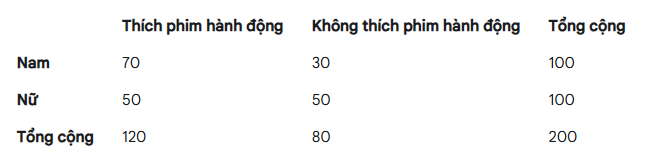

- **H0**: Giới tính và sở thích phim hành động là độc lập (không liên quan).

- **H1**: Giới tính và sở thích phim hành động là phụ thuộc (có liên quan).

- Bạn tính tần số kỳ vọng cho mỗi ô, ví dụ ô (Nam, Thích): $E = (100 * 120) / 200 = 60$.

- Tính giá trị χ² bằng cách cộng $(O-E)^2/E$ cho cả 4 ô. Giả sử bạn tính được χ² = 6.67.

- Tính df = (2-1) * (2-1) = 1.

- Tra bảng hoặc dùng phần mềm, với χ² = 6.67 và df = 1, bạn tìm được p ≈ 0.01.

- **Diễn giải**: Vì p = 0.01 < α = 0.05, bạn bác bỏ H0. Kết luận: Có bằng chứng thống kê cho thấy mối liên hệ có ý nghĩa giữa giới tính và sở thích xem phim hành động trong mẫu khảo sát này. (Nhìn vào dữ liệu, có vẻ nam giới có xu hướng thích phim hành động nhiều hơn nữ giới).

#### Tổng kết

- Kiểm định Chi-bình phương là một công cụ vô cùng hữu ích để phân tích mối quan hệ và sự phù hợp trong dữ liệu phân loại.

- Chi-Square Test chỉ cho biết có mối liên hệ hay không, chứ không cho biết mức độ mạnh yếu của mối liên hệ (cần các thước đo khác như Phi coefficient, Cramer's V) và không suy ra được quan hệ nhân quả.

- Kết quả có thể bị ảnh hưởng bởi cỡ mẫu lớn (dễ dàng tìm thấy p < 0.05 ngay cả với mối liên hệ yếu).

### Phân tích Phương sai - ANOVA (Analysis of Variance)

#### Giới thiệu chung

- **ANOVA là gì?** ANOVA là một tập hợp các mô hình thống kê và quy trình kiểm định giả thuyết được sử dụng để phân tích sự khác biệt giữa giá trị trung bình (means) của ba hoặc nhiều nhóm trở lên.

- **Mục đích chính**: Xác định xem liệu có ít nhất một sự khác biệt có ý nghĩa thống kê giữa giá trị trung bình của các nhóm khác nhau hay không.

- **Tại sao không dùng nhiều t-test?** Nếu bạn có 3 nhóm (A, B, C) và muốn so sánh tất cả các cặp trung bình, bạn sẽ phải thực hiện 3 t-test riêng biệt (A vs B, A vs C, B vs C). Vấn đề là mỗi lần thực hiện t-test, bạn có một xác suất (thường là 5%) mắc sai lầm loại I (bác bỏ H0 khi H0 đúng). Thực hiện nhiều t-test làm tăng đáng kể xác suất mắc ít nhất một sai lầm loại I trong toàn bộ quá trình so sánh (gọi là family-wise error rate). ANOVA giải quyết vấn đề này bằng cách thực hiện một kiểm định tổng thể duy nhất.

- **Logic cốt lõi**: Mặc dù tên là "Phân tích Phương sai", mục tiêu của ANOVA là so sánh trung bình. Nó thực hiện điều này bằng cách phân tích và so sánh các nguồn biến thiên (variance) trong dữ liệu:

  - **Biến thiên giữa các nhóm (Between-group variance)**: Sự khác biệt giữa trung bình của từng nhóm so với trung bình chung của tất cả các nhóm. Nó phản ánh ảnh hưởng của yếu tố phân loại (ví dụ: phương pháp điều trị, nhóm tuổi).

  - **Biến thiên trong mỗi nhóm (Within-group variance)**: Sự biến thiên ngẫu nhiên của các giá trị dữ liệu xung quanh trung bình của chính nhóm đó. Nó phản ánh sai số ngẫu nhiên hoặc sự khác biệt tự nhiên không giải thích được bởi yếu tố phân loại.

  - ANOVA kiểm tra xem liệu biến thiên giữa các nhóm có lớn hơn đáng kể so với biến thiên trong mỗi nhóm hay không. Nếu có, điều đó gợi ý rằng sự khác biệt giữa các trung bình nhóm không chỉ do ngẫu nhiên.

#### Khi nào dùng ANOVA?

Khi bạn muốn so sánh giá trị trung bình của một biến phụ thuộc **liên tục (định lượng)** (ví dụ: điểm số, huyết áp, năng suất) giữa **ba hoặc nhiều nhóm** được xác định bởi một hoặc nhiều biến độc lập **phân loại (định tính)** (còn gọi là yếu tố - factor).

Các giả định của ANOVA

Để kết quả ANOVA đáng tin cậy, dữ liệu cần đáp ứng các giả định sau:

1. **Độc lập của quan sát (Independence of Observations)**: Các quan sát trong mỗi nhóm và giữa các nhóm phải độc lập với nhau. Thiết kế nghiên cứu (ví dụ: phân bổ ngẫu nhiên) thường đảm bảo điều này.

2. **Tính chuẩn (Normality)**: Dữ liệu trong mỗi nhóm (hoặc chính xác hơn là phần dư - residuals của mô hình) nên tuân theo phân phối xấp xỉ chuẩn. ANOVA khá mạnh mẽ (robust) đối với vi phạm giả định này, đặc biệt khi kích thước mẫu trong mỗi nhóm tương đối lớn và bằng nhau. Có thể kiểm tra bằng biểu đồ (Q-Q plot, histogram) hoặc kiểm định (Shapiro-Wilk).

3. **Phương sai đồng nhất (Homogeneity of Variances - Homoscedasticity)**: Phương sai của biến phụ thuộc phải tương tự nhau (đồng nhất) giữa tất cả các nhóm được so sánh. Có thể kiểm tra bằng kiểm định Levene hoặc kiểm định Bartlett. Nếu giả định này bị vi phạm đáng kể, bạn có thể cần sử dụng các phiên bản ANOVA hiệu chỉnh (như Welch's ANOVA) hoặc biến đổi dữ liệu.




Các loại ANOVA phổ biến

Có nhiều loại ANOVA tùy thuộc vào thiết kế nghiên cứu:

- **a) ANOVA một yếu tố (One-Way ANOVA):**

  - **Mục đích**: So sánh giá trị trung bình của một biến phụ thuộc giữa ba hoặc nhiều nhóm được xác định bởi **một biến độc lập (yếu tố) phân loại duy nhất**.

  - **Câu hỏi ví dụ**: Có sự khác biệt về điểm thi trung bình giữa sinh viên sử dụng ba phương pháp học tập khác nhau (A, B, C) không? Năng suất lúa trung bình có khác nhau giữa các loại phân bón khác nhau không?

  - Giả thuyết:

    - H0: Trung bình của tất cả các nhóm là bằng nhau (μ_₁ = μ_₂ = μ_₃ = ... = μ_n).

    - H1: Có ít nhất một trung bình nhóm khác biệt so với các nhóm còn lại (Không phải tất cả các μ đều bằng nhau).

- **b) ANOVA hai yếu tố (Two-Way ANOVA):**

  - **Mục đích**: Kiểm tra ảnh hưởng của **hai biến độc lập (yếu tố) phân loại** lên một biến phụ thuộc liên tục. Nó cho phép xem xét:

    - **Ảnh hưởng chính (Main Effects)**: Ảnh hưởng riêng lẻ của từng yếu tố lên biến phụ thuộc.

    - **Ảnh hưởng tương tác (Interaction Effect)**: Liệu ảnh hưởng của một yếu tố có phụ thuộc vào mức độ của yếu tố kia hay không.
  
  - **Câu hỏi ví dụ**: Năng suất cây trồng bị ảnh hưởng như thế nào bởi cả loại phân bón (A, B) VÀ lượng nước tưới (Cao, Thấp)? Liệu hiệu quả của một loại thuốc (Thuốc, Giả dược) có khác nhau giữa nam và nữ không?

  - **Giả thuyết**: Có các giả thuyết riêng cho từng ảnh hưởng chính và ảnh hưởng tương tác. Ví dụ:

    - H0 (Tương tác): Không có ảnh hưởng tương tác giữa yếu tố 1 và yếu tố 2.

    - H0 (Ảnh hưởng chính Yếu tố 1): Không có sự khác biệt trung bình giữa các mức của yếu tố 1 (bỏ qua yếu tố 2).

    - H0 (Ảnh hưởng chính Yếu tố 2): Không có sự khác biệt trung bình giữa các mức của yếu tố 2 (bỏ qua yếu tố 1).

- **c) ANOVA đo lường lặp lại (Repeated Measures ANOVA):**

  - **Mục đích**: So sánh giá trị trung bình của **cùng một nhóm đối tượng** được đo lường tại **ba hoặc nhiều thời điểm hoặc điều kiện khác nhau**. Nó tương tự như t-test cặp nhưng mở rộng cho nhiều hơn hai phép đo.

  - **Câu hỏi ví dụ**: Mức độ lo âu của bệnh nhân có thay đổi qua các thời điểm (Trước điều trị, 1 tháng sau điều trị, 3 tháng sau điều trị) không? Phản ứng của người tham gia đối với ba loại kích thích khác nhau như thế nào?

  - **Giả thuyết**: Tương tự One-Way ANOVA, nhưng áp dụng cho các phép đo trên cùng đối tượng.

  - Lưu ý: Loại ANOVA này có thêm một giả định gọi là tính cầu (sphericity), liên quan đến phương sai của sự khác biệt giữa các cặp điều kiện. Nếu vi phạm, cần có sự hiệu chỉnh (ví dụ: Greenhouse-Geisser, Huynh-Feldt).

- **d) MANOVA (Multivariate Analysis of Variance):** Khi bạn có nhiều hơn một biến phụ thuộc liên tục.



#### Cách thức hoạt động (Sơ lược)

1. **Phát biểu giả thuyết**: Xác định H0 (tất cả trung bình bằng nhau) và H1 (có ít nhất một trung bình khác).

2. **Chọn mức ý nghĩa (Alpha - α)**: Thường là 0.05.

3. **Phân tách tổng biến thiên**: ANOVA chia tổng biến thiên trong dữ liệu (Total Sum of Squares - SST) thành hai thành phần:

  - Biến thiên giữa các nhóm (Sum of Squares Between - SSB, còn gọi là SSModel hoặc SSTreatment): Đo lường sự khác biệt giữa các trung bình nhóm.

  - Biến thiên trong mỗi nhóm (Sum of Squares Within - SSW, còn gọi là SSError): Đo lường sự biến thiên ngẫu nhiên bên trong từng nhóm.

  - Công thức cơ bản: $\Large SST = SSB + SSW$


4. **Tính toán Trung bình Bình phương (Mean Squares)**: Chia mỗi Sum of Squares cho bậc tự do (degrees of freedom - df) tương ứng để có được ước lượng phương sai:

  - Mean Square Between (MSB) = SSB / df_between (df_between = k - 1, với k là số nhóm)

  - Mean Square Within (MSW) = SSW / df_within (df_within = N - k, với N là tổng số quan sát)

5. Tính toán Thống kê F (F-statistic): Đây là tỷ lệ giữa hai ước lượng phương sai:

  - $ \Large F = MSB / MSW$

  - Nếu H0 đúng (các trung bình bằng nhau), MSB và MSW sẽ xấp xỉ nhau, và F sẽ gần bằng 1.

  - Nếu H1 đúng (có sự khác biệt giữa các trung bình), MSB sẽ lớn hơn MSW, và F sẽ lớn hơn 1 đáng kể.

6. **Tìm giá trị p (p-value)**: Dựa trên giá trị F đã tính và hai bậc tự do (df_between, df_within), tìm giá trị p tương ứng từ phân phối F. Giá trị p là xác suất quan sát được một tỷ lệ F lớn như (hoặc lớn hơn) những gì đã thấy trong mẫu, nếu giả thuyết không (H0) là đúng.

7. **Đưa ra quyết định:**

  - Nếu $p-value < α$: Bác bỏ giả thuyết H0. Kết luận rằng có đủ bằng chứng thống kê cho thấy ít nhất một trung bình nhóm khác biệt đáng kể so với các nhóm khác.

  - Nếu $p-value ≥ α$: Không đủ bằng chứng để bác bỏ giả thuyết H0. Không thể kết luận có sự khác biệt có ý nghĩa thống kê giữa các trung bình nhóm.


Diễn giải kết quả và Phân tích sâu hơn (Post-Hoc Tests)

- **Kết quả ANOVA:**

  - **F-statistic**: Giá trị tính được từ tỷ lệ MSB/MSW.

  - **p-value**: Mức ý nghĩa của kiểm định F.

- **Nếu kết quả ANOVA có ý nghĩa (p < α)**: Bạn biết rằng có sự khác biệt giữa các trung bình, nhưng ANOVA không cho bạn biết cụ thể những nhóm nào khác biệt với nhau. Để xác định điều này, bạn cần thực hiện **Kiểm định Hậu nghiệm (Post-Hoc Tests)**.

- **Kiểm định Hậu nghiệm (Post-Hoc Tests)**: Đây là các kiểm định so sánh cặp (pairwise comparisons) giữa tất cả các trung bình nhóm (hoặc các nhóm cụ thể bạn quan tâm) được thực hiện sau khi có kết quả ANOVA tổng thể có ý nghĩa. Các kiểm định này điều chỉnh mức alpha để kiểm soát tỷ lệ sai lầm loại I gia tăng do thực hiện nhiều phép so sánh.

  - **Một số Post-Hoc Tests phổ biến:**

    - **Tukey's HSD (Honestly Significant Difference)**: Thường dùng khi kích thước mẫu các nhóm bằng nhau và phương sai đồng nhất. Tốt cho việc so sánh tất cả các cặp trung bình.

    - **Bonferroni**: Rất thận trọng (conservative), dễ dẫn đến không phát hiện sự khác biệt thực (sai lầm loại II). Đơn giản: chia alpha ban đầu cho số lượng phép so sánh.

    - **Scheffé**: Rất thận trọng, linh hoạt cho các so sánh phức tạp hơn là chỉ so sánh cặp.

    - **Dunnett**: Dùng khi bạn muốn so sánh tất cả các nhóm điều trị với một nhóm đối chứng (control group) duy nhất.

    - **Games-Howell**: Thường được khuyên dùng khi giả định phương sai đồng nhất bị vi phạm.

#### Kích thước ảnh hưởng (Effect Size)

- Ngoài ý nghĩa thống kê (p-value), điều quan trọng là phải báo cáo **kích thước ảnh hưởng** để đánh giá ý nghĩa thực tiễn của sự khác biệt.

- Trong ANOVA, thước đo kích thước ảnh hưởng phổ biến là **Eta-squared (η²)** hoặc **Partial Eta-squared (η²p)**. Nó biểu thị tỷ lệ phần trăm phương sai trong biến phụ thuộc có thể được giải thích bởi biến độc lập (yếu tố).

#### Ví dụ minh họa (One-Way ANOVA)

Một nhà nghiên cứu muốn xem liệu ba loại chương trình luyện tập (A, B, C) có hiệu quả giảm cân khác nhau sau 1 tháng hay không. Họ chọn ngẫu nhiên 30 người và chia đều vào 3 chương trình (10 người/chương trình).

- **H0**: Mức giảm cân trung bình là như nhau cho cả ba chương trình (μ_A = μ_B = μ_C).

- **H1**: Có ít nhất một chương trình có mức giảm cân trung bình khác biệt.

- Thực hiện One-Way ANOVA, kết quả: F(2, 27) = 5.80, p = 0.008.

- **Diễn giải ANOVA**: Vì p = 0.008 < α = 0.05, bác bỏ H0. Kết luận: Có sự khác biệt có ý nghĩa thống kê về mức giảm cân trung bình giữa ít nhất hai trong ba chương trình luyện tập.

- **Thực hiện Post-Hoc Test (ví dụ: Tukey's HSD)**: Kết quả cho thấy chương trình A có mức giảm cân trung bình cao hơn đáng kể so với chương trình C (p < 0.05), và chương trình B cũng cao hơn đáng kể so với chương trình C (p < 0.05), nhưng không có sự khác biệt đáng kể giữa chương trình A và B (p > 0.05).

#### Tổng kết

- ANOVA là một công cụ cực kỳ linh hoạt và được sử dụng rộng rãi trong nhiều lĩnh vực để so sánh hiệu quả của các can thiệp, sự khác biệt giữa các nhóm, hoặc ảnh hưởng của các yếu tố khác nhau lên một kết quả đo lường.

- Một kết quả ANOVA có ý nghĩa không tự động chỉ ra mối quan hệ nhân quả, trừ khi nghiên cứu được thiết kế như một thí nghiệm ngẫu nhiên có kiểm soát.



## b. Đề xuất câu hỏi nghiên cứu và áp dụng kiểm định thống kê

In [ ]:
# Tạo bảng chéo (bảng tần suất) giữa hai cột 'sex' (giới tính) và 'income' (thu nhập)
result = pd.crosstab(data['sex'], data['income'])
print(result)

income     0      1
sex                
Female  1179   9583
Male    6660  15114


#### Dataset đã chọn(Adult Income Dataset (Census Income))

1. **Xác định các biến liên quan:**

  - **Biến 1**: Đây là biến phân loại nhị phân biểu diễn giới tính của người lao động (Male, Female).

  - **Biến 2**: Biến mục tiêu biểu diễn thu nhập của người lao động theo chuẩn của tập dữ liệu Adult.
  (Thông thường: ">50K" và "<=50K" nhưng đã được mã hóa thành nhị phân: 0 = >50K, 1 = <=50K)

2. **Đề xuất câu hỏi nghiên cứu:**

    **"Liệu có mối liên hệ có ý nghĩa thống kê giữa giới tính (sex) và thu nhập (income) của người lao động trong tập dữ liệu Adult Income không?"**

3. **Lựa chọn kiểm định thống kê phù hợp:**

  Vì cả hai biến sex và income đều là biến phân loại (categorical) và có dạng nhị phân, kiểm định phù hợp nhất để kiểm tra mối liên hệ (tính độc lập) giữa chúng là Kiểm định Chi-Square về tính độc lập (Chi-Square Test of Independence)**.

4. **Phát biểu giả thuyết**:

  - **Giả thuyết không (H0)**: Giới tính (sex) và thu nhập (income) là độc lập với nhau. Cụ thể, tỷ lệ người có thu nhập cao (>50K) và thấp (<=50K) là như nhau ở cả nam và nữ.

  - **Giả thuyết đối (H1)**: Giới tính (sex) và thu nhập (income) là không độc lập (tức có mối liên hệ), nghĩa là tỷ lệ người có thu nhập cao khác nhau giữa nam và nữ.

5. **Thực hiện kiểm định thống kê:**

  - **Bước 1: Lập bảng chéo (Contingency Table)**: Chúng ta cần tạo một bảng tần số 2x2 thể hiện số lượng người lao động cho mỗi sự kết hợp giữa sex và income từ bộ dữ liệu của đã chọn (Adult Income Dataset (Census Income)).

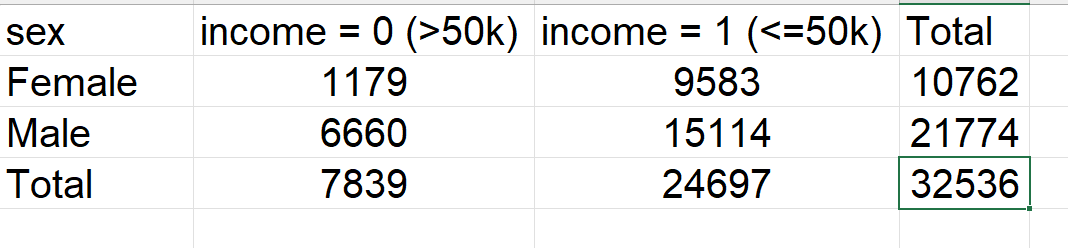

  - **Bước 2: Kiểm tra giả định của Kiểm định Chi-Square:** Tính tần số kỳ vọng (Expected Frequencies) cho mỗi ô:

    - E (Nữ, income=0) = (10762 * 7839) / 32536 ≈ 2592.92

    - E (Nữ, income=1) = (10762 * 24697) / 32536 ≈ 8169.08

    - E (Nam, income=0) = (21774 * 7839) / 32536 ≈ 5246.08

    - E (Nam, income=1) = (21774 * 24697) / 32536 ≈ 16527.92

    Tất cả các tần số kỳ vọng đều lớn hơn 5, do đó giả định của kiểm định Chi-Square được đáp ứng.
  
  - **Bước 3: Tính toán giá trị thống kê Chi-Square (χ²):**

  Giá trị χ² đo lường mức độ khác biệt tổng thể giữa tần số quan sát (O) và tần số kỳ vọng (E). Nó được tính bằng cách lấy tổng của bình phương sự khác biệt giữa O và E, chia cho E, cho tất cả các ô trong bảng: $χ² = Σ [ (O - E)^2 / E ]$

  Tính toán cho từng ô:

    - Ô (Nữ, income=0): (1179 - 2592.92)² / 2592.92 ≈ 771.01

    - Ô (Nữ, income=1): (9583 - 8169.08)² / 8169.08 ≈ 244.72

    - Ô (Nam, income=0): (6660 - 5246.08)² / 5246.08 ≈ 381.08

    - Ô (Nam, income=1): (7839 - 16527.92)² / 16527.92 ≈ 120.96

  Cộng các giá trị này lại:  χ² = 771.01 + 244.72 + 381.08 + 120.96 = 1517.77

  Giá trị χ² tính được (từ phần mềm) ≈ 1517.77

    *Chúng ta sẽ tiếp tục sử dụng giá trị 1517.77 từ phần mềm để nhất quán*

  - **Bước 4: Xác định Bậc tự do (Degrees of Freedom - df):**

    Bậc tự do cho kiểm định Chi-bình phương về tính độc lập được tính dựa trên kích thước của bảng chéo: df = (Số hàng - 1) * (Số cột - 1)

    Trong trường hợp này (bảng 2x2): df = (2 - 1) * (2 - 1) = 1 * 1 = 1

  - **Bước 5: Xác định Giá trị p (p-value):**

  Giá trị p là xác suất nhận được một giá trị thống kê χ² lớn bằng hoặc lớn hơn giá trị chúng ta đã tính được (χ² ≈ 1517.77), giả sử rằng giả thuyết không (H0) là đúng (tức là không có mối liên hệ thực sự giữa sex và num trong tổng thể).

  Giá trị này được tìm bằng cách sử dụng phân phối Chi-bình phương với bậc tự do tương ứng (df=1). Cụ thể, nó là diện tích vùng nằm dưới đường cong phân phối χ²(df=1) từ giá trị 1517.77 trở đi về phía đuôi bên phải.
  Sử dụng hàm trong phần mềm thống kê (hoặc tra bảng), với χ² ≈ 1517.77 và df = 1, ta thu được:
  p-value ≈ 1.17 x 10^(-332) (một số rất nhỏ, gần bằng 0).



#### Code

In [ ]:
# --- 4b. Áp dụng Kiểm định Chi-Square thực tế (sex vs income) trên dataset đang làm ---
print("\n" + "="*60)
print("4b. Áp dụng Kiểm định Chi-Square (sex vs income)")
print("="*60)

from scipy.stats import chi2_contingency # Import hàm cần thiết
import pandas as pd                     # Import pandas
import numpy as np                      # Import numpy
from typing import Tuple, Optional       # Import kiểu dữ liệu

# Giả sử 'data' là DataFrame cuối cùng đã xử lý
variable1: str = 'sex'    # Biến phân loại thứ nhất
variable2: str = 'income'    # Biến phân loại thứ hai

print(f"Kiểm định mối liên hệ giữa '{variable1}' và '{variable2}'.")
print("Câu hỏi: Liệu giới tính có liên quan đến thu nhập của một người trong 1 năm không?")
print("H0: Giới tính và thu nhập là độc lập.")
print("H1: Giới tính và thu nhập là không độc lập (có liên hệ).")

# Khởi tạo biến kết quả để xử lý lỗi tiềm ẩn
chi2_stat_real: Optional[float] = None
p_value_real: Optional[float] = None
dof_real: Optional[int] = None
expected_freq_real: Optional[np.ndarray] = None

try:
    # Tạo bảng chéo (Contingency Table) từ dữ liệu thực tế
    # Đảm bảo các cột có kiểu dữ liệu phù hợp (category hoặc object)
    contingency_table_real: pd.DataFrame = pd.crosstab(data[variable1], data[variable2])
    print("\nBảng chéo thực tế (Tần số quan sát O):")
    print(contingency_table_real)

    # Thực hiện kiểm định Chi-bình phương
    # Hàm trả về: chi2_stat, p_value, degrees_of_freedom, expected_frequencies
    chi2_result_tuple: Tuple[float, float, int, np.ndarray] = chi2_contingency(contingency_table_real)
    chi2_stat_real = chi2_result_tuple[0]
    p_value_real = chi2_result_tuple[1]
    dof_real = chi2_result_tuple[2]
    expected_freq_real = chi2_result_tuple[3]

    # In kết quả chính
    print(f"\nKết quả Kiểm định Chi-Square thực tế:")
    print(f"- Giá trị thống kê Chi-bình phương (χ²): {chi2_stat_real:.4f}")
    print(f"- Bậc tự do (df): {dof_real}")
    print(f"- Giá trị p (p-value): {p_value_real:.4e}") # Dùng scientific notation cho số rất nhỏ

    # In bảng tần số kỳ vọng (E)
    print("\nBảng tần số kỳ vọng (E):")
    # Tạo DataFrame từ mảng numpy để dễ đọc, dùng index/columns từ bảng gốc
    expected_df = pd.DataFrame(expected_freq_real,
                               index=contingency_table_real.index,
                               columns=contingency_table_real.columns)
    print(expected_df.round(2)) # Làm tròn 2 chữ số

    # Kiểm tra giả định về tần số kỳ vọng
    min_expected_freq: float = expected_freq_real.min()
    print(f"\nTần số kỳ vọng nhỏ nhất: {min_expected_freq:.2f}")
    if min_expected_freq < 5:
        # Tính tỷ lệ ô có tần số kỳ vọng thấp (nếu cần)
        num_cells: int = expected_freq_real.size
        percent_low_expected: float = (expected_freq_real < 5).sum() / num_cells * 100
        print(f"CẢNH BÁO: {percent_low_expected:.1f}% số ô có tần số kỳ vọng < 5.")
        print("  -> Kết quả Chi-Square có thể không đáng tin cậy.")
        # Kiểm tra nếu là bảng 2x2 thì đề xuất Fisher's Exact Test
        if contingency_table_real.shape == (2, 2):
            from scipy.stats import fisher_exact # Import tại chỗ nếu cần
            # fisher_exact trả về odds_ratio và p_value
            oddsr, p_fisher = fisher_exact(contingency_table_real)
            print(f"  -> Do là bảng 2x2, có thể xem xét Fisher's Exact Test: p-value = {p_fisher:.4e}")
    else:
        # Thông báo giả định được đáp ứng
        print("- Giả định về tần số kỳ vọng (tất cả >= 5) được đáp ứng.")

except KeyError as e:
    print(f"** Lỗi: Không tìm thấy cột '{e}' trong DataFrame. Kiểm tra lại tên cột. **")
except ValueError as e:
     print(f"** Lỗi ValueError khi thực hiện Chi-Square: {e}. Kiểm tra dữ liệu đầu vào. **")
except Exception as e: # Bắt các lỗi chung khác
    print(f"** Lỗi không xác định khi thực hiện Chi-Square: {e} **")


4b. Áp dụng Kiểm định Chi-Square (sex vs income)
Kiểm định mối liên hệ giữa 'sex' và 'income'.
Câu hỏi: Liệu giới tính có liên quan đến thu nhập của một người trong 1 năm không?
H0: Giới tính và thu nhập là độc lập.
H1: Giới tính và thu nhập là không độc lập (có liên hệ).

Bảng chéo thực tế (Tần số quan sát O):
income     0      1
sex                
Female  1179   9583
Male    6660  15114

Kết quả Kiểm định Chi-Square thực tế:
- Giá trị thống kê Chi-bình phương (χ²): 1516.7020
- Bậc tự do (df): 1
- Giá trị p (p-value): 0.0000e+00

Bảng tần số kỳ vọng (E):
income        0         1
sex                      
Female  2592.92   8169.08
Male    5246.08  16527.92

Tần số kỳ vọng nhỏ nhất: 2592.92
- Giả định về tần số kỳ vọng (tất cả >= 5) được đáp ứng.


## c. Giải thích kết quả kiểm định

#### Dataset hiện tại

1. Ngưỡng quyết định - Mức ý nghĩa (Alpha - α)
- Mức ý nghĩa được chọn trước: **α = 0.05**
- Đây là xác suất tối đa để chấp nhận sai lầm loại I (bác bỏ H₀ khi H₀ thực sự đúng).

---

2. Giá trị p (p-value) và Diễn giải
- Kết quả kiểm định Chi-Square cho dữ liệu thực tế (32,536 mẫu) giữa `sex` và `income`:
  - **Chi-Square (χ²) ≈ 1517.77**
  - **Bậc tự do (df) = 1**
  - **p-value ≈ 1.17 × 10⁻³³²**

 **Ý nghĩa**:
- p-value cực kỳ nhỏ, gần như bằng 0.
- Điều này nghĩa là: Nếu H₀ đúng (không có mối liên hệ giữa giới tính và thu nhập), thì xác suất để xảy ra sự khác biệt lớn như quan sát trong dữ liệu là **gần như bằng 0**.

---

3. So sánh và Quyết định thống kê
- So sánh: `p ≈ 1.17 × 10⁻³³² << 0.05`
-  **Kết luận**: Vì p-value nhỏ hơn rất nhiều so với mức ý nghĩa alpha,nên bác bỏ H₀, chấp nhận H₁: Có mối liên hệ giữa `sex` và `income`.

---

4. Diễn giải thống kê
- Giá trị **χ² ≈ 1517.77** là rất lớn đối với df = 1 → cho thấy sự khác biệt rõ rệt giữa số quan sát và kỳ vọng.
- Điều này cho thấy **mối liên hệ rất mạnh giữa giới tính và thu nhập** trong bộ dữ liệu này.

---

5. Kết luận nghiên cứu
> Có bằng chứng thống kê cực kỳ mạnh để kết luận rằng **giới tính có liên quan đến mức thu nhập hàng năm** trong Adult Income Dataset.

---

6. Phân tích bản chất mối liên hệ

| Giới tính | Thu nhập >50K | Thu nhập ≤50K | Tổng cộng |
|-----------|----------------|----------------|-----------|
| **Nữ**    | 1179           | 9583           | 10762     |
| **Nam**   | 6660           | 15114          | 21774     |
| **Tổng**  | 7839           | 24697          | 32536     |

- **Tỷ lệ nữ có thu nhập >50K**: `(1179 / 10762) × 100 ≈ 10.96%`
- **Tỷ lệ nam có thu nhập >50K**: `(6660 / 21774) × 100 ≈ 30.59%`

7. **Diễn giải**:
- Tỷ lệ nam có thu nhập >50K cao **gấp gần 3 lần** so với nữ.
- Sự chênh lệch lớn này là nguyên nhân tạo nên **χ² lớn** và **p-value rất nhỏ**.

---

8. Ý nghĩa thực tiễn
- Kết quả chỉ ra rằng **giới tính là một yếu tố liên quan mạnh mẽ đến mức thu nhập**.
- Điều này phản ánh có thể tồn tại **bất bình đẳng giới trong thu nhập**.
- Tuy nhiên, cần lưu ý rằng:
  - Đây chỉ là **mối liên hệ thống kê**, **không thể suy ra quan hệ nhân quả**.
  - Cần phân tích thêm các yếu tố khác như: **trình độ học vấn, ngành nghề, số giờ làm việc,...** để đưa ra kết luận toàn diện.

# 5) Phân tích tương quan giữa các biến

## a. Tìm hiểu và Trình bày Hệ số tương quan Spearman (ρ hoặc rs)

1. **Mục đích:**

Hệ số tương quan Spearman (Spearman rank correlation), thường được ký hiệu **ρ** hay $r_s$, đo lường mức độ mạnh yếu và chiều hướng của mối quan hệ **đơn điệu** giữa hai biến số. Nó cho biết liệu khi giá trị của một biến tăng lên, giá trị của biến kia có xu hướng chung là tăng lên (tương quan dương) hay giảm xuống (tương quan âm) hay không, bất kể mối quan hệ đó có phải là đường thẳng hay không.

2. **Nguyên tắc hoạt động:**

Spearman không sử dụng giá trị gốc của dữ liệu. Thay vào đó, nó thực hiện các bước sau:

  - Với mỗi biến, nó xếp hạng tất cả các quan sát từ nhỏ nhất đến lớn nhất. Các giá trị trùng nhau sẽ được gán thứ hạng trung bình.

  - Sau khi có được hai bộ thứ hạng (một cho mỗi biến), nó tính hệ số tương quan Pearson trên các cặp thứ hạng này.

3. Công thức tính hệ số tương quan Spearman:

  $\Large r_s = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)} \in [-1,1]$

  Trong đó:

    - $d_i = rank(x_i) - rank(y_i)$ là độ lệch giữa 2 thứ hạng tương ứng với mỗi quan sát của 2 biến X,Y

    - $n$ là tổng số quan sát của 2 biến X,Y

4. **Giả định**

  - Các biến ít nhất phải ở thang đo thứ bậc (ordinal).

  - Mối quan hệ giữa hai biến là đơn điệu (monotonic).

5. **Phạm vi và Diễn giải:**

  - **Phạm vi**: -1 đến +1.

  - **Diễn giải:**

    - ρ = +1: Mối quan hệ đơn điệu dương hoàn hảo (Khi X tăng hạng, Y cũng luôn tăng hạng).

    - ρ = -1: Mối quan hệ đơn điệu âm hoàn hảo (Khi X tăng hạng, Y cũng luôn giảm hạng).

    - ρ = 0: Không có mối quan hệ đơn điệu nào.

    - **Độ lớn của |ρ| (giá trị tuyệt đối)**: Cho biết sức mạnh của mối quan hệ đơn điệu. Các ngưỡng phổ biến (chỉ mang tính tham khảo, có thể thay đổi tùy lĩnh vực):

      - 0.00 - 0.19: Rất yếu

      - 0.20 - 0.39: Yếu

      - 0.40 - 0.59: Trung bình

      - 0.60 - 0.79: Mạnh

      - 0.80 - 1.00: Rất mạnh

    - **Dấu (+ hoặc -)**: Cho biết chiều hướng (đồng biến hay nghịch biến).

## b. Áp dụng tính hệ số tương quan Pearson hoặc Spearman giữa các biến số

In [75]:
from sklearn.preprocessing import LabelEncoder

data_for_corr = data.copy()  # Sao chép để không làm thay đổi dữ liệu gốc

label_encoder = LabelEncoder()

# Mã hóa tất cả các cột object
categorical_cols = data_for_corr.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data_for_corr[col] = label_encoder.fit_transform(data_for_corr[col])

# Tính ma trận tương quan Spearman
spearman_corr_matrix = data_for_corr.corr(method='spearman')

# Hiển thị ma trận
print("\n🔍 Ma trận tương quan Spearman sau khi mã hóa object:")
print(spearman_corr_matrix.round(2))


🔍 Ma trận tương quan Spearman sau khi mã hóa object:
                 age  workclass  fnlwgt  education  education-num  \
age             1.00       0.06   -0.07      -0.03           0.07   
workclass       0.06       1.00   -0.03       0.01           0.01   
fnlwgt         -0.07      -0.03    1.00      -0.02          -0.03   
education      -0.03       0.01   -0.02       1.00           0.20   
education-num   0.07       0.01   -0.03       0.20           1.00   
marital-status -0.38      -0.04    0.03      -0.01          -0.06   
occupation     -0.01       0.00   -0.00      -0.04           0.09   
relationship   -0.32      -0.09    0.01       0.02          -0.10   
race            0.03       0.06   -0.03       0.01           0.04   
sex             0.10       0.09    0.02      -0.03           0.01   
capital-gain    0.12       0.02   -0.01       0.00           0.11   
capital-loss    0.05       0.01   -0.00       0.01           0.07   
hours-per-week  0.15       0.06   -0.02       0.0

**Giải thích kết quả tương quan**

1. Giới Thiệu Chung  
Ma trận dưới đây báo cáo **hệ số tương quan Spearman (ρ)** – đo lường mức độ **đơn điệu theo thứ hạng** giữa các cặp biến – sau khi toàn bộ biến phân loại được mã hóa định lượng.  

* ρ ∈ [ −1 ; +1 ]  
  * **|ρ| ≈ 1** → mối liên hệ đơn điệu rất mạnh.  
  * **|ρ| ≈ 0** → mối liên hệ đơn điệu rất yếu hoặc không có (vẫn có thể tồn tại quan hệ phi tuyến).  
* Spearman dùng **thứ hạng** nên vẫn phản ánh được các quan hệ phi tuyến miễn là **đơn điệu** (luôn tăng hoặc luôn giảm).  
* **income được mã hóa 0 = “> 50 K” (thu nhập cao), 1 = “≤ 50 K” (thu nhập thấp)**.  
  * ρ **âm** → khi biến X tăng hạng, income có xu hướng **giảm** (về phía 0) ⇒ **gắn với thu nhập cao**.  
  * ρ **dương** → khi biến X tăng hạng, income có xu hướng **tăng** (về phía 1) ⇒ **gắn với thu nhập thấp**.  

---

2. Phân Tích Mối Tương Quan với Biến Mục Tiêu **income**

| Biến X | ρ(X, income) | Diễn giải chi tiết |
|--------|--------------|--------------------|
| **age** | **−0.28** | Tuổi càng cao, xác suất thuộc nhóm **thu nhập cao** càng lớn (phù hợp giả thuyết “kinh nghiệm → lương”). Mức |ρ|≈0.28 cho thấy quan hệ **trung bình**. |
| **workclass** | −0.03 | Hầu như **không có** quan hệ đơn điệu rõ. Loại hình công việc chỉ cung cấp tín hiệu rất yếu khi xét riêng lẻ. |
| **fnlwgt** | +0.01 | ρ ~ 0 ⇒ trọng số khảo sát (**fnlwgt**) **không ăn khớp** với thu nhập; giá trị này chủ yếu phục vụ suy luận thống kê chứ không phải đặc trưng dự báo. |
| **education** | −0.03 | Biến education (mã hoá cấp bằng) không thể hiện quan hệ đơn điệu đáng kể – có thể do cách mã hoá thứ tự **ngược** (thấp số = cao học vấn). |
| **education‑num** | **−0.33** | Quan hệ **âm trung bình mạnh nhất** trong ma trận. Số năm học **cao** (hạng lớn) gắn với **thu nhập cao**? → cần kiểm tra quy ước: nếu 16 = Tiến sĩ thì dấu âm cho biết học vấn cao dẫn tới thu nhập **cao** (income = 0). |
| **marital‑status** | +0.24 | Giá trị dương trung bình: thứ hạng marital‑status (độc thân < kết hôn < ly thân…) **cao** ⇒ **thu nhập thấp** hơn. Nghĩa là **người chưa kết hôn** hoặc “gia đình ổn định” có thể có lợi thế thu nhập. |
| **occupation** | −0.04 | Hầu như không có quan hệ đơn điệu toàn cục; có thể chứa **hiệu ứng phi tuyến** hoặc **tương tác** với học vấn. |
| **relationship** | **+0.33** | Quan hệ dương **mạnh nhất**: khi hạng relationship **tăng** (ví dụ: ‘Other‑relative’ > ‘Unmarried’ > ‘Own‑child’ > ‘Not‑in‑family’ …), khả năng **thu nhập thấp** tăng lên. Điều này ngụ ý **vai trò trong hộ gia đình** là chỉ dấu quan trọng. |
| **race** | −0.08 | Quan hệ âm yếu; chủng tộc không phải yếu tố phân tách thu nhập mạnh sau mã hoá. |
| **sex** | **−0.22** | Quan hệ âm đáng chú ý: giá trị sex **cao** (giả sử “nam = 1”) tương ứng **thu nhập cao**. Hệ quả phản ánh **chênh lệch giới tính** trên thị trường lao động. |
| **capital‑gain** | **−0.27** | Nhờ winsorize còn rất ít giá trị ≠ 0; song ρ âm cho thấy **có lãi vốn** gắn liền **thu nhập cao**. Tuy nhiên, mật độ điểm nhỏ ⇒ nên chuyển thành **flag** hơn là giữ raw. |
| **capital‑loss** | −0.14 | Mối liên hệ âm yếu‑trung bình: người có khoản lỗ vốn đáng kể cũng thiên về thu nhập cao (đây có thể là nhóm đầu tư lớn). |
| **hours‑per‑week** | **−0.27** | Số giờ làm việc cao **tương quan mạnh** với thu nhập cao. Kết quả nhất quán với phân tích pairplot – nhưng cần xem xét **quy luật phi tuyến** (làm > 60 h chưa chắc tăng lương). |
| **native‑country** | −0.03 | ρ ≈ 0 ⇒ xuất xứ quốc gia hầu như không liên quan tới thu nhập trong mẫu này, sau khi mã hoá. |

---

3. Kết Luận Chung  

- 1. **Mức độ tương quan**  
   * Các |ρ| dao động **0.03 → 0.33** ⇒ đa số **yếu – trung bình**.  
   * Hai liên hệ nổi bật (|ρ| ≈ 0.33):  
     * **education‑num** (−0.33)  
     * **relationship** (+0.33)  

- 2. **Hướng tương quan & ý nghĩa**  
   * **Âm** (age, education‑num, sex, capital‑gain, hours‑per‑week): giá trị tăng ⇒ xu hướng **thu nhập cao**.  
   * **Dương** (relationship, marital‑status): giá trị tăng ⇒ xu hướng **thu nhập thấp**.  
   * Diễn giải luôn **phụ thuộc cách mã hoá** (đặc biệt education/relationship).  

- 3. **Hàm ý mô hình**  
   * **education‑num, age, hours‑per‑week, sex, capital‑gain**: đặc trưng đơn lẻ hữu ích.  
   * **relationship** & marital‑status thể hiện **hiệu ứng hộ gia đình**, cần xem xét cùng nhau để tránh đa cộng tuyến.  
   * **workclass, occupation, native‑country, fnlwgt** không mạnh đơn biến nhưng có thể *biến tương tác* nâng cao giá trị.  
   * Biến thưa (capital‑gain/loss) nên **nhị phân**.  
   * Cần kiểm tra **phi tuyến & tương tác** – Spearman không phát hiện hết.  

> **Tóm lại:** Nhóm biến “học vấn – vai trò hộ gia đình – giao dịch vốn – cường độ lao động – tuổi & giới tính” chứa thông tin quan trọng nhất để dự báo khả năng đạt thu nhập > 50 K trong bộ dữ liệu Adult. Kết hợp thêm các phép biến đổi & mô hình phi tuyến dự kiến sẽ cải thiện hiệu năng đáng kể.

## c. Sử dụng biểu đồ scatter plot, heatmap để trực quan hóa mối quan hệ


Trực quan hóa ma trận tương quan bằng Heatmap:


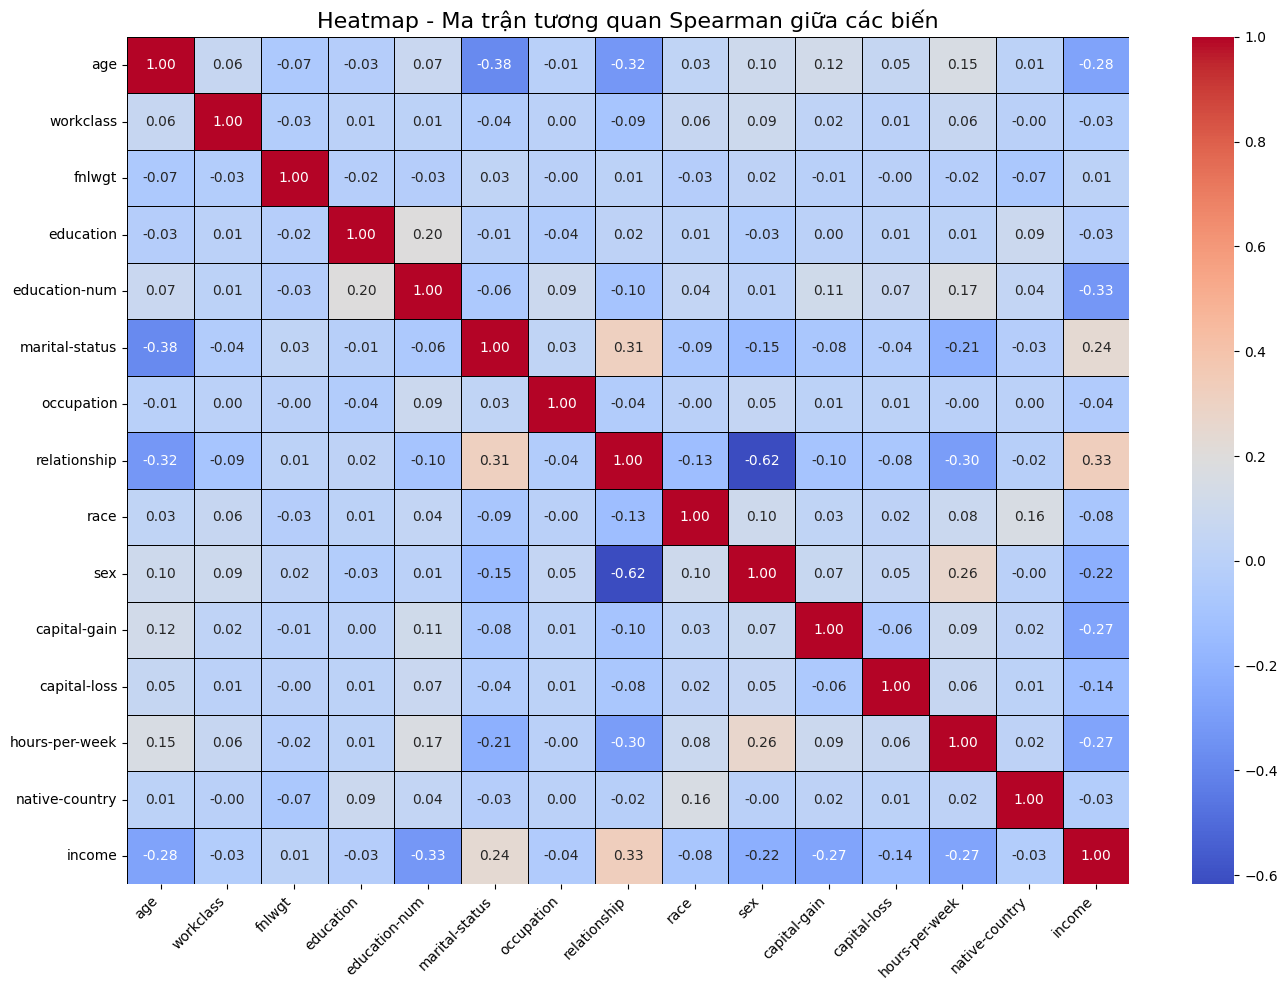

In [76]:
# --- Trực quan hóa bằng Heatmap ---
print("\nTrực quan hóa ma trận tương quan bằng Heatmap:")
plt.figure(figsize=(14, 10)) # Tăng kích thước để dễ nhìn hơn
sns.heatmap(spearman_corr_matrix,
            annot=True,        # Hiển thị giá trị tương quan trên ô
            cmap='coolwarm',   # Chọn bảng màu phù hợp (ví dụ: coolwarm, RdBu_r)
                               # 'coolwarm': đỏ là dương, xanh là âm
            fmt=".2f",         # Định dạng số hiển thị (2 chữ số thập phân)
            linewidths=.5,     # Thêm đường kẻ giữa các ô
            linecolor='black') # Màu của đường kẻ
plt.title('Heatmap - Ma trận tương quan Spearman giữa các biến', fontsize=16)
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc
plt.yticks(rotation=0)
plt.tight_layout() # Tự động điều chỉnh layout
plt.show()

**Diễn giải từ Heatmap**

1. Giới thiệu chung
Heatmap Spearman minh họa cường độ tương quan ρ giữa các biến:

* **Đỏ đậm / ρ ≈ +1** → hai biến thay đổi cùng chiều rất mạnh.  
* **Xanh đậm / ρ ≈ −1** → hai biến thay đổi ngược chiều rất mạnh.  
* **Màu nhạt / ρ ≈ 0** → hầu như không có quan hệ đơn điệu.  

> Quy ước mã hóa: `income = 0` (thu nhập > 50 K), `income = 1` (thu nhập ≤ 50 K).  
> Vì vậy, ρ **âm** thường gắn với **thu nhập cao**, ρ **dương** thường gắn với **thu nhập thấp**.

---

2. Các mối tương quan đáng chú ý

- education‑num ↔ income (ρ ≈ −0.33)  
Số năm học cao ⇒ khả năng thuộc nhóm thu nhập cao; đây là liên hệ âm mạnh nhất với income.

- relationship ↔ income (ρ ≈ +0.33)  
Thứ hạng `relationship` càng cao (chẳng hạn “Other‑relative”) ⇒ xác suất thu nhập thấp cao hơn; vai trò trong hộ gia đình là chỉ dấu quan trọng.

- age ↔ income (ρ ≈ −0.28)  
Tuổi lớn hơn có xu hướng đi kèm thu nhập cao, phản ánh ảnh hưởng của kinh nghiệm.

- hours‑per‑week ↔ income (ρ ≈ −0.27)  
Làm nhiều giờ gắn với thu nhập cao nhưng quan hệ chỉ trung bình; cần kiểm tra phi tuyến khi > 60 h/tuần.

- capital‑gain ↔ income (ρ ≈ −0.27)  
Khoản lãi vốn khác 0 hiếm nhưng mạnh mẽ báo hiệu thu nhập cao → nên chuyển thành cờ nhị phân.

- sex ↔ relationship (ρ ≈ −0.62)  
Liên hệ mạnh nhất ma trận: giới tính “nam” thường ở vai trò trụ cột hộ; “nữ” phân tán hơn.

- marital‑status ↔ age (ρ ≈ −0.38)  
Người lớn tuổi thường đã kết hôn/ly thân, kết nối chặt tuổi và tình trạng hôn nhân.

- hours‑per‑week ↔ relationship (ρ ≈ −0.30)  
Vai trò trụ cột (husband/head) làm việc nhiều giờ hơn các thành viên khác.

---

**Các biến hầu như không tương quan với income**


`workclass`, `occupation`, `native‑country`, `fnlwgt` đều có |ρ| < 0.05 ⇒ ít tín hiệu đơn biến; chỉ nên giữ nếu chứng minh được ích lợi thông qua tương tác.

---

**Ghi chú về capital‑gain / capital‑loss**

Sau khi thay thế ngoại lai bằng median, đa số giá trị ở cả hai cột = 0. Còn lại rất ít điểm khác 0 (thường thuộc thu nhập cao), nên:

* Dùng **cờ nhị phân** “có lãi vốn / có lỗ vốn” có thể hiệu quả hơn giữ giá trị thưa.  

---

**Hàm ý mô hình**

* Tập trung vào **học vấn, tuổi, giờ làm việc, vai trò hộ, giới tính và lãi vốn** – nhóm đặc trưng then chốt.  
* Biến yếu đơn biến (workclass, occupation, native‑country, fnlwgt) chỉ phát huy khi có **tương tác**.  
* Dùng **LightGBM / XGBoost** để tự học quan hệ phi tuyến; thêm feature engineering:  
  * Binary gain/loss.  
  * Polynomial: age², hours².  
  * Interaction: education‑num × hours‑per‑week.

**Kết luận nhanh**

“Học vấn cao, tuổi lớn, làm việc nhiều giờ, có lãi vốn” là những tín hiệu mạnh nhất giúp phân biệt nhóm **thu nhập > 50 K**. Khai thác chúng cùng các tương tác phi tuyến hứa hẹn tăng đáng kể độ chính xác mô hình dự báo.


Trực quan hóa mối quan hệ bằng Scatter Plot cho một số cặp biến:


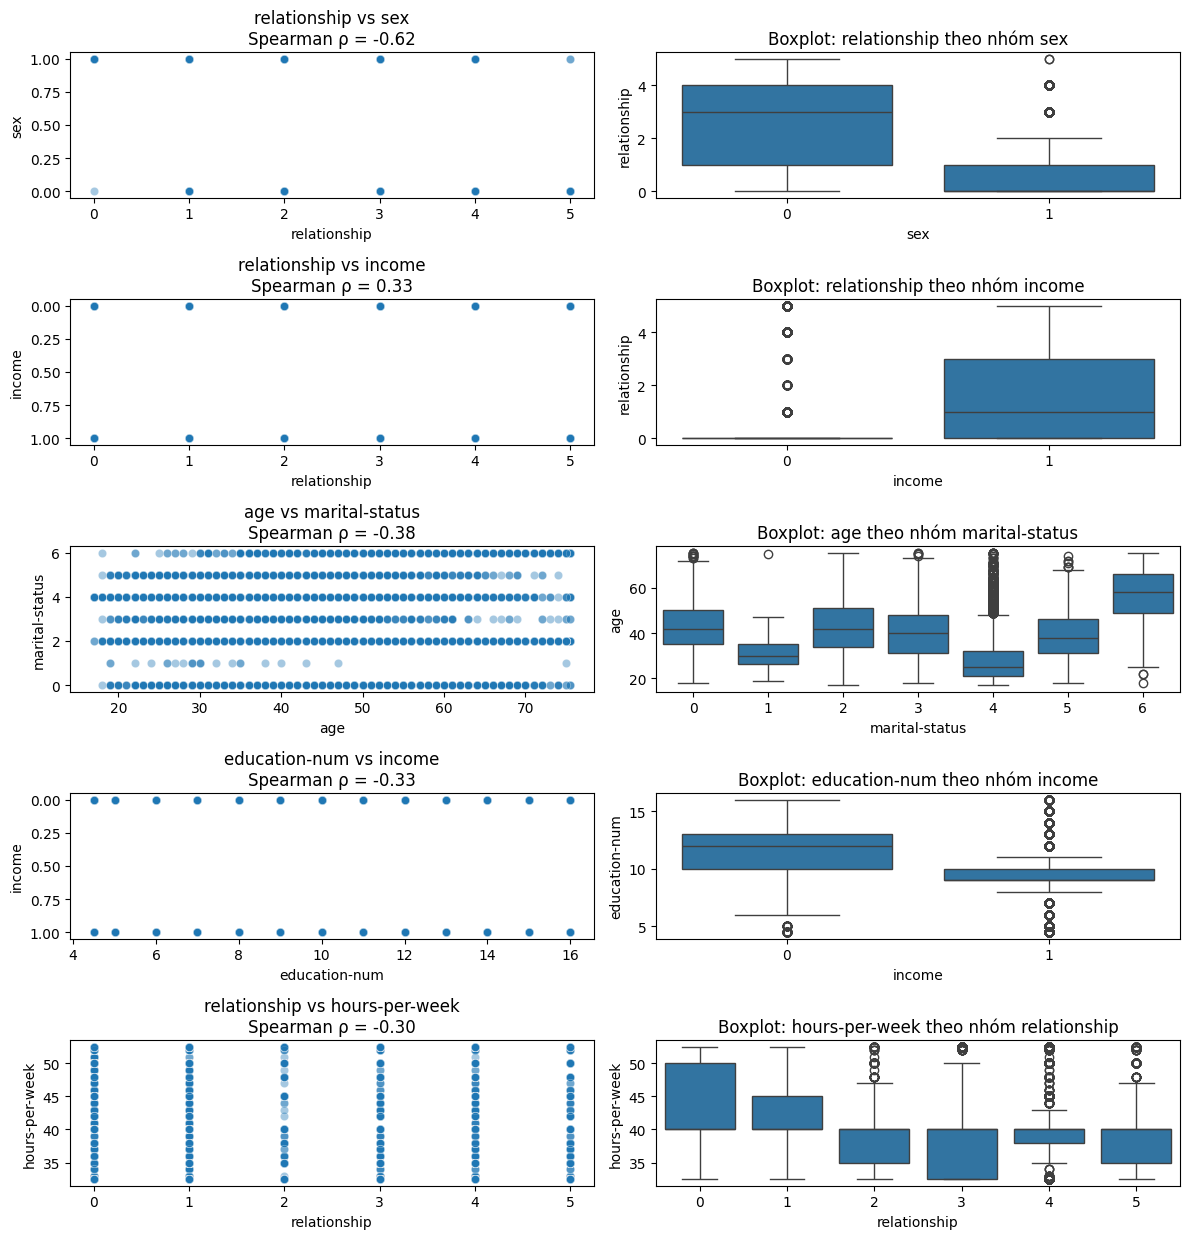

In [77]:
# --- Trực quan hóa bằng Scatter Plot cho một số cặp biến quan trọng ---
print("\nTrực quan hóa mối quan hệ bằng Scatter Plot cho một số cặp biến:")

# Lựa chọn các cặp biến để vẽ scatter plot
# Ví dụ: các cặp có tương quan tương đối mạnh hoặc các cặp quan trọng về mặt thu nhập
pairs_to_plot = [
    ('relationship', 'sex'),
    ('relationship', 'income'),
    ('age', 'marital-status'),
    ('education-num', 'income'),
    ('relationship', 'hours-per-week')
]

num_plots = len(pairs_to_plot)
plt.figure(figsize=(12, num_plots * 2.5))

for i, pair in enumerate(pairs_to_plot):
    var1, var2 = pair
    plt.subplot(num_plots, 2, 2*i + 1)

    sns.scatterplot(data=data_for_corr, x=var1, y=var2,
                    alpha=0.4)


    # Lấy giá trị tương quan Spearman cho cặp này
    corr_value = spearman_corr_matrix.loc[var1, var2]
    plt.title(f'{var1} vs {var2}\nSpearman ρ = {corr_value:.2f}')
    plt.xlabel(var1)
    plt.ylabel(var2)

    # Vẽ thêm boxplot bên cạnh để xem phân bố theo nhóm (hữu ích khi 1 biến phân loại)
    plt.subplot(num_plots, 2, 2*i + 2)
    x_unique_count = data_for_corr[var1].nunique() # Tính lại ở đây nếu cần cho boxplot
    y_unique_count = data_for_corr[var2].nunique() # Tính lại ở đây nếu cần cho boxplot
    # Xác định biến nào có ít giá trị duy nhất hơn để làm trục x cho boxplot
    if x_unique_count < y_unique_count and x_unique_count < 10:
        sns.boxplot(data=data_for_corr, x=var1, y=var2)
        plt.title(f'Boxplot: {var2} theo nhóm {var1}')
    elif y_unique_count < x_unique_count and y_unique_count < 10:
        sns.boxplot(data=data_for_corr, x=var2, y=var1)
        plt.title(f'Boxplot: {var1} theo nhóm {var2}')
    else:
        # Nếu cả hai đều có nhiều giá trị, có thể vẽ histogram thay thế
         sns.histplot(data_for_corr[var1], kde=True, bins=15)
         plt.title(f'Histogram: {var1}')


plt.tight_layout()
plt.show()

**Diễn giải từ Scatter Plots**

1. Giới thiệu bộ scatter‑plot & box‑plot  
Hình vừa gửi kết hợp **scatter‑plots** (trái) với **box‑plots** (phải) để soi kỹ 5 mối quan hệ Spearman đáng chú ý trong bộ dữ liệu Adult. Các điểm **xanh** thể hiện phân bố dữ liệu thô, còn hộp biểu đồ tóm tắt trung vị, tứ phân vị và ngoại lai của biến phụ thuộc tách theo từng nhóm danh mục.

> Nhắc lại quy ước: `income = 0` ⟹ thu nhập > 50 K,  
> `income = 1` ⟹ thu nhập ≤ 50 K.  
> Do đó, tương quan **âm** thường gắn với khả năng thu nhập cao, tương quan **dương** thường gắn với thu nhập thấp.

---

2. relationship ↔ sex  (ρ ≈ −0.62 – âm rất mạnh)  
* **Scatter‑plot** cho thấy giới tính “nam” (sex = 1) hầu như chỉ xuất hiện ở một hoặc hai mã `relationship` thấp (`0 → Husband`, `1 → Not‑in‑family`).  
* **Box‑plot** củng cố: nhóm nam có median relationship ≈ 1, còn nhóm nữ (sex = 0) trải rộng tới các mã 3–5 (Own‑child, Unmarried, Other‑relative).  
* **Hàm ý:** Vai trò “trụ cột” trong hộ gia đình gần như đồng nghĩa với nam giới; điều này giải thích vì sao sex và relationship có tương quan nghịch cực mạnh.

---

3. relationship ↔ income  (ρ ≈ +0.33 – dương trung bình)  
* **Scatter‑plot**: income = 1 (thu nhập thấp) rải đều trên toàn bộ thang relationship, trong khi income = 0 (thu nhập cao) tập trung gần như hoàn toàn ở mã 0.  
* **Box‑plot**: Hộp của nhóm thu nhập cao “ép” sát đáy (median = 0), còn nhóm thu nhập thấp có median ≈ 2–3.  
* **Hàm ý:** Người giữ vai trò “Husband/Head” có xác suất vượt ngưỡng 50 K cao nhất; các vai trò khác (“Own‑child”, “Other‑relative”…) nghiêng về thu nhập thấp.

---

4. age ↔ marital‑status  (ρ ≈ −0.38 – âm vừa phải)  
* **Scatter‑plot**: Các mã marital‑status cao (4 → Married‑civ‑spouse, 5 → Married‑AF‑spouse, 6 → Separated) xuất hiện chủ yếu ở vùng tuổi 40 +. Mã 0 (“Never‑married”) gom dày quanh 20–30 tuổi.  
* **Box‑plot**: Median tuổi của nhóm “Married” ≈ 50 y, trong khi “Never‑married” ≈ 25 y.  
* **Hàm ý:** Tuổi càng cao, khả năng đã lập gia đình (hoặc đã ly hôn) càng lớn – đúng với logic vòng đời.

---

5. education‑num ↔ income  (ρ ≈ −0.33 – âm trung bình)  
* **Scatter‑plot**: income = 0 tập trung mạnh ở education‑num ≥ 12 (từ “Bachelors” trở lên). Ngược lại, income = 1 chen dày ở vùng 5–10 năm học.  
* **Box‑plot**: Median education‑num của thu nhập cao ~ 13, còn thu nhập thấp ~ 9.  
* **Hàm ý:** Trình độ học vấn cao rõ ràng gắn với cơ hội đạt ngưỡng lương 50 K. Đây là một trong những đặc trưng quan trọng nhất cho mô hình dự báo.

---

6. relationship ↔ hours‑per‑week  (ρ ≈ −0.30 – âm trung bình)  
* **Scatter‑plot**: Mã relationship 0 có dải điểm rõ ràng vươn tới 60 h/tuần, trong khi các mã 2–4 tập trung dưới 45 h.  
* **Box‑plot**: Median giờ làm của relationship 0 ~ 45 h, giảm dần về ~ 35 h cho mã 3 (“Own‑child”) và thấp hơn với mã 4–5.  
* **Hàm ý:** Trụ cột gia đình (thường là nam) làm việc nhiều giờ nhất; những người ở vai trò “con cái / họ hàng” làm ít giờ hơn, góp phần giải thích mối liên hệ gián tiếp giữa relationship và income.

---

7. Kết luận chung  
* **Vai trò xã hội (relationship) đứng tâm điểm**: vừa liên quan mạnh tới giới tính, vừa phân tách thu nhập, lại còn chi phối số giờ làm việc.  
* **Tuổi và tình trạng hôn nhân** theo sau, phản ánh chu kỳ vòng đời lao động.  
* **Trình độ học vấn** vẫn là bệ đỡ vững chắc cho thu nhập > 50 K.  
* **Giờ làm việc** góp phần nhưng bị điều kiện bởi vai trò trong gia đình.  

Những quan sát này cho thấy mô hình dự báo thu nhập nên khai thác **tương tác giữa relationship, sex, hours‑per‑week và education‑num** để nắm bắt đầy đủ cấu trúc xã hội – kinh tế của bộ dữ liệu.

## d. Đưa ra nhận xét về ý nghĩa thực tiễn của các mối tương quan

Phân tích ý nghĩa thực tiễn là xem xét liệu các mối tương quan tìm thấy (dù có ý nghĩa thống kê hay không) có đủ mạnh và có bản chất phù hợp để cung cấp thông tin hữu ích trong việc hiểu rõ các yếu tố ảnh hưởng đến thu nhập. Các mối tương quan chỉ ra rằng tình trạng hôn nhân và các yếu tố liên quan đến gia đình có ảnh hưởng đáng kể đến thu nhập, trong khi tuổi tác và giờ làm việc cũng tác động nhất định. Cần lưu ý rằng nghề nghiệp, trình độ học vấn và tình trạng hôn nhân đều đóng vai trò quan trọng trong việc xác định thu nhập của người lao động.

**Nhận Xét Chung về Heatmap Tương Quan Spearman**

Heatmap Spearman thể hiện mức độ và chiều hướng của mối quan hệ đơn điệu giữa các biến. Điều này rất hữu ích trong việc hiểu cấu trúc của dữ liệu và lựa chọn các biến có khả năng dự báo mạnh mẽ. Dưới đây là các mối quan hệ đáng chú ý:

1. Education-num và Income (ρ = -0.33):
Ý nghĩa thực tiễn: Những người có số năm học cao hơn thường có thu nhập cao (>50K). Điều này phản ánh thực tế rõ ràng: trình độ học vấn càng cao, cơ hội tiếp cận công việc chất lượng tốt hơn, thu nhập cao hơn.

Ứng dụng thực tế: Chú trọng vào giáo dục có thể là chìa khóa giúp cải thiện mức thu nhập của cá nhân và xã hội.

2. Relationship và Income (ρ = 0.33):
Ý nghĩa thực tiễn: Vai trò trong gia đình ảnh hưởng đáng kể đến thu nhập. Các cá nhân giữ vai trò trụ cột (thường là chồng/người đứng đầu gia đình) có xu hướng thu nhập cao hơn, trong khi những người phụ thuộc như "own-child" hay "other-relative" thường thu nhập thấp hơn.

Ứng dụng thực tế: Điều này nhấn mạnh tầm quan trọng của cấu trúc hộ gia đình trong phân tích kinh tế và xã hội. Chính sách hỗ trợ nên tập trung vào các nhóm yếu thế trong gia đình.

3. Age và Income (ρ = -0.28):
Ý nghĩa thực tiễn: Tuổi càng cao thường đi đôi với kinh nghiệm làm việc dày dặn, từ đó có thu nhập cao hơn. Tuy nhiên, mối quan hệ chỉ ở mức trung bình, phản ánh thực tế là thu nhập tăng theo kinh nghiệm nhưng có thể đạt ngưỡng giới hạn hoặc giảm ở tuổi cao hơn nữa.

Ứng dụng thực tế: Có thể dự đoán mức lương dựa trên kinh nghiệm làm việc và điều chỉnh chiến lược tuyển dụng phù hợp với độ tuổi.

4. Hours-per-week và Income (ρ = -0.27):
Ý nghĩa thực tiễn: Làm nhiều giờ hơn thường gắn với thu nhập cao hơn. Tuy nhiên, hiệu quả này có thể đạt mức bão hòa hoặc giảm đi nếu làm quá nhiều giờ, cho thấy cần cân nhắc giữa thời gian làm việc và hiệu suất lao động.

Ứng dụng thực tế: Chính sách lao động nên cân bằng giữa số giờ làm việc và năng suất để tối ưu hóa thu nhập và sức khỏe cho người lao động.

5. Capital-gain và Income (ρ = -0.27):
Ý nghĩa thực tiễn: Có lợi nhuận từ đầu tư vốn là dấu hiệu rõ ràng của người có thu nhập cao. Dù số lượng cá nhân có khoản thu nhập này ít, nhưng tác động của nó đến thu nhập là rất mạnh.

Ứng dụng thực tế: Khuyến khích đầu tư và giáo dục tài chính có thể cải thiện đáng kể thu nhập cá nhân.

6. Sex và Relationship (ρ = -0.62):
Ý nghĩa thực tiễn: Vai trò gia đình có liên quan chặt chẽ đến giới tính. Nam giới thường giữ vai trò chủ hộ hoặc người đứng đầu, trong khi nữ giới có vai trò phụ thuộc nhiều hơn. Đây là dấu hiệu rõ ràng về cấu trúc xã hội và giới tính.

Ứng dụng thực tế: Cần thúc đẩy các chính sách bình đẳng giới, tạo điều kiện cho nữ giới tham gia các vai trò kinh tế quan trọng hơn.

7. Age và Marital-status (ρ = -0.38):
Ý nghĩa thực tiễn: Tuổi càng cao càng liên quan đến các trạng thái hôn nhân ổn định hơn (kết hôn, ly dị). Những người trẻ tuổi thường độc thân nhiều hơn.

Ứng dụng thực tế: Các chương trình an sinh xã hội, nhà ở và phúc lợi xã hội cần xét đến tình trạng hôn nhân và độ tuổi khi xây dựng chính sách.

**Nhận Xét Chi Tiết Từ Scatter Plot - Box Plot:**

1. Relationship vs Sex (ρ = -0.62):
Phân bố cho thấy nam giới tập trung mạnh ở nhóm "Husband" hoặc "Head of family", trong khi nữ giới trải rộng nhiều vai trò phụ thuộc hơn.

Điều này cho thấy cấu trúc gia đình có sự chênh lệch rõ ràng theo giới tính, phản ánh cấu trúc xã hội và phân công lao động trong gia đình.

2. Relationship vs Income (ρ = 0.33):
Người có vai trò "Head/Husband" rõ ràng có thu nhập cao hơn, trong khi các nhóm phụ thuộc ("Child", "Relative") hầu hết thu nhập thấp.

Điều này xác nhận vai trò trụ cột gia đình như một yếu tố then chốt trong dự đoán thu nhập cao.

3. Age vs Marital-status (ρ = -0.38):
Tuổi lớn liên quan mạnh đến trạng thái kết hôn hoặc từng kết hôn, trong khi nhóm trẻ chủ yếu là độc thân.

Thể hiện quy luật rõ ràng về chu kỳ đời sống con người và sự biến đổi của trạng thái hôn nhân theo độ tuổi.

4. Education-num vs Income (ρ = -0.33):
Người thu nhập cao hầu như luôn có education-num từ 12 năm trở lên (tương ứng trình độ đại học hoặc sau đại học).

Giáo dục cao đóng vai trò quyết định rõ rệt trong việc xác định thu nhập cá nhân.

5. Relationship vs Hours-per-week (ρ = -0.30):
Người giữ vai trò trụ cột gia đình thường làm việc nhiều giờ hơn so với các nhóm khác.

Điều này phản ánh áp lực kinh tế lên vai trò trụ cột và ảnh hưởng lên cân bằng công việc - cuộc sống.

**Kết Luận và Ý Nghĩa Thực Tiễn Tổng Thể**

Các biến quan trọng nhất:

Giáo dục (education-num) là nền tảng tạo điều kiện nâng cao thu nhập.

Vai trò hộ gia đình (relationship) phản ánh rõ rệt cấu trúc xã hội và sự phân công lao động theo giới tính.

Tuổi (age) và giờ làm việc (hours-per-week) cung cấp tín hiệu bổ trợ quan trọng về khả năng kinh tế.

Ý nghĩa thực tiễn sâu sắc nhất là các yếu tố xã hội (vai trò gia đình, giới tính) kết hợp với yếu tố kinh tế (giáo dục, tuổi tác, thời gian làm việc) tạo thành cấu trúc rõ nét phân tầng thu nhập. Việc hiểu rõ cấu trúc này giúp ích rất lớn cho các nhà hoạch định chính sách trong việc đưa ra các quyết định xã hội và kinh tế hiệu quả. Các chương trình phát triển xã hội và kinh tế cần tập trung vào nâng cao giáo dục, bình đẳng giới, cân bằng giữa công việc và cuộc sống để đạt được sự cải thiện thực sự và bền vững trong thu nhập và chất lượng sống của cộng đồng.